<h1>EXPLORATORY DATA ANALYSIS - HOME CREDIT DEFAULT RISK</h1>

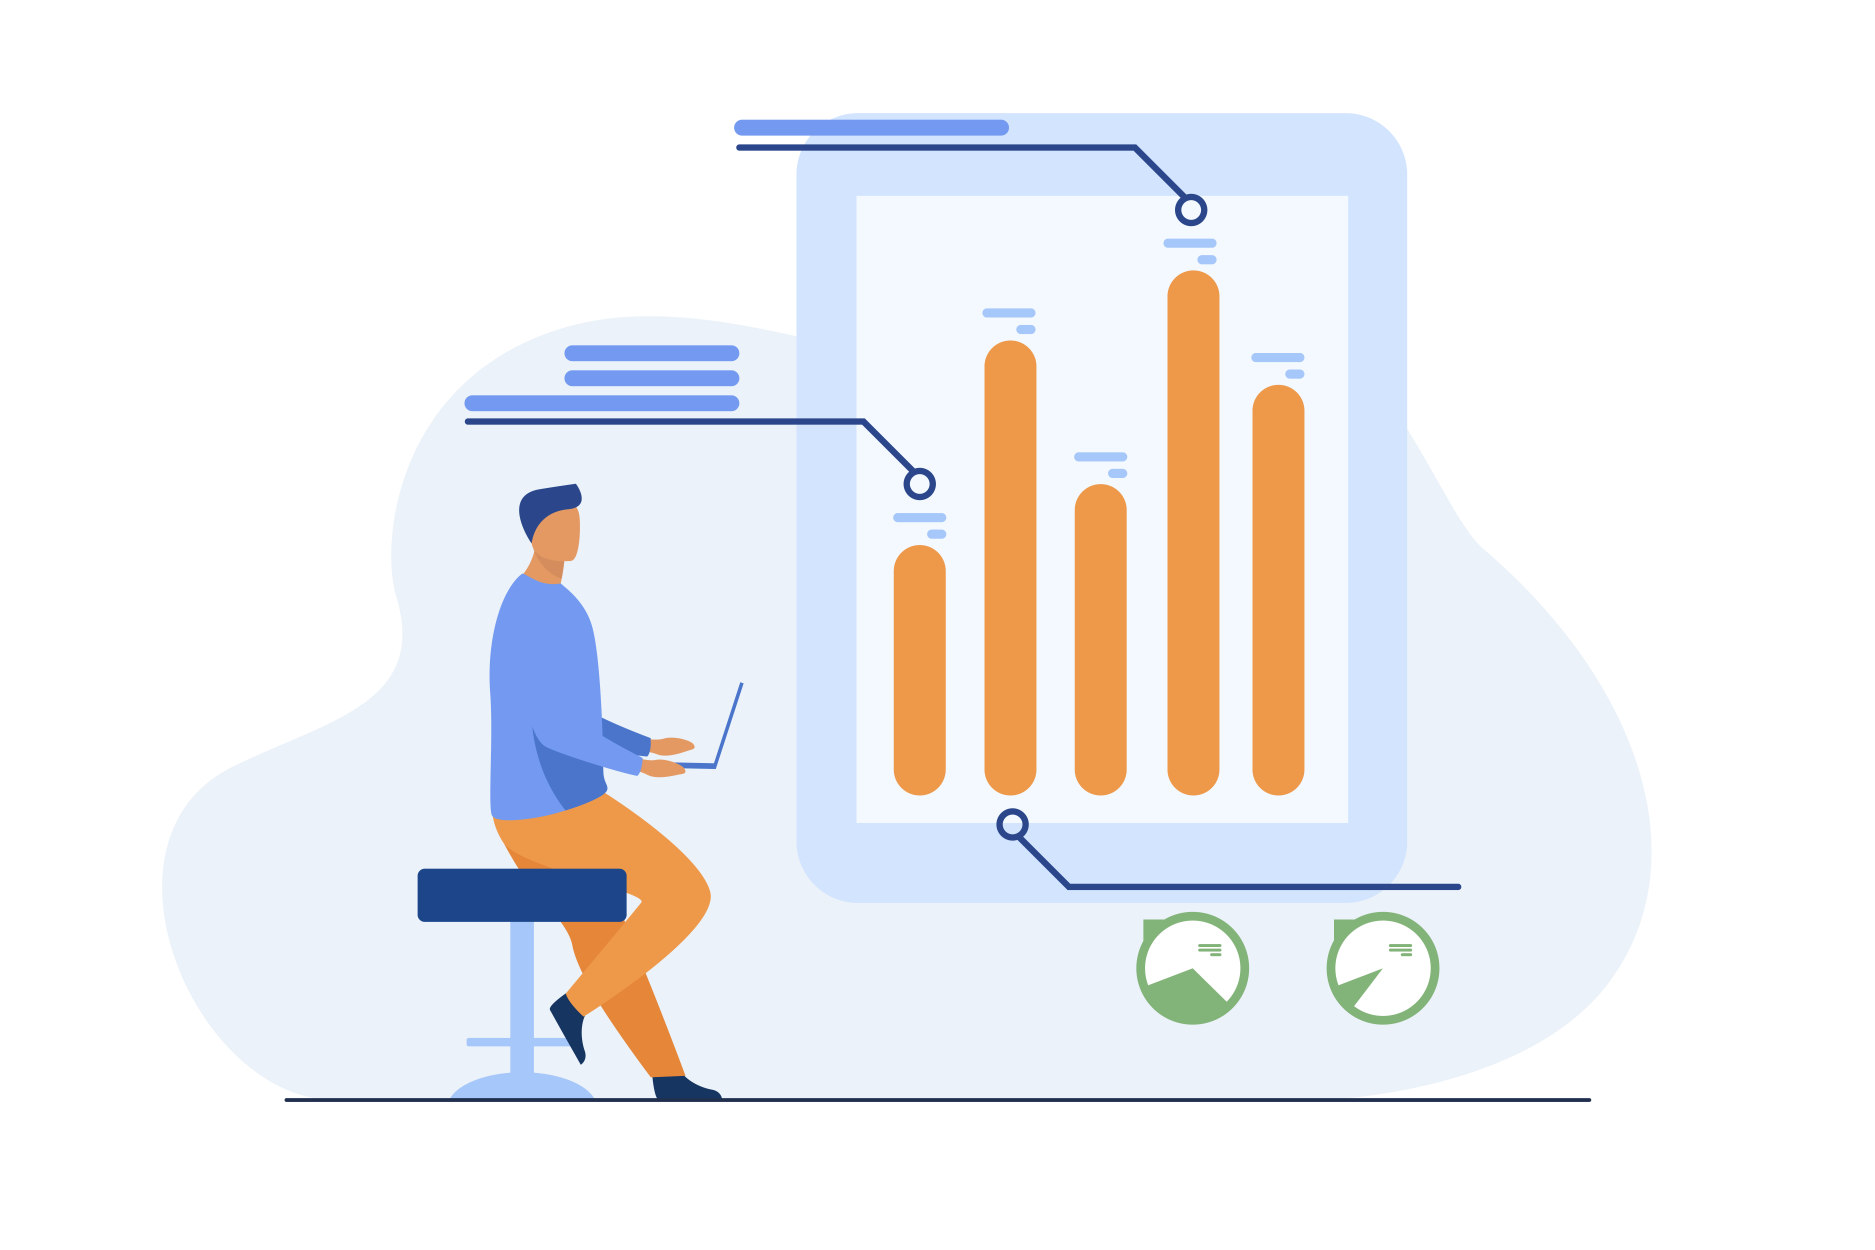

<h2>Introduction</h2>

<b>Home Credit</b> is an international consumer finance provider which operates
in 9 countries. It provides point of sales loans, cash loans and revolving
loans to underserved borrowers. The term undeserved borrower here refers
to those who earn regular income from their job or businesses, but have
little or no credit history and find it difficult to get credits from other
traditional lending organizations. They believe that the credit history should
not be a barrier for a borrower to fulfill their dreams.<br><br>
Over 22 years of track record, they have accumulated a large amount of
borrower behavioural data which they leverage to provide financial
assistance to such customers. They have built predictive models that help
them to efficiently analyze the risk associated with a given client and also
estimate the safe credit amount to be lent to customers, even with no credit
history.
<br><br>


<h2>Dataset </h2>

<h3>Data Overview</h3>

<b>Home Credit Group</b> has generously provided a vast dataset to motivate machine learning engineers and researchers to come up with techniques to build a predictive model for default risk prediction. Generally, the data in the field of Finances tend to be very much variant and collecting such data can be very tedious task, but in this case, Home Credit has done most of the heavy lifting to provide us as clean of a data as possible. <br><br>
The dataset provided contains a vast number of details about the borrower.
It is separated into several relational tables, which contain applicants’ static
data such as their gender, age, number of family members, occupation, and
other necessary fields, applicant’s previous credit history obtained from the
credit bureau department, and the applicant’s past credit history within the
Home Credit Group itself. The dataset is an imbalanced dataset, where the negative class dominates
the positive class, as there are only a few number of defaulters among all
the applicants.<br><br>
The Dataset can be downloaded from the Kaggle link: <a href = https://www.kaggle.com/c/home-credit-default-risk/data>Home Credit Default Risk Dataset</a><br><br>

<h3>Data Specifications</h3>
<pre>
There are 10 .csv files in total. They are:

HomeCredit_columns_description.csv - 36.51 KB
POS_CASH_balance.csv -               374.51 MB
application_test.csv -               25.34 MB
application_train.csv -              158.44 MB
bureau.csv -                         162.14 MB
bureau_balance.csv -                 358.19 MB
credit_card_balance.csv -            404.91 MB
installments_payments.csv -          689.62 MB
previous_application.csv -           386.21 MB
sample_submission.csv -              523.63 KB</pre>

<h3>Structure of Relational Tables

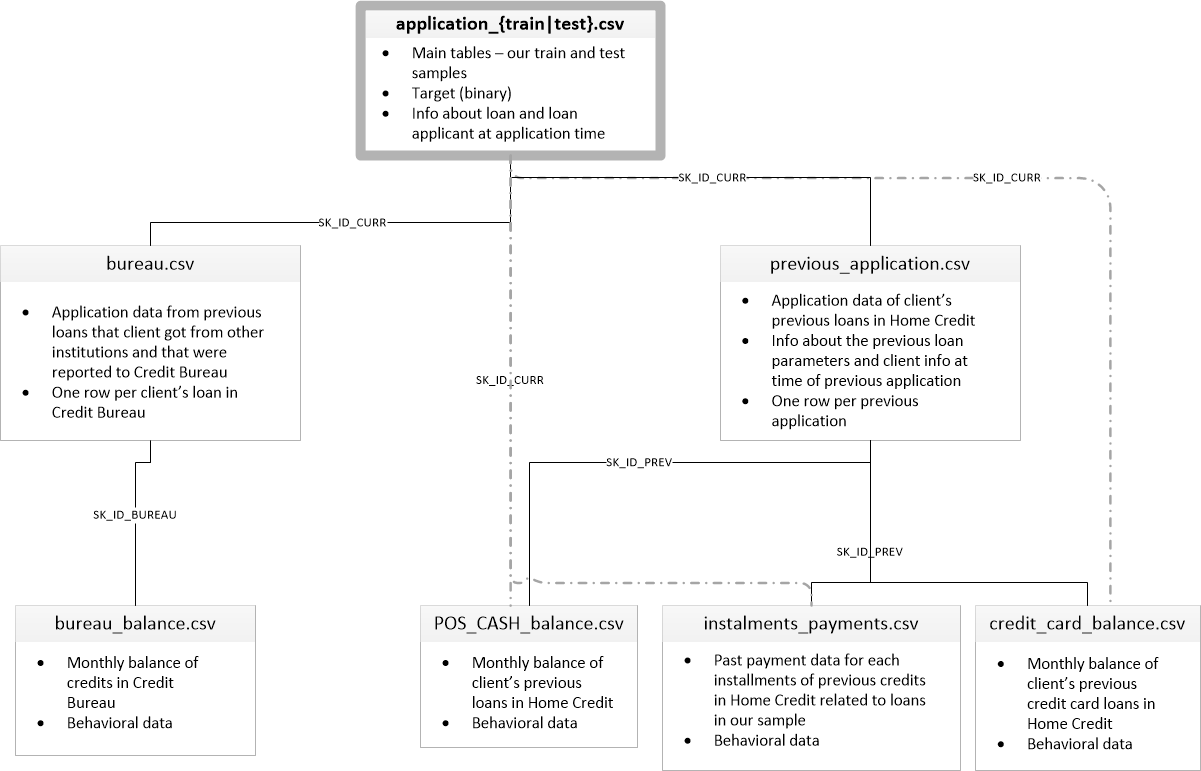
<br><br>
<h4>Brief Description of Each Table</h4>

<h5>application_{train|test}.csv</h5>

<ul><li>This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
<li>Static data for all applications. One row represents one loan in our data sample. </ul>

<h5>bureau.csv</h5>

<ul><li>All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
<li>For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
    </ul>
    
<h5>bureau_balance.csv</h5>

<ul><li>Monthly balances of previous credits in Credit Bureau.
<li>This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
    </ul>
    
<h5>POS_CASH_balance.csv</h5>

<ul><li>Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
<li>This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
    </ul>
    
<h5>credit_card_balance.csv</h5>

<ul><li>Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
    </ul>

<h5>previous_application.csv</h5>

<ul><li>All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.
    </ul>

<h5>installments_payments.csv</h5>

<ul><li>Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
    </ul>

<h5>HomeCredit_columns_description.csv</h5>

<ul><li>This file contains descriptions for the columns in the various data files.
    </ul>
Source: Home Credit Group (<a href = https://www.kaggle.com/c/home-credit-default-risk/data>Kaggle</a>)

<h2>Preliminary Steps</h2>

### Loading the libraries and modules

Let's start by loading the essential libraries and modules. We will also set the max columns and max rows display limit to None for Pandas DataFrames to be able to see the whole DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
    
import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.io.orca.config.executable = 'C:/Users/Raider/project_6env/Lib/site-packages/plotly/io/_orca.exe'
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

#for 100% jupyter notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<h3>Fonctions nécéssaires</h3>

Cette fonction charge différentes tables à partir de fichiers CSV et les assigne à des variables globales. 

In [2]:
def load_all_tables(directory_path='', verbose=True):
    '''
    Fonction pour charger toutes les tables requises
    
    Entrées :
        directory_path : str, par défaut = ''
            Chemin du répertoire dans lequel les tables sont stockées
        verbose : booléen, par défaut = True
            Indique si le mode verbeux est activé ou non
        
    '''
    
    if verbose:
        print("Chargement de toutes les tables...")
        start = datetime.now()
    
    # Déclaration des variables globales pour les utiliser dans l'ensemble du notebook
    global application_train, application_test, bureau, bureau_balance, cc_balance, installments_payments, POS_CASH_balance, previous_application
    
    application_train = pd.read_csv(directory_path + 'application_train.csv')
    if verbose:
        print("Table 1 chargée.")
       
    application_test = pd.read_csv(directory_path + 'application_test.csv')
    if verbose:
        print("Tables 1 et 2 chargées.")

    bureau = pd.read_csv(directory_path + 'bureau.csv')
    if verbose:
        print("Tables 1 à 3 chargées.")

    bureau_balance = pd.read_csv(directory_path + 'bureau_balance.csv')
    if verbose:
        print("Tables 1 à 4 chargées.")

    cc_balance = pd.read_csv(directory_path + 'credit_card_balance.csv')
    if verbose:
        print("Tables 1 à 5 chargées.")

    installments_payments = pd.read_csv(directory_path + 'installments_payments.csv')
    if verbose:
        print("Tables 1 à 6 chargées.")

    POS_CASH_balance = pd.read_csv(directory_path + 'POS_CASH_balance.csv')
    if verbose:
        print("Tables 1 à 7 chargées.")

    previous_application = pd.read_csv(directory_path + 'previous_application.csv')
    if verbose:
        print("Tables 1 à 8 chargées.")
        print("Terminé.")
        print(f"Temps nécessaire pour charger les 8 tables : {datetime.now() - start}")


Cette fonction prend un DataFrame en entrée et calcule les pourcentages de valeurs NaN pour chaque colonne. Elle retourne un nouveau DataFrame contenant les noms des colonnes et les pourcentages correspondants. Le DataFrame est trié dans l'ordre décroissant des pourcentages de NaN.

In [3]:
def nan_df_create(data):
    '''
    Fonction pour créer un DataFrame contenant les pourcentages de valeurs NaN pour chaque colonne du DataFrame
    
    Entrées :
        data : DataFrame
            DataFrame d'entrée
    
    Retour :
        DataFrame des pourcentages de NaN
    '''
    
    # Calcul des pourcentages de NaN pour chaque colonne
    nan_percentages = data.isna().sum() * 100 / len(data)
    
    # Création du DataFrame contenant les colonnes et les pourcentages de NaN
    df = pd.DataFrame({'column': nan_percentages.index, 'percent': nan_percentages.values})
    
    # Tri du DataFrame en ordre décroissant des pourcentages de NaN
    df.sort_values(by='percent', ascending=False, inplace=True)
    
    return df

In [4]:
def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 8), grid=False, rotation=90):
    '''
    Fonction pour tracer des graphiques à barres des pourcentages de NaN pour chaque colonne contenant des valeurs manquantes
    
    Entrées :
        df_nan : DataFrame
            DataFrame des pourcentages de NaN
        title_name : str
            Nom de la table à afficher dans le titre du graphique
        tight_layout : bool, default = True
            Indique si le tracé doit avoir une mise en page serrée ou non
        figsize : tuple, default = (20, 8)
            Taille de la figure du graphique
        grid : bool, default = False
            Indique si les lignes de grille doivent être tracées ou non
        rotation : int, default = 0
            Degré de rotation des étiquettes de l'axe des abscisses
        
    '''

    # Vérification s'il y a des colonnes avec des valeurs NaN ou non
    if df_nan.percent.sum() != 0:
        print(f"Nombre de colonnes contenant des valeurs NaN : {df_nan[df_nan['percent'] != 0].shape[0]} colonnes")
        
        # Tracé du graphique à barres pour les pourcentages de NaN (uniquement pour les colonnes avec un pourcentage de NaN non nul)
        plt.figure(figsize=figsize, tight_layout=tight_layout)
        sns.barplot(x='column', y='percent', data=df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation=rotation)
        plt.xlabel('Nom de la colonne')
        plt.ylabel('Pourcentage de valeurs NaN')
        plt.title(f'Pourcentage de valeurs NaN dans {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"Le DataFrame {title_name} ne contient aucune valeur NaN.")

In [5]:
class correlation_matrix:
    '''
    Classe pour tracer une heatmap de la matrice de corrélation et afficher les principales caractéristiques corrélées avec la cible.
    Contient trois méthodes :
        1. Méthode init
        2. Méthode plot_correlation_matrix
        3. Méthode target_top_corr
    '''
    
    def __init__(self, data, columns_to_drop, figsize=(25, 23), mask_upper=True, tight_layout=True,
                 linewidth=0.1, fontsize=10, cmap='Blues'):  
        '''  
        Fonction pour initialiser les membres de la classe. 
        
        Entrées :
            data : DataFrame
                Le DataFrame à partir duquel construire la matrice de corrélation
            columns_to_drop : list
                Les colonnes à supprimer lors de la construction de la matrice de corrélation (par exemple, l'ID du prêt)
            figsize : tuple, default = (25, 23)
                Taille de la figure à tracer
            mask_upper : bool, default = True
                Indique s'il faut afficher seulement le triangle inférieur de la heatmap ou l'ensemble.
            tight_layout : bool, default = True
                Indique si la mise en page doit être serrée ou non
            linewidth : float/int, default = 0.1
                L'épaisseur de ligne à utiliser pour la heatmap
            fontsize : int, default = 10
                La taille de police pour les étiquettes des axes X et Y
            cmap : str, default = 'Blues'
                La colormap à utiliser pour la heatmap

        Renvoie :
            None
        '''
        
        self.data = data
        self.columns_to_drop = columns_to_drop
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.tight_layout = tight_layout
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap 
                 
    def plot_correlation_matrix(self):
        '''
        Fonction pour tracer la heatmap de la matrice de corrélation
        
        Entrées :
            self
        
        Renvoie :
            None
        '''
        
        print('-' * 100)
        # Construction du DataFrame de corrélation
        self.corr_data = self.data.drop(self.columns_to_drop + ['TARGET'], axis=1).corr()

        if self.mask_upper:
            # Masquage de la heatmap pour afficher uniquement le triangle inférieur. Cela permet d'économiser la mémoire.
            mask_array = np.ones(self.corr_data.shape)
            mask_array = np.triu(mask_array)
        else:
            mask_array = np.zeros(self.corr_data.shape)

        plt.figure(figsize=self.figsize, tight_layout=self.tight_layout)
        sns.heatmap(self.corr_data, annot=False, mask=mask_array, linewidth=self.linewidth, cmap=self.cmap)
        plt.xticks(rotation=90, fontsize=self.fontsize)
        plt.yticks(fontsize=self.fontsize)
        plt.title("Heatmap de corrélation pour les caractéristiques numériques")
        plt.show()
        print("-" * 100)
    
    def target_top_corr(self, target_top_columns=10):
        '''
        Fonction pour renvoyer les principales caractéristiques corrélées avec la cible
        
        Entrées :
            self
            target_top_columns : int, default = 10
                Le nombre de caractéristiques les

 plus corrélées avec la cible à afficher
            
        Renvoie :
            DataFrame des principales caractéristiques corrélées.
        '''
        
        phik_target_arr = np.zeros(self.corr_data.shape[1])
        # Calcul de la corrélation Phik avec la cible
        for index, column in enumerate(self.corr_data.columns):
            phik_target_arr[index] = self.data[['TARGET', column]].phik_matrix().iloc[0, 1]
        # Obtention des colonnes les plus corrélées et de leurs valeurs
        top_corr_target_df = pd.DataFrame({'Nom de la colonne': self.corr_data.columns, 'Phik-Corrélation' : phik_target_arr})
        top_corr_target_df = top_corr_target_df.sort_values(by='Phik-Corrélation', ascending=False)
        
        return top_corr_target_df.iloc[:target_top_columns]

Cette fonction permet de tracer la matrice Phi_k pour les caractéristiques catégorielles. Elle prend en entrée un DataFrame, une liste de colonnes catégorielles, et plusieurs paramètres pour personnaliser l'apparence du tracé. La fonction calcule la matrice Phi_k et utilise la bibliothèque Seaborn pour tracer la heatmap. Elle affiche également les principales caractéristiques corrélées avec la cible si le paramètre show_target_top_corr est True.

In [6]:
def plot_phik_matrix(data, categorical_columns, figsize=(20, 20), mask_upper=True, tight_layout=True, linewidth=0.1, fontsize=10, cmap='Blues', show_target_top_corr=True, target_top_columns=10):
    '''
    Fonction pour tracer la matrice Phi_k des caractéristiques catégorielles
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel construire la matrice de corrélation
        categorical_columns : list
            Liste des colonnes catégorielles dont les valeurs PhiK doivent être tracées
        figsize : tuple, default = (20, 20)
            Taille de la figure à tracer
        mask_upper : bool, default = True
            Indique s'il faut afficher seulement le triangle inférieur de la heatmap ou l'ensemble.
        tight_layout : bool, default = True
            Indique si la mise en page doit être serrée ou non
        linewidth : float/int, default = 0.1
            L'épaisseur de ligne à utiliser pour la heatmap
        fontsize : int, default = 10
            La taille de police pour les étiquettes des axes X et Y
        cmap : str, default = 'Blues'
            La colormap à utiliser pour la heatmap
        show_target_top_corr : bool, default = True
            Indique s'il faut afficher les caractéristiques fortement corrélées avec la cible.
        target_top_columns : int, default = 10
            Le nombre de caractéristiques fortement corrélées avec la cible à afficher
            
    Renvoie :
        None
    '''
    
    # On sélectionne uniquement les caractéristiques catégorielles
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()
    
    print('-' * 100)
    
    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)
        
    plt.figure(figsize=figsize, tight_layout=tight_layout)
    sns.heatmap(phik_matrix, annot=False, mask=mask_array, linewidth=linewidth, cmap=cmap)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(rotation=0, fontsize=fontsize)
    plt.title("Heatmap de corrélation Phi-K pour les caractéristiques catégorielles")
    plt.show()
    print("-" * 100)

    if show_target_top_corr:
        # Affichage des colonnes les plus corrélées avec la variable cible dans data
        print("Catégories ayant les valeurs les plus élevées de corrélation Phi-K avec la variable cible :")
        phik_df = pd.DataFrame({'Nom de la colonne': phik_matrix.TARGET.index[1:], 'Corrélation Phi-K': phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by='Corrélation Phi-K', ascending=False)
        display(phik_df.head(target_top_columns))
        print("-" * 100)

In [8]:
def plot_categorical_variables_bar(data, column_name, figsize=(18, 6), percentage_display=True, plot_defaulter=True, rotation=0, horizontal_adjust=0, fontsize_percent='xx-small'):
    '''
    Fonction pour tracer les diagrammes à barres des variables catégorielles
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel tracer
        column_name : str
            Nom de la colonne dont la distribution doit être tracée
        figsize : tuple, default = (18, 6)
            Taille de la figure à tracer
        percentage_display : bool, default = True
            Indique s'il faut afficher les pourcentages au-dessus des barres dans le diagramme à barres
        plot_defaulter : bool
            Indique s'il faut tracer les diagrammes à barres pour les défaillants ou non
        rotation : int, default = 0
            Degré de rotation des étiquettes des axes x
        horizontal_adjust : int, default = 0
            Paramètre d'ajustement horizontal pour les pourcentages affichés au-dessus des barres du diagramme à barres
        fontsize_percent : str, default = 'xx-small'
            Taille de police pour l'affichage des pourcentages
        
    Renvoie :
        None
    '''
    
    print(f"Nombre total de catégories uniques de {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize=figsize, tight_layout=False)
    sns.set(style='whitegrid', font_scale=1.2)
    
    # Tracer la distribution globale de la catégorie
    plt.subplot(1, 2, 1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette='Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize=fontsize_percent)
        
    plt.xlabel(column_name, labelpad=10)
    plt.title(f'Distribution de {column_name}', pad=20)
    plt.xticks(rotation=rotation)
    plt.ylabel('Comptes')
    
    # Tracer la distribution de la catégorie pour les défaillants
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending=False)

        plt.subplot(1, 2, 2)
        sns.barplot(x=percentage_defaulter_per_category.index, y=percentage_defaulter_per_category, palette='Set2')
        plt.ylabel('Pourcentage de défaillants par catégorie')
        plt.xlabel(column_name, labelpad=10)
        plt.xticks(rotation=rotation)
        plt.title(f'Pourcentage de défaillants pour chaque catégorie de {column_name}', pad=20)
    
    plt.show()

In [26]:
def plot_categorical_variables_pie(data, column_name, plot_defaulter=True, hole=0):
    
    '''
    Fonction pour tracer des diagrammes circulaires de variables catégorielles
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel tracer
        column_name : str
            Nom de la colonne dont la distribution doit être tracée
        plot_defaulter : booléen
            Indique s'il faut tracer le diagramme circulaire pour les mauvais payeurs ou non
        hole : int, valeur par défaut = 0
            Rayon du trou à découper dans le diagramme circulaire
    '''
    
    if plot_defaulter:
        cols = 2
        specs = [[{'type' : 'domain'}, {'type' : 'domain'}]]
        titles = [f'Distribution de {column_name} pour toutes les cibles', f'Pourcentage de mauvais payeurs pour chaque catégorie de {column_name}']
    else:
        cols = 1
        specs = [[{'type': 'domain'}]]
        titles = [f'Distribution de {column_name} pour toutes les cibles']
        
    values_categorical = data[column_name].value_counts()
    labels_categorical = values_categorical.index
    
    fig = make_subplots(rows=1, cols=cols, 
                       specs=specs, 
                       subplot_titles=titles)
    
    fig.add_trace(go.Pie(values=values_categorical, labels=labels_categorical, hole=hole, 
                         textinfo='label+percent', textposition='inside'), row=1, col=1)
    
    if plot_defaulter:
        percentage_defaulter_per_category = data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()
        percentage_defaulter_per_category.dropna(inplace=True)
        percentage_defaulter_per_category = percentage_defaulter_per_category.round(2)
        
        fig.add_trace(go.Pie(values=percentage_defaulter_per_category, labels=percentage_defaulter_per_category.index, 
                             hole=hole, textinfo='label+value', hoverinfo='label+value'), row=1, col=2)
        
    fig.update_layout(title=f'Distribution de {column_name}')
    fig.show()


In [9]:
def print_unique_categories(data, column_name, show_counts=False):
    '''
    Fonction pour afficher les statistiques de base telles que les catégories uniques et leurs comptes pour les variables catégorielles
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel afficher les statistiques
        column_name : str
            Nom de la colonne dont les statistiques doivent être affichées
        show_counts : bool, default = False
            Indique s'il faut afficher les décomptes de chaque catégorie ou non
    
    Renvoie :
        None
    '''
    
    print('-' * 100)
    print(f"Les catégories uniques de '{column_name}' sont :\n{data[column_name].unique()}")
    print('-' * 100)
    
    if show_counts:
        print(f"Les comptes de chaque catégorie sont :\n{data[column_name].value_counts()}")
        print('-' * 100)

In [10]:
def plot_cdf(data, column_name, log_scale=False, figsize=(12, 8)):
    '''
    Fonction pour tracer la fonction de répartition cumulative (CDF) d'une variable continue
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel tracer la CDF
        column_name : str
            Nom de la colonne dont la CDF doit être tracée
        log_scale : bool, default = False
            Indique s'il faut utiliser une échelle logarithmique (pour des valeurs très variables) ou non
        figsize : tuple, default = (12, 8)
            La taille de la figure à tracer
    
    Renvoie :
        None
    '''

    percentile_values = data[[column_name]].dropna().sort_values(by=column_name)
    percentile_values['Percentile'] = [ele / (len(percentile_values) - 1) for ele in range(len(percentile_values))]

    plt.figure(figsize=figsize)
    if log_scale:
        plt.xscale('log')
        plt.xlabel(column_name + ' - (échelle logarithmique)')
    else:
        plt.xlabel(column_name)
    plt.plot(percentile_values[column_name], percentile_values['Percentile'], color='red')
    plt.ylabel('Probabilité')
    plt.title('CDF de {}'.format(column_name))
    plt.show()

In [11]:
def print_percentiles(data, column_name, percentiles=None):
    '''
    Fonction pour afficher les valeurs percentiles d'une colonne donnée
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel afficher les percentiles
        column_name : str
            Nom de la colonne dont les percentiles doivent être affichés
        percentiles : list, default = None
            La liste des percentiles à afficher. Si aucun n'est donné, les percentiles par défaut sont affichés
    
    Renvoie :
        None
    '''
    
    print('-'*100)
    if not percentiles:
        percentiles = list(range(0, 80, 25)) + list(range(90, 101, 2))
    for i in percentiles:
        print(f"La valeur du {i}e percentile de {column_name} est {np.percentile(data[column_name].dropna(), i)}")
    print("-"*100)

In [12]:
def plot_continuous_variables(data, column_name, plots=['distplot', 'CDF', 'box', 'violin'], scale_limits=None, figsize=(20,8), histogram=True, log_scale=False):
    '''
    Fonction pour tracer la distribution des variables continues
    
    Entrées :
        data : DataFrame
            Le DataFrame à partir duquel tracer les graphiques.
        column_name : str
            Nom de la colonne dont la distribution doit être tracée.
        plots : list, default = ['distplot', 'CDF', 'box', 'violin']
            Liste des graphiques à tracer pour la variable continue.
        scale_limits : tuple (left, right), default = None
            Pour contrôler les limites des valeurs à tracer en cas de valeurs aberrantes.
        figsize : tuple, default = (20,8)
            Taille de la figure à tracer.
        histogram : bool, default = True
            Indique s'il faut tracer l'histogramme avec le distplot ou non.
        log_scale : bool, default = False
            Indique s'il faut utiliser une échelle logarithmique pour les variables avec des points aberrants.
    
    Renvoie :
        None
    '''

    data_to_plot = data.copy()
    if scale_limits:
        # ne prendre que les données dans les limites spécifiées
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        
        if ele == 'CDF':
            # création du DataFrame des percentiles pour les étiquettes de classe positive et négative
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by=column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0) - 1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by=column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1) - 1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color='red', label='Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color='black', label='Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probabilité')
            plt.title('CDF de {}'.format(column_name))
            plt.legend(fontsize='medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (échelle logarithmique)')
            
        if ele == 'distplot':
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist=histogram, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist=histogram, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Densité de probabilité')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot de {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (échelle logarithmique)')

        if ele == 'violin':
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot de {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (échelle logarithmique)')

        if ele == 'box':
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot de {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (échelle logarithmique)')

    plt.show()

<h2>Analyse exploratoire des données (EDA)</h2>

Pour l'analyse des données, nous suivrons les étapes suivantes :

<ol><li>Pour chaque table, nous commencerons par vérifier les statistiques de base telles que le nombre d'enregistrements dans les tables, le nombre de variables, le nombre de valeurs NaN, etc.
    <li>Ensuite, nous explorerons certaines des variables en fonction de la variable cible pour chaque table.
        Nous utiliserons les graphiques suivants :
        <ul><li>Pour les variables catégorielles, nous utiliserons principalement des <b>graphiques à barres</b> et des <b>camemberts</b>.
            <li>Pour les variables continues/numériques, nous utiliserons des <b>box-plots</b>, des <b>PDF</b> (fonctions de densité de probabilité), des <b>CDF</b> (fonctions de distribution cumulée) et des <b>violins-plots</b>.
        </ul>
    <li>Nous ferons des observations à partir de chaque graphique et noterons les insights importants générés par ces graphiques.
        </ol>

<h5>Note 1 :</h5>
<ul>
    <li>Pour les variables catégorielles, nous utiliserons des graphiques à barres et des graphiques en camembert. L'utilisation d'un graphique à barres ou d'un graphique en camembert dépendra du nombre de catégories uniques présentes dans une variable. Si une variable comporte trop de catégories, les afficher dans un graphique en camembert peut être fastidieux, et un graphique à barres permettra de mieux représenter chaque catégorie. De plus, un graphique à barres sera préféré lorsque les proportions de toutes les catégories sont plus ou moins les mêmes afin de pouvoir identifier de petites différences.</li>
    <li>Nous suivrons la stratégie suivante pour tracer les graphiques des variables catégorielles dans l'ensemble du notebook :
        <ul>
            <li>Tout d'abord, nous tracerons la distribution de chaque catégorie dans l'ensemble des données, dans le premier sous-graphique.</li>
            <li>Ensuite, dans le deuxième sous-graphique, nous tracerons le pourcentage de défaillants pour chaque catégorie, c'est-à-dire avec Target = 1.</li>
            <li>Par exemple, supposons qu'une variable représente le genre, avec les valeurs Masculin et Féminin. Dans le premier sous-graphique, nous tracerons le nombre d'occurrences de chaque valeur (Masculin et Féminin) dans notre jeu de données. <br>Dans le deuxième sous-graphique, nous tracerons le pourcentage de défaillants parmi les occurrences de la valeur Masculin présente dans le jeu de données. Nous ferons de même pour la valeur Féminin. <br>
                Cela est fait car il y aura quelques catégories qui domineront les autres, et leurs caractéristiques de défaillance ne seront pas identifiables si nous nous contentons de regarder les comptages.</li>
        </ul>
    </li>
</ul>

<h5>Note 2 :</h5>

Pour l'analyse des variables continues, nous utiliserons quatre types de graphiques selon les besoins, à savoir les distplots, les CDF, les box-plots et les violin-plots.

<ul>
    <li><b>Distplots :</b><br> Les distplots seront utilisés lorsque nous voulons visualiser les fonctions de densité de probabilité (PDF) des variables continues. Cette PDF nous aidera à analyser où se situe la majeure partie de nos données.</li>
    <li><b>CDF :</b><br> Les fonctions de répartition cumulée (CDF) peuvent être utilisées en complément des PDF pour voir le pourcentage de points situés en dessous d'une certaine valeur seuil. Cela nous donnera une bonne estimation de la répartition de la majorité des données.</li>
    <li><b>Box-plots :</b><br> Les box-plots sont utiles lorsque nous voulons analyser l'ensemble de la plage de valeurs de notre variable continue. Ils affichent les 25e, 50e et 75e percentiles dans un seul graphique. De plus, ils donnent également des indications sur la présence de valeurs aberrantes dans un ensemble donné de valeurs.</li>
    <li><b>Violin-plots :</b><br> Les violin-plots combinent les caractéristiques des distplots et des box-plots. Verticalement, ils imitent le box-plot et montrent les quantiles, la plage de valeurs, et horizontalement, ils montrent la PDF de la variable continue.</li>
</ul>

### Chargement des données

In [13]:
# List files available
import os
print(os.listdir("C:/Users/Raider/OneDrive/Bureau/openclassrooms/projet7/Data"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [14]:
load_all_tables(directory_path="C:/Users/Raider/OneDrive/Bureau/openclassrooms/projet7/Data/")

Chargement de toutes les tables...
Table 1 chargée.
Tables 1 et 2 chargées.
Tables 1 à 3 chargées.
Tables 1 à 4 chargées.
Tables 1 à 5 chargées.
Tables 1 à 6 chargées.
Tables 1 à 7 chargées.
Tables 1 à 8 chargées.
Terminé.
Temps nécessaire pour charger les 8 tables : 0:00:29.799185


### application_train.csv and application_test.csv

##### Description:

- La table "application_train.csv" contient des données statiques relatives aux emprunteurs avec des étiquettes. Chaque ligne représente une demande de prêt.<br>
- La table "application_test.csv" contient l'ensemble de données de test et est similaire à "application_train.csv", à l'exception de la colonne "TARGET" qui a été omise. Cette colonne doit être prédite à l'aide de modèles prédictifs statistiques et d'apprentissage automatique.

#### Stats

In [15]:
# Affichage de la ligne de séparation
print('-'*100)

# Affichage de la forme de application_train.csv
print(f"La forme de application_train.csv est : {application_train.shape}")

# Affichage de la ligne de séparation
print('-'*100)

# Calcul du nombre de valeurs en double dans application_train
num_duplicates = application_train.shape[0] - application_train.duplicated().shape[0]
print(f"Nombre de valeurs en double dans application_train : {num_duplicates}")

# Affichage de la ligne de séparation
print('-'*100)

# Affichage des premières lignes de application_train
display(application_train.head())

----------------------------------------------------------------------------------------------------
La forme de application_train.csv est : (307511, 122)
----------------------------------------------------------------------------------------------------
Nombre de valeurs en double dans application_train : 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print('-'*100)
print(f'La forme de  application_test.csv est: {application_test.shape}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)
display(application_test.head())

----------------------------------------------------------------------------------------------------
La forme de  application_test.csv est: (48744, 121)
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans application_test: 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


##### Observations et Conclusions:

<ol>
    <li><b>application_train.csv :</b>
        <ul>
            <li>Le fichier application_train.csv contient environ 307 000 enregistrements et 122 caractéristiques. Ces caractéristiques contiennent les statistiques personnelles relatives à un client particulier, telles que son âge, son revenu, le type de prêt, les statistiques de l'appartement, etc.</li>
            <li>Il y a 307 000 valeurs uniques de SK_ID_CURR qui représentent des demandes de prêt uniques.</li>
            <li>Le champ TARGET représente l'état de défaut de prêt, où 0 signifie non-défaillance et 1 signifie défaillance.</li>
        </ul>
    </li><br>
    <li><b>application_test.csv :</b>
        <ul>
            <li>Le fichier application_test.csv contient environ 48 700 enregistrements et 121 caractéristiques. Ces caractéristiques sont exactement les mêmes que celles de application_train.csv, à l'exception du fait qu'il s'agit des ensembles de test.</li>
            <li>Il y a 48 700 valeurs uniques de SK_ID_CURR qui représentent des demandes de prêt uniques.</li>
            <li>La colonne TARGET a été omise et doit être prédite à l'aide de modèles statistiques et d'apprentissage automatique prédictifs.</li>
        </ul>
    </li>
</ol>

#### Valeurs manquantes

Nombre de colonnes contenant des valeurs NaN : 67 colonnes


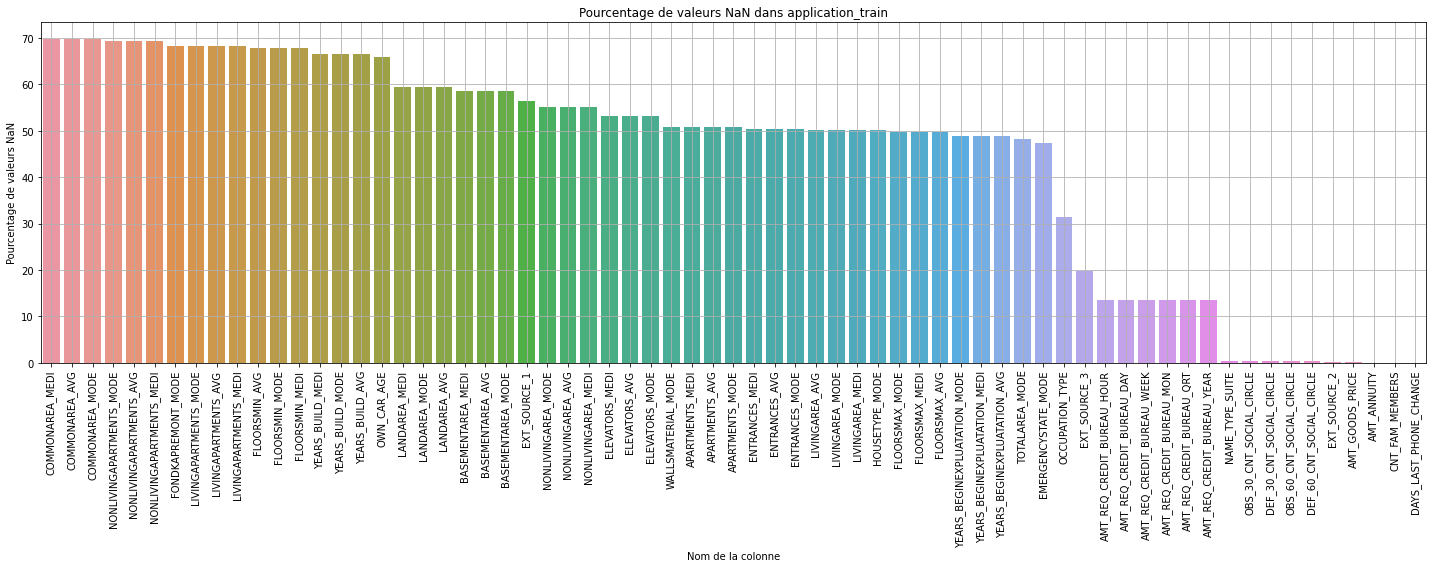

In [17]:
plot_nan_percent(nan_df_create(application_train), 'application_train', grid = True)

Nombre de colonnes contenant des valeurs NaN : 64 colonnes


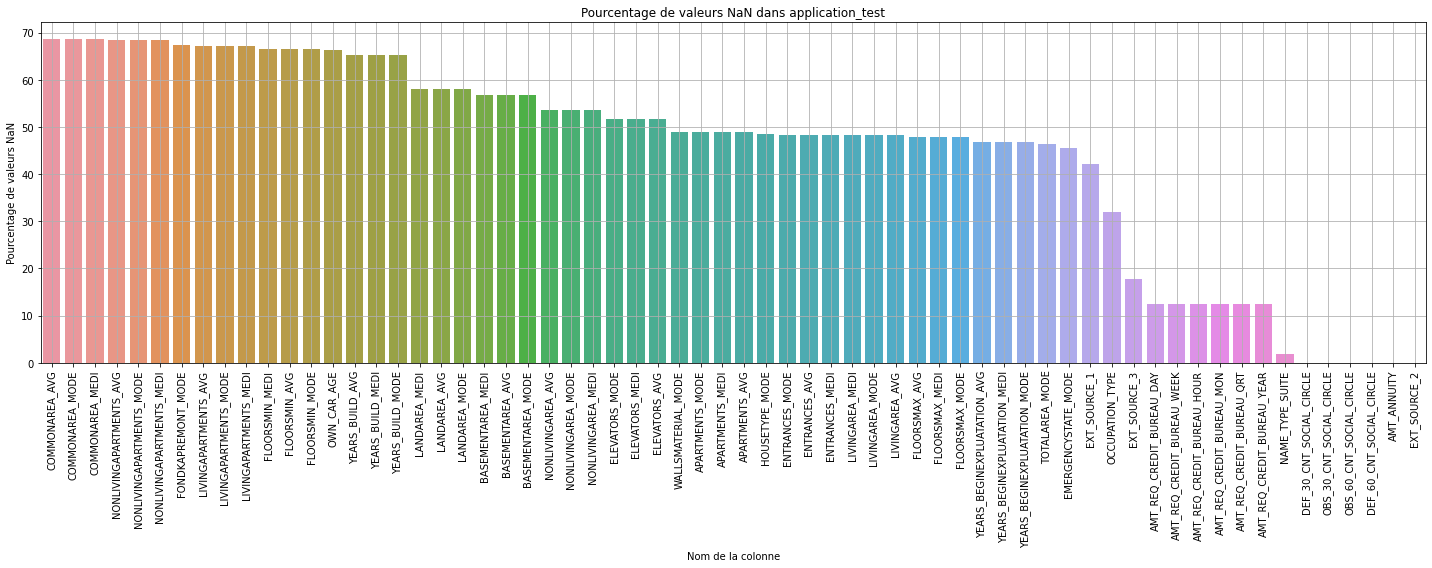

In [18]:
plot_nan_percent(nan_df_create(application_test), 'application_test', grid = True)

##### Observations et Conclusions:

<ol>
    <li><b>application_train.csv :</b>
        <ul>
            <li>D'après le graphique ci-dessus, on peut constater que 67 colonnes sur 122 contiennent des valeurs NaN. S'il y avait seulement une ou deux colonnes avec des valeurs NaN, nous aurions pu simplement les éliminer. Cependant, avec un si grand nombre de colonnes, nous ne pouvons pas les supprimer telles quelles, car cela entraînerait une perte d'informations très importante.</li>
            <li>Nous remarquons que certaines colonnes comme celles relatives à "COMMONAREA", "NONLIVINGAPARTMENT", etc. ont près de 70% de valeurs manquantes. Nous devrons trouver des techniques pour gérer ces nombreuses valeurs manquantes et déterminer ce qui fonctionnerait le mieux pour nos données.</li>
            <li>Autre point à noter ici, la plupart des colonnes ayant plus de 50% de valeurs manquantes sont liées aux statistiques des appartements des emprunteurs. Il est très probable que ces valeurs n'aient pas été enregistrées lors de la saisie des données et qu'elles soient facultatives.</li>
        </ul>
    </li><br>
    <li><b>application_test.csv :</b>
        <ul>
            <li>Il y a un nombre similaire de colonnes avec des valeurs NaN (64) par rapport à application_train.</li>
            <li>Les pourcentages de valeurs NaN sont également assez similaires à ceux présents dans l'ensemble d'entraînement. Cela signifie que les ensembles d'entraînement et de test sont à peu près de la même distribution.</li>
        </ul>
    </li>
</ol>

#### Distribution de la variable Target

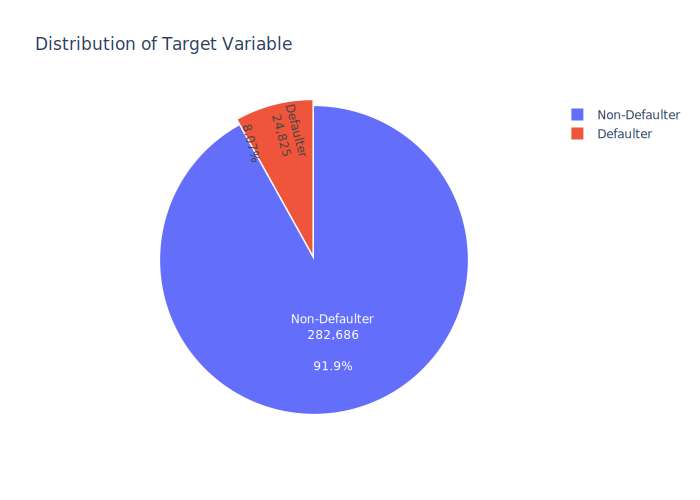

In [19]:
target_distribution = application_train.TARGET.value_counts()
labels = ['Non-Defaulter', 'Defaulter']

fig = go.Figure(data = [
        go.Pie(values = target_distribution, labels = labels, textinfo = 'label+percent+value' , pull = [0,0.04])], 
         layout = go.Layout(title = 'Distribution of Target Variable'))

fig.show(renderer = 'svg')

##### Observations et Conclusions:

<ul>
    <li>À partir de la distribution de la variable cible, une chose que l'on peut rapidement remarquer est le déséquilibre des données. Seulement 8,07% des prêts au total ont réellement été en défaut. Cela signifie que les défauts constituent la classe minoritaire.
    <li>D'autre part, il y a 91,9% des prêts qui n'ont pas été en défaut. Ainsi, les non-défauts constituent notre classe majoritaire.
    <li>Les défauts ont été attribués à une variable cible de 1 et les non-défauts ont été attribués à une variable cible de 0.
    <li>Pour un ensemble de données déséquilibré, lors de la construction du modèle, nous ne pouvons pas fournir les données telles quelles à certains algorithmes sensibles aux déséquilibres.
    <li>Il en va de même pour les mesures de performance. Pour un tel ensemble de données, la précision n'est généralement pas la bonne mesure, car la précision serait généralement biaisée en faveur de la classe majoritaire. Nous pouvons utiliser d'autres mesures telles que le score ROC-AUC, la perte logarithmique, le score F1, la matrice de confusion pour une meilleure évaluation du modèle.
    <li>Une autre chose importante à noter ici est qu'il y a très peu de personnes qui font réellement défaut, et elles ont tendance à montrer un comportement différent. Ainsi, dans les cas de détection de fraude, de défaut et d'anomalie, nous devons également nous concentrer sur les valeurs aberrantes, et nous ne pouvons pas les supprimer car elles pourraient être le facteur différenciant entre les défauts et les non-défauts.</li>
</ul>

#### Phi-K matrix

Nous allons tracer une carte thermique des valeurs du coefficient de corrélation Phi-K entre chaque caractéristique et les autres. <br>
Le coefficient Phi-K est similaire au coefficient de corrélation, à la différence qu'il peut être utilisé avec une paire de caractéristiques catégorielles pour vérifier si une caractéristique montre une certaine association avec l'autre caractéristique catégorielle. Sa valeur maximale peut être de 1, ce qui indiquerait une association maximale entre deux variables catégorielles.

----------------------------------------------------------------------------------------------------


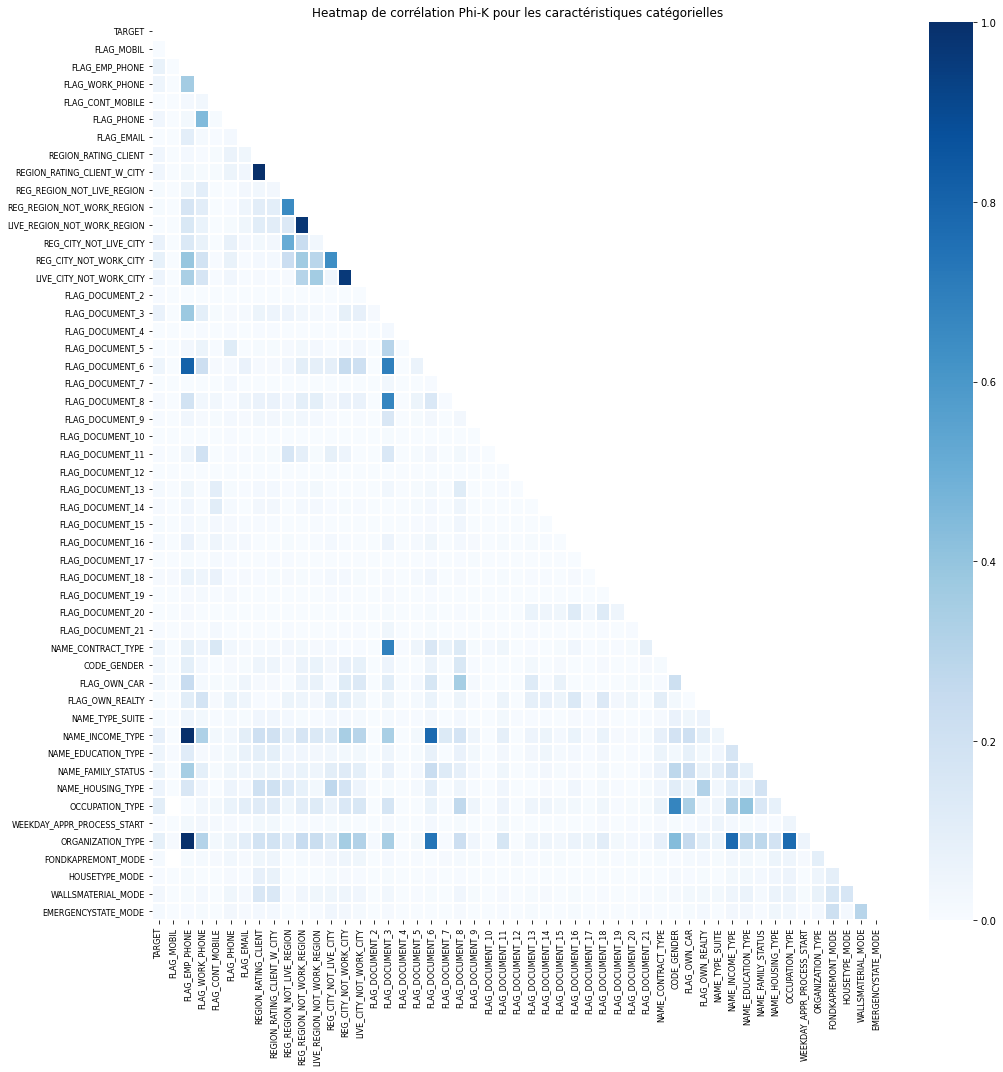

----------------------------------------------------------------------------------------------------
Catégories ayant les valeurs les plus élevées de corrélation Phi-K avec la variable cible :


,Nom de la colonne,Corrélation Phi-K
43,OCCUPATION_TYPE,0.102846
45,ORGANIZATION_TYPE,0.089164
39,NAME_INCOME_TYPE,0.084831
12,REG_CITY_NOT_WORK_CITY,0.079946
1,FLAG_EMP_PHONE,0.072087
11,REG_CITY_NOT_LIVE_CITY,0.069588
15,FLAG_DOCUMENT_3,0.069525
41,NAME_FAMILY_STATUS,0.056043
42,NAME_HOUSING_TYPE,0.051107
13,LIVE_CITY_NOT_WORK_CITY,0.050956


----------------------------------------------------------------------------------------------------


In [20]:
categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                                'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + application_train.dtypes[
                                    application_train.dtypes == 'object'].index.tolist()
plot_phik_matrix(application_train, categorical_columns, figsize = (15,15), fontsize = 8)

##### Observations et Conclusions:

<ol><li>À partir de la carte thermique du coefficient de corrélation Phi-K, nous constatons que la plupart des caractéristiques catégorielles ne sont pas corrélées entre elles, cependant certaines d'entre elles présentent une forte corrélation.</li>
    <li>Voici quelques paires de catégories fortement corrélées :
        <ul><li>REGION_RATING_CLIENT_W_CITY et REGION_RATING_CLIENT - Cela est compréhensible car elles racontent plus ou moins la même histoire.</li>
            <li>LIVE_REGION_NOT_WORK_REGION et REG_REGION_NOT_WORK_REGION</li>
            <li>NAME_INCOME_TYPE, ORGANIZATION_TYPE et FLAG_EMP_PHONE</li>
        </ul>
    </li>
    <li>Nous pouvons également observer une corrélation entre le type d'organisation et le type de revenu d'un client. De même, nous constatons une corrélation entre le type de profession et le type d'organisation.</li>
    <li>Nous constatons que les catégories OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY sont parmi les catégories les plus corrélées avec la variable TARGET. Elles peuvent être importantes dans la tâche de classification et nécessiteraient une analyse exploratoire plus approfondie.</li></ol>

#### Matrice de corrélation des features

Nous allons tracer une carte thermique de la corrélation de chaque caractéristique numérique par rapport aux autres caractéristiques. Nous avons exclu la colonne SK_ID_CURR, car elle n'a aucune pertinence. Cette carte thermique nous aidera à identifier les caractéristiques numériques fortement corrélées et nous permettra également de repérer les caractéristiques fortement corrélées à la variable cible.

----------------------------------------------------------------------------------------------------


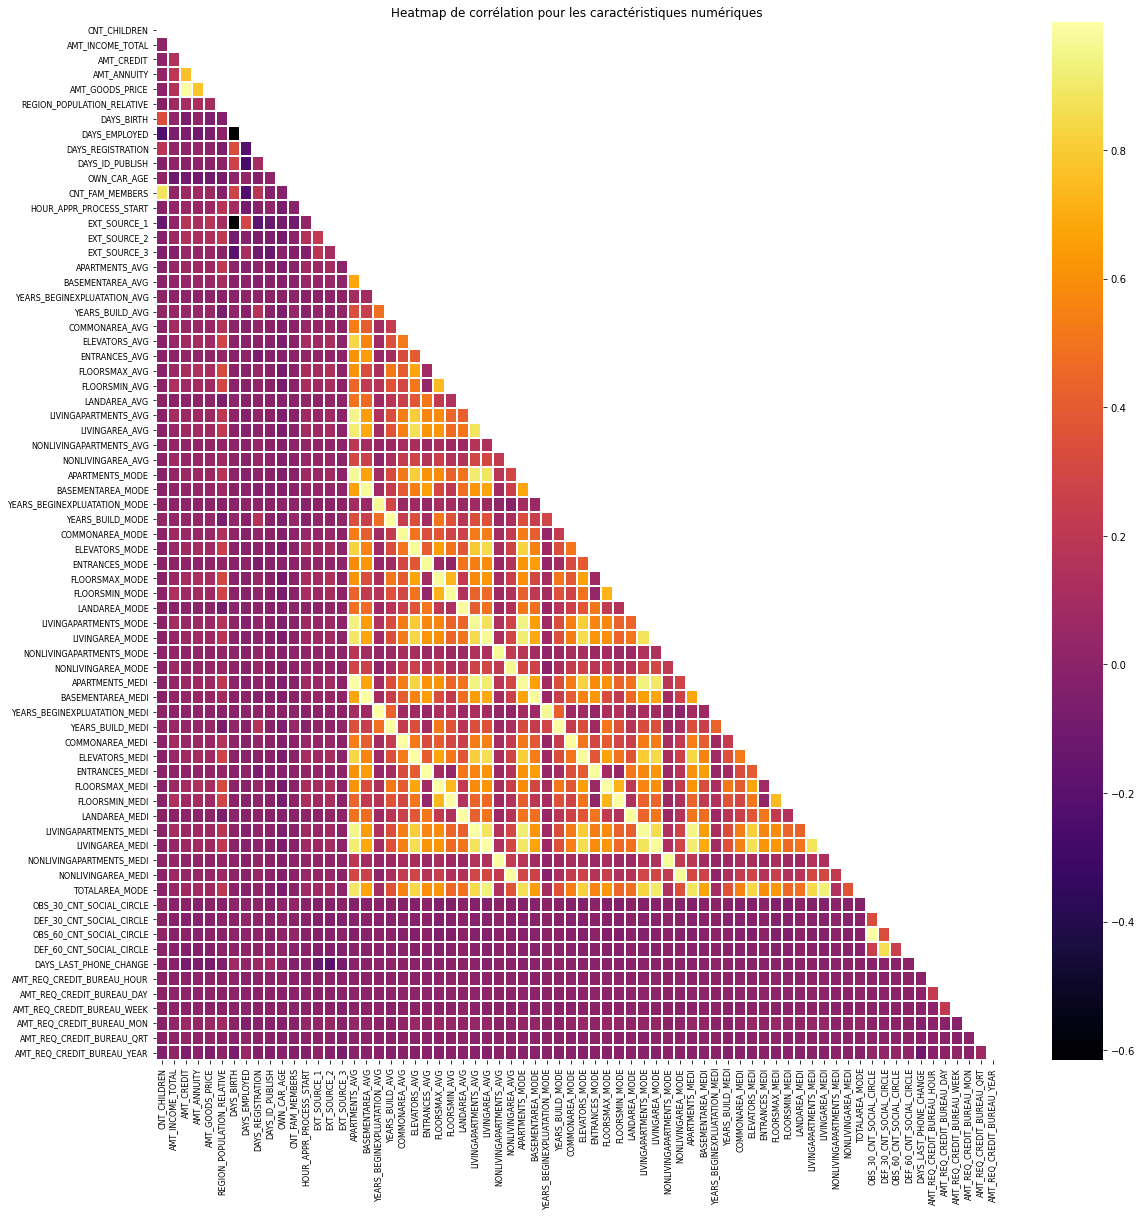

----------------------------------------------------------------------------------------------------


In [21]:
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns) - set(['TARGET']))
corr_mat = correlation_matrix(application_train, columns_to_drop, figsize = (17,17), fontsize = 8, cmap = 'inferno')
corr_mat.plot_correlation_matrix()

In [22]:
#Affichage des colonnes les plus corrélées à la variable cible dans la table application_train
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Les colonnes ayant les valeurs les plus élevées de corrélation de Phik avec la variable cible sont:")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_INCOME_TOTAL']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'REGION_POPULATION_RELATIVE']
interval columns not set, guessing: ['TARGET', 'DAYS_BIRTH']
interval columns not set, guessing: ['TARGET', 'DAYS_EMPLOYED']
interval columns not set, guessing: ['TARGET', 'DAYS_REGISTRATION']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'OWN_CAR_AGE']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_1']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_2']
interval columns 

,Nom de la colonne,Phik-Corrélation
15,EXT_SOURCE_3,0.247680
13,EXT_SOURCE_1,0.217846
14,EXT_SOURCE_2,0.213965
6,DAYS_BIRTH,0.102378
63,DAYS_LAST_PHONE_CHANGE,0.073218
7,DAYS_EMPLOYED,0.072095
9,DAYS_ID_PUBLISH,0.067766
4,AMT_GOODS_PRICE,0.059094
23,FLOORSMAX_AVG,0.058826
51,FLOORSMAX_MEDI,0.058595


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
    <li>Le heatmap fait un bon travail en montrant la valeur ou le niveau de corrélation de chaque feature avec toutes les autres features.</li>
    <li>On peut observer que la plupart du heatmap présente une couleur violette, ce qui indique une très faible corrélation. Cela signifie que la plupart des features ne sont en effet pas corrélées aux autres.</li>
    <li>Cependant, on peut voir des nuances contrastées au milieu du heatmap. Ces nuances représentent une forte corrélation entre les features. Il s'agit des features liées aux statistiques des appartements.<br>
        Si l'on examine les features de application_train, on peut clairement voir que les statistiques des appartements sont données en termes de moyenne, médiane et mode, il est donc attendu que la moyenne, la médiane et le mode soient corrélés entre eux. Une autre chose à noter est que les features d'une catégorie particulière, par exemple la moyenne, sont également corrélées avec d'autres features de la même catégorie, comme le nombre d'ascenseurs, la surface habitable, la surface non habitable, la surface du sous-sol, etc.</li>
    <li>On observe également une forte corrélation entre AMT_GOODS_PRICE et AMT_CREDIT, entre DAYS_EMPLOYED et DAYS_BIRTH.</li>
    <li>Nous ne voulons pas de features fortement corrélées car elles augmentent la complexité temporelle du modèle sans ajouter beaucoup de valeur. Nous allons donc supprimer les features intercorrélées.</li>
    <li>Parmi toutes les features, nous observons une corrélation élevée pour les features EXT_SOURCE par rapport à la variable cible. Elles pourraient être importantes pour notre tâche de classification.</li>
</ol>

#### Graphique de variables catégorielles

<b><u>Distribution de la Variable NAME_CONTRACT_TYPE</u></b>

Cette colonne contient des informations sur le type de prêt pour le demandeur donné. Selon la documentation fournie par Home Credit, il existe deux types de prêts, à savoir les prêts renouvelables (Revolving Loans) et les prêts en espèces (Cash Loans).

In [27]:
# examinons d'abord les catégories uniques de 'NAME_CONTRACT_TYPE'
print_unique_categories(application_train, 'NAME_CONTRACT_TYPE')

# tracé du diagramme circulaire (Pie Plot) pour la colonne
plot_categorical_variables_pie(application_train, 'NAME_CONTRACT_TYPE', hole = 0.5)
print('-'*100)

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'NAME_CONTRACT_TYPE' sont :
['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

À partir du graphique ci-dessus, nous pouvons tirer les observations et conclusions suivantes :
<ol><li>D'après le premier sous-graphique, c'est-à-dire la distribution globale :
        <ul><li>On peut constater que la plupart des prêts que les clients contractent sont des prêts en espèces (Cash Loans).</li>
            <li>Seulement 9,52% des personnes ont souscrit des prêts renouvelables (Revolving Loans).</li></ul></li>
<li>D'après le deuxième sous-graphique, c'est-à-dire le pourcentage de mauvais payeurs :
        <ul><li>Nous constatons qu'il y a un pourcentage plus élevé de personnes ayant fait défaut avec des prêts en espèces (8,35%) par rapport à ceux qui ont fait défaut avec des prêts renouvelables (5,48%).</li></ul></li></ol>

<b><u>Distribution de la Variable CODE_GENDER</u></b>

Cette colonne contient des informations sur le genre du client/demandeur.
Ici, <b>M</b> représente <b>Homme</b> et <b>F</b> représente <b>Femme</b>.

In [28]:
# examinons d'abord les catégories uniques de 'CODE_GENDER'
print_unique_categories(application_train, 'CODE_GENDER', show_counts=True)

# tracé du diagramme circulaire pour la colonne
plot_categorical_variables_pie(application_train, 'CODE_GENDER', hole=0.5)
print('-'*100)

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'CODE_GENDER' sont :
['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
Les comptes de chaque catégorie sont :
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

La distribution de la variable CODE_GENDER semble intéressante. Voici quelques points à souligner :
<ol><li>La première observation est qu'il y a 4 lignes dans la table application_train qui ont des genres 'XNA', ce qui n'a pas beaucoup de sens et peut être considéré comme des valeurs manquantes (NaN). Étant donné qu'il n'y en a que 4 et qu'ils appartiennent tous à la catégorie des non-défaillants, nous pouvons éliminer ces lignes sans hésitation.</li>
    <li>D'après le premier sous-graphique, nous constatons qu'il y a plus de demandeuses (65,8%) que de demandeurs (34,2%) dans l'ensemble des données.</li>
    <li>Cependant, contrairement au nombre de demandeuses, d'après le deuxième graphique, il a été observé que les demandeurs masculins ont tendance à faire défaut plus souvent (10,14%) que les demandeuses (7%).</li></ol>
Ainsi, on peut dire que les hommes ont une tendance plus marquée à faire défaut que les femmes selon l'ensemble de données donné.

<b><u>Distribution de la Variable FLAG_EMP_PHONE</u></b>

Cette colonne est une colonne booléenne qui indique si le client a fourni son numéro de téléphone professionnel ou non.
Ici, <b>1</b> représente <b>Oui</b> et <b>0</b> représente <b>Non</b>.

In [29]:
# examinons d'abord les catégories uniques de 'FLAG_EMP_PHONE'
print_unique_categories(application_train, 'FLAG_EMP_PHONE')

# tracé du diagramme circulaire pour la colonne
plot_categorical_variables_pie(application_train, column_name='FLAG_EMP_PHONE', hole=0.5)
print('-'*100)

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'FLAG_EMP_PHONE' sont :
[1 0]
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

Cette fonctionnalité contient deux catégories : si le client a fourni ou non son numéro de téléphone professionnel lors du processus d'inscription/demande.
<ol><li>D'après le premier sous-graphique, on constate que la plupart des demandeurs (82 %) fournissent leur numéro de téléphone professionnel, tandis que seulement 18 % ne le fournissent.
    <li>On peut également observer que la tendance à la défaillance est plus élevée pour ceux qui fournissent leur numéro de téléphone professionnel que pour ceux qui ne le fournissent pas.<br>
    Cette caractéristique pourrait être attribuée au fait que les défaillants fournissent peut-être leur numéro de téléphone professionnel pour éviter d'être dérangés sur leur téléphone personnel.</ol>

<b><u>Distribution le la variable Variable REGION_RATING_CLIENT_W_CITY</u></b>

Cette fonctionnalité est la note attribuée par Home Credit à la région de chaque client, basée sur les enquêtes qu'ils ont peut-être effectuées. Cette note tient également compte de la ville dans laquelle le client vit.
La prise en compte de la ville est importante car même si certaines régions ont une bonne note dans une ville particulière, si cette ville n'a pas une note élevée, le demandeur se verra attribuer une note moyenne et non une note élevée.
Elle contient des valeurs dans la plage de 1 à 3.

In [30]:
# examinons d'abord les catégories uniques de 'REGION_RATING_CLIENT_W_CITY'
print_unique_categories(application_train, 'REGION_RATING_CLIENT_W_CITY')

# tracé du diagramme circulaire pour la colonne
plot_categorical_variables_pie(application_train, column_name='REGION_RATING_CLIENT_W_CITY')
print('-'*100)

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'REGION_RATING_CLIENT_W_CITY' sont :
[2 1 3]
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

À partir des graphiques ci-dessus, nous pouvons tirer les conclusions suivantes :
<ol><li>D'après le premier sous-graphique, on constate que la plupart des clients (74,6 %) ont une note de région de 2. Il s'agit de la valeur intermédiaire qui correspond à la plupart des demandeurs. Très peu de demandeurs ont une note de région de 1 (seulement 11,1 %) et certains ont une note de 3 (14,3 %).</li>
    <li>Parmi les mauvais payeurs, on constate que la plupart d'entre eux ont une note de région de 3 (11,4 %), ce qui est plus élevé comparé aux deux autres notes. Les clients ayant une note de 1 ont un taux de défaut de seulement 4,84 % et ceux ayant une note de 2 ont un taux de 7,92 %.</li>
    </ol>
Cela montre que la note 3 pourrait être un attribut important pour prendre une décision sur les caractéristiques de défaut.

<b><u>Distribution de la Variable NAME_EDUCAtION_TYPE</u></b>

Cette fonctionnalité décrit ou répertorie le niveau d'éducation le plus élevé atteint par le client.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'NAME_EDUCATION_TYPE' sont :
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Les comptes de chaque catégorie sont :
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de NAME_EDUCATION_TYPE = 5


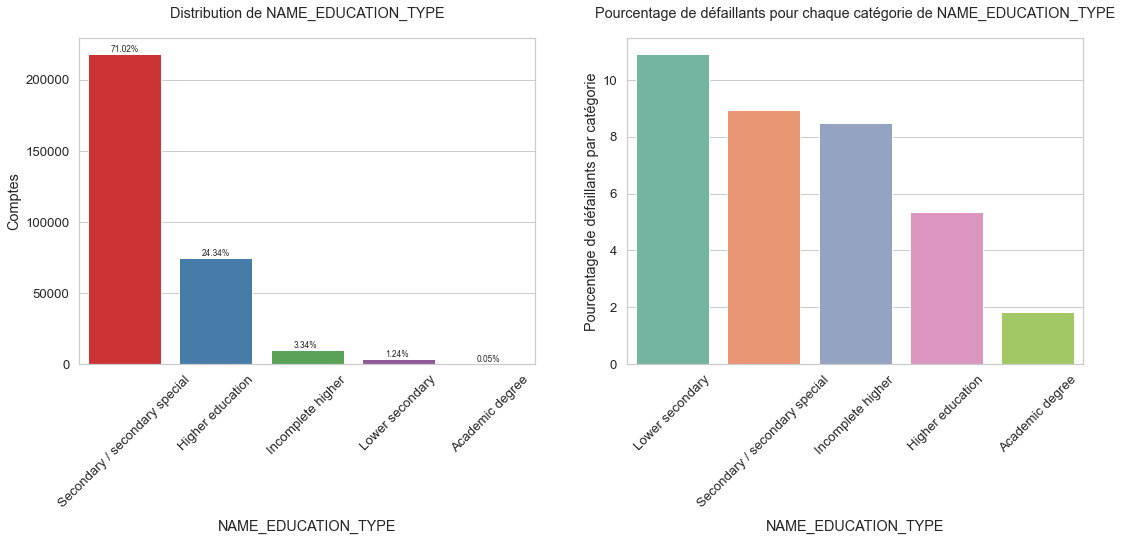

----------------------------------------------------------------------------------------------------


In [31]:
# examinons d'abord les catégories uniques de 'NAME_EDUCATION_TYPE'
print_unique_categories(application_train, 'NAME_EDUCATION_TYPE', show_counts=True)

# tracé du diagramme à barres pour la colonne
plot_categorical_variables_bar(application_train, column_name='NAME_EDUCATION_TYPE', rotation=45, horizontal_adjust=0.25)
print('-'*100)

##### Observations et Conclusions:

En observant les graphiques ci-dessus, nous pouvons tirer les conclusions suivantes :
<ol><li>Environ 71 % des personnes ont terminé leur éducation au niveau Secondaire/Secondaire spécial, tandis que 24,34 % des clients ont suivi des études supérieures. Cela suggère que la plupart des clients/emprunteurs n'ont pas un niveau d'éducation élevé.</li>
    <li>D'après le deuxième graphique, on constate que les personnes ayant terminé leurs études au niveau Secondaire inférieur présentent les caractéristiques de défaut les plus élevées, tandis que celles ayant suivi des études au niveau Secondaire et Incomplet supérieur ont des tendances de défaut similaires.</li>
    <li>Le groupe de personnes ayant suivi des études supérieures présente une tendance de défaut comparativement plus faible, ce qui est logique. De plus, les personnes ayant un diplôme universitaire présentent le taux de défaut le plus faible. Cependant, le groupe avec un diplôme universitaire est très peu nombreux, il pourrait donc ne pas être très utile dans l'analyse.</li></ol>

<b><u>Distribution de la Variable OCCUPATION_TYPE</u></b>

Cette fonction décrit le type d'occupation du client. Il s'agit d'une fonctionnalité très importante qui peut décrire les caractéristiques de défaut d'un client. Voyons les graphiques correspondants.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'OCCUPATION_TYPE' sont :
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de OCCUPATION_TYPE = 19


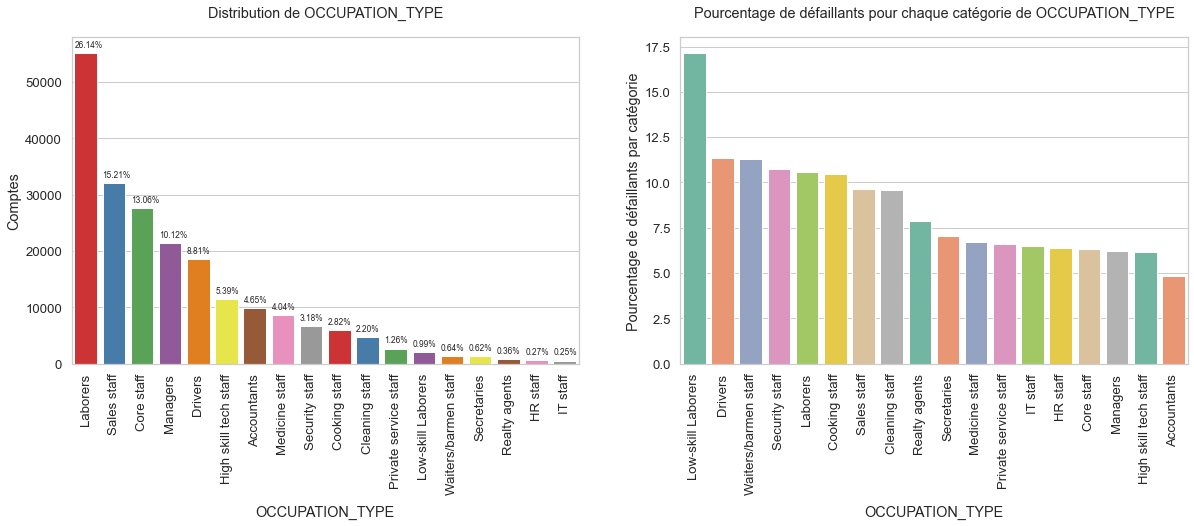

----------------------------------------------------------------------------------------------------


In [32]:
# examinons d'abord les catégories uniques de 'OCCUPATION_TYPE'
print_unique_categories(application_train, 'OCCUPATION_TYPE')

# tracé du diagramme à barres pour la colonne
plot_categorical_variables_bar(application_train, column_name='OCCUPATION_TYPE', figsize=(20, 6), rotation=90)
print('-'*100)

##### Observations et Conclusions:

À partir des graphiques des types d'occupation, nous pouvons tirer les observations suivantes :
<ol><li>Parmi les demandeurs, le type d'occupation le plus courant est "Laborers" (ouvriers) qui représente près de 26 % des demandes. Le type d'occupation le plus fréquent suivant est "Sales Staff" (personnel de vente), suivi de "Core Staff" (personnel principal) et "Managers" (cadres).</li>
    <li>Le taux de défaut le plus élevé concerne les "Low-Skill Laborers" (ouvriers non qualifiés) parmi tous les types d'occupation (environ 17,5 %). Il est suivi par les "Drivers" (chauffeurs), "Waiters" (serveurs), "Security Staff" (personnel de sécurité), "Laborers" (ouvriers), "Cooking Staff" (personnel de cuisine), etc. Tous ces emplois sont des emplois de bas niveau. Cela montre que les personnes occupant des emplois de bas niveau ont tendance à avoir un taux de défaut plus élevé.</li>
    <li>Les taux de défaut les plus bas sont observés chez les "Accountants" (comptables), "Core Staff" (personnel principal), "Managers" (cadres), "High skill tech staff" (personnel technique hautement qualifié), "HR staff" (personnel des ressources humaines), etc., qui occupent des emplois de niveau moyen à élevé.</li></ol>

Ainsi, on peut conclure que les travailleurs occupant des emplois de bas niveau ont tendance à avoir une propension plus élevée à la défaillance par rapport aux emplois de niveau moyen à élevé.

<b><u>Distribution de la Variable ORGANIZATION_TYPE</u></b>

De la même manière que le type d'occupation, le type d'organisation auquel le client appartient pourrait également être une caractéristique importante pour prédire le risque de défaut de ce client. Visualisons cette fonctionnalité plus en détail.

Nombre total de catégories de ORGANIZATION_TYPE = 58


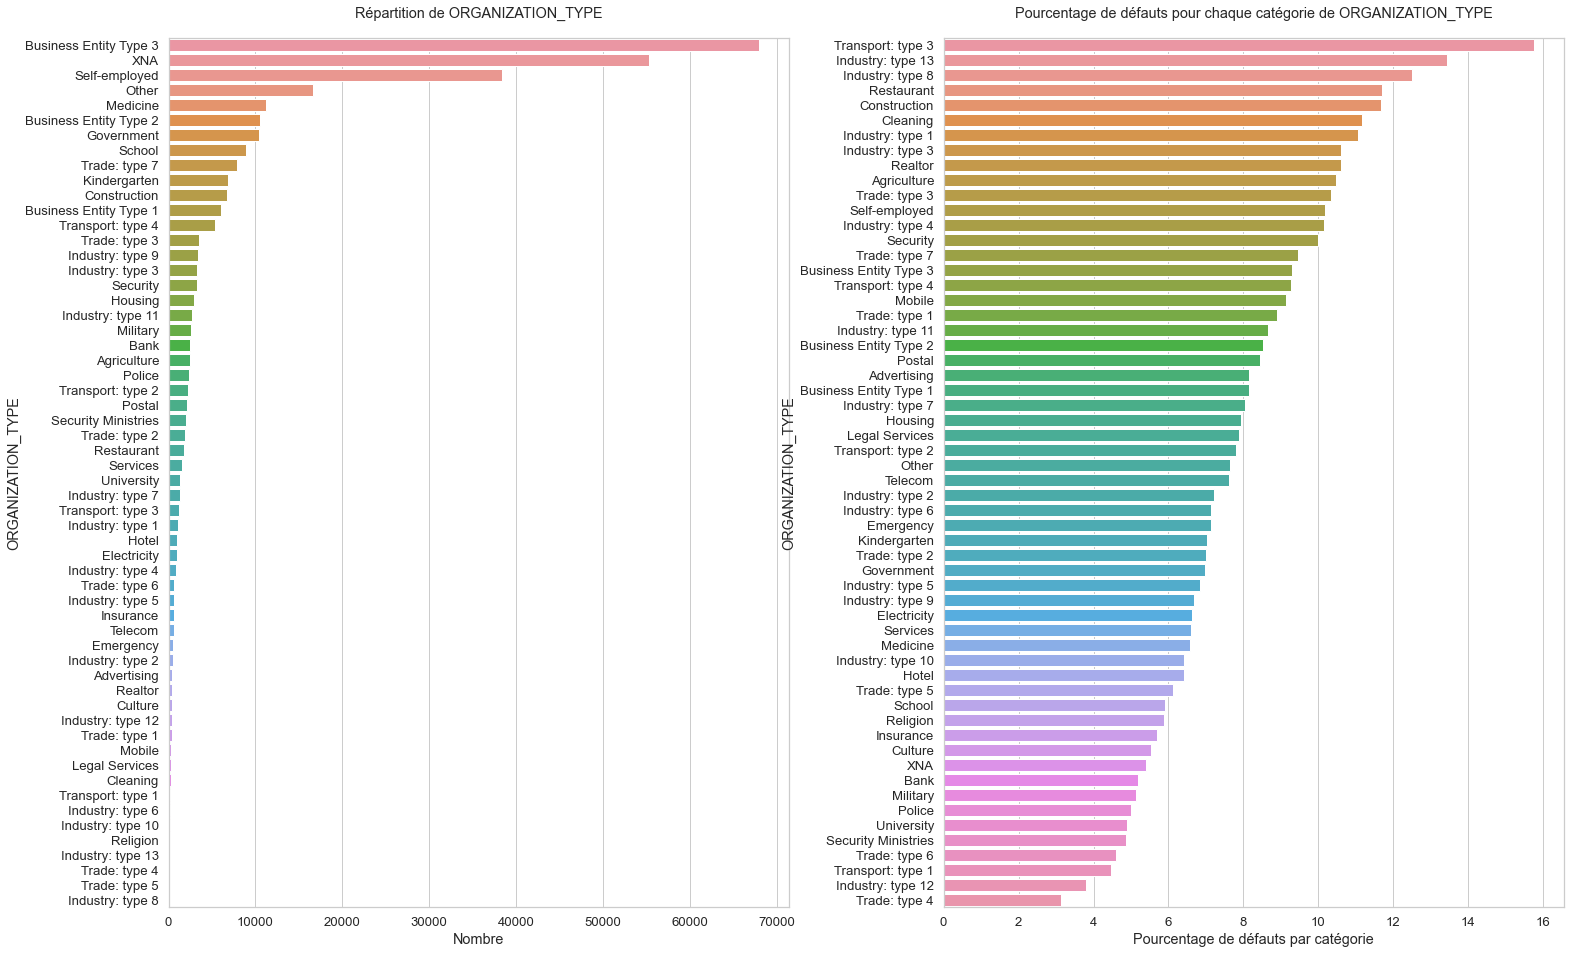

In [33]:
# Afficher le nombre total de catégories de ORGANIZATION_TYPE
print(f"Nombre total de catégories de ORGANIZATION_TYPE = {len(application_train.ORGANIZATION_TYPE.unique())}")

# Créer une figure pour les graphiques
plt.figure(figsize=(25, 16))

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=0.25)

# Sous-graphique 1 : Distribution de ORGANIZATION_TYPE
plt.subplot(1, 2, 1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts().sort_values(ascending=False)
sns.barplot(x=count_organization, y=count_organization.index)
plt.title('Répartition de ORGANIZATION_TYPE', pad=20)
plt.xlabel('Nombre')
plt.ylabel('ORGANIZATION_TYPE')

# Sous-graphique 2 : Pourcentage de défauts pour chaque catégorie de ORGANIZATION_TYPE
plt.subplot(1, 2, 2)
percentage_default_per_organization = application_train[application_train.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_default_per_organization = percentage_default_per_organization.dropna().sort_values(ascending=False)
sns.barplot(x=percentage_default_per_organization, y=percentage_default_per_organization.index)
plt.title('Pourcentage de défauts pour chaque catégorie de ORGANIZATION_TYPE', pad=20)
plt.xlabel('Pourcentage de défauts par catégorie')
plt.ylabel('ORGANIZATION_TYPE')

# Afficher les graphiques
plt.show()

##### Observations et Conclusions:

D'après les graphiques ci-dessus, nous pouvons faire les observations suivantes :
<ol><li>D'après le premier graphique, on constate que la plupart des demandeurs d'emprunt travaillent dans des organisations de type "Business Entity Type3", "XNA" ou "Self Employed". Le type d'organisation "XNA" pourrait probablement représenter des organisations non classifiées.</li>
    <li>D'après le deuxième graphique, on remarque que les demandeurs d'emprunt appartenant à l'organisation de type "Transport: type 3" ont la tendance la plus élevée à la défaillance par rapport aux autres. Ils sont suivis par les organisations de types "Industry: type 13", "Industry: type 8", "Restaurant", "Construction", etc.</li>
    <li>Les organisations qui présentent les taux de défaillance les plus faibles sont "Trade: type 4", "Industry: type 12", etc.</li>
</ol>
Ces numéros de type pourraient également fournir des informations supplémentaires sur l'organisation, cependant, nous n'avons aucune information à ce sujet, nous nous en tiendrons donc aux noms qui nous ont été fournis.

<b><u>Distribution des variables REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY</u></b>
<br><br>
<i>REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY:</i><br>
Ces colonnes incluent des indicateurs indiquant si l'adresse permanente du client correspond ou non à son adresse de contact ou à son adresse de travail au niveau régional.<br><br>
<i>LIVE_CITY_NOT_WORK_CITY</i>
Cette colonne indique si l'adresse permanente du client correspond ou non à son adresse de contact au niveau de la ville.<br><br>
Ici, 1 indique des adresses différentes et 0 indique des adresses identiques.

----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de REG_CITY_NOT_LIVE_CITY = 2


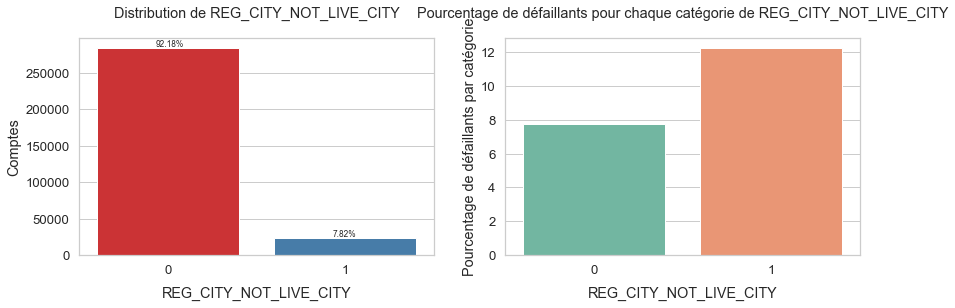

----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de REG_CITY_NOT_WORK_CITY = 2


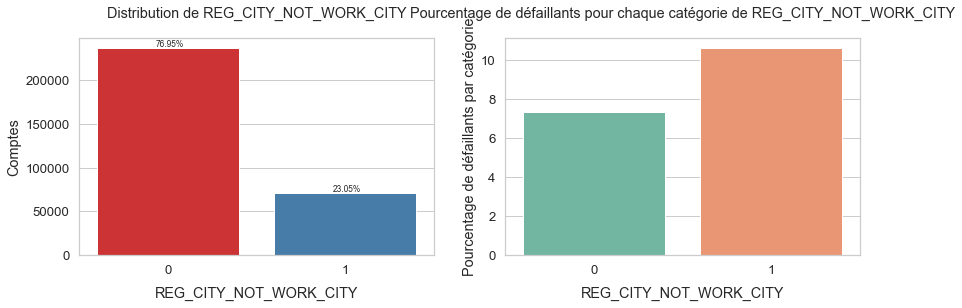

----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de LIVE_CITY_NOT_WORK_CITY = 2


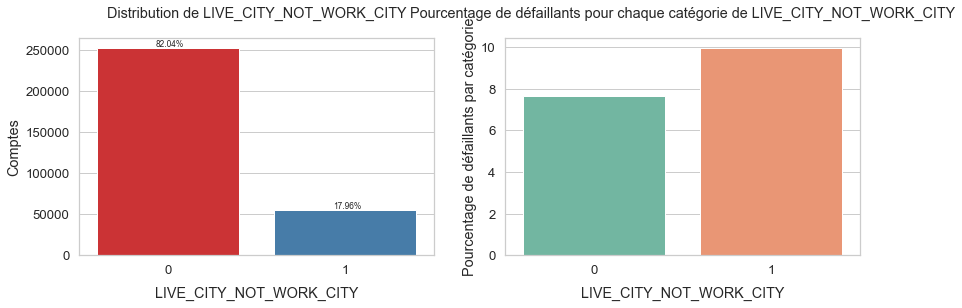

----------------------------------------------------------------------------------------------------


In [34]:
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'REG_CITY_NOT_LIVE_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'REG_CITY_NOT_WORK_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)
plot_categorical_variables_bar(application_train, column_name = 'LIVE_CITY_NOT_WORK_CITY', figsize = (14, 4), horizontal_adjust = 0.33)
print('-'*100)

##### Observations et Conclusions:

Des observations suivantes peuvent être tirées des trois graphiques ci-dessus :
<ol>
    <li>Sur l'ensemble des demandeurs, il y a seulement une minorité d'entre eux dont les adresses ne correspondent pas.
        <ul>
            <li>Tout d'abord, seulement 7,52 % des personnes ont une adresse permanente différente de leur adresse de contact au niveau régional.</li>
            <li>Ensuite, environ 23,05 % des personnes ont une adresse permanente différente de leur adresse de travail au niveau régional. Ce nombre plus élevé s'explique par le fait qu'il est possible qu'ils travaillent dans une région différente de celle de leur adresse permanente.</li>
            <li>Enfin, environ 17,96 % des personnes ont une adresse permanente différente de leur adresse de contact au niveau de la ville.</li>
        </ul>
    </li>
    <li>
        <ul>
            <li>Si l'on examine les caractéristiques de défaut de paiement, on constate que les personnes ayant des adresses permanentes et de contact différentes au niveau régional présentent la plus forte tendance au défaut de paiement, suivies de celles ayant des adresses permanentes et de travail différentes, puis de celles ayant des adresses permanentes et de contact différentes au niveau de la ville.</li>
            <li>Dans tous les cas, on constate que les personnes ayant des adresses différentes ont une tendance au défaut de paiement plus élevée que celles ayant des adresses identiques. Cela signifie que quelque part, cette différence d'adresse peut suggérer un risque de défaut de paiement.</li>
        </ul>
    </li>
</ol>

<b><u>Distribution des variables FLAG_DOCUMENT_3</u></b>


Cette colonne contient un indicateur concernant un document qui devait être soumis par le demandeur. Sa valeur est 0 si le client a fourni le document et 1 sinon.

Nombre total de catégories uniques de FLAG_DOCUMENT_3 = 2


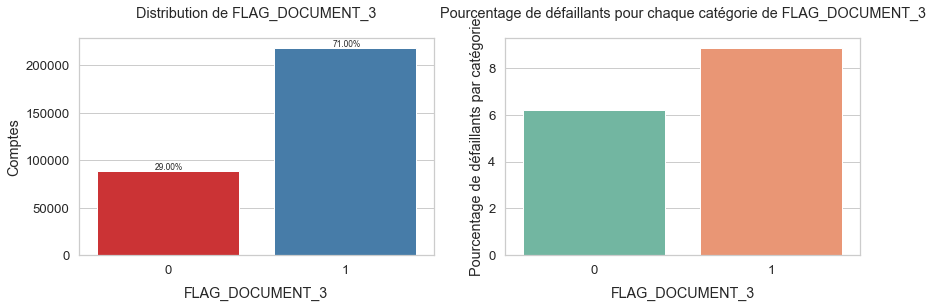

In [35]:
plot_categorical_variables_bar(application_train, column_name = 'FLAG_DOCUMENT_3', figsize = (14, 4), horizontal_adjust = 0.33)

##### Observations et Conclusions:

D'après le graphique ci-dessus, nous constatons ce qui suit :
<ol><li>D'après le premier sous-graphique, on observe que la plupart des clients n'ont pas fourni ce document (~71%) et seulement 29% l'ont fait.</li>
    <li>D'après le deuxième sous-graphique, on constate que ceux qui ont fourni ce document ont un taux de défaut plus élevé que ceux qui ne l'ont pas fait. Cela signifie que les demandeurs qui ont fourni le Document_3 ont tendance à faire défaut plus souvent que ceux qui ne l'ont pas fait.</li>
    <li>Il se pourrait que cela concerne un certificat BPL ou quelque chose du genre, mais nous n'avons pas reçu cette information, nous ne pouvons donc rien dire sur le type de document en question.</li>
</ol>

#### Variables continues

<b><u>Distribution de la variable continue Age of Applicant</u></b>

Pour l'ensemble de données donné, l'âge est donné en jours, ce qui peut être plus difficile à interpréter. Nous allons donc créer une variable latente pour stocker les âges en années, ce qui sera plus facile à analyser et à interpréter.

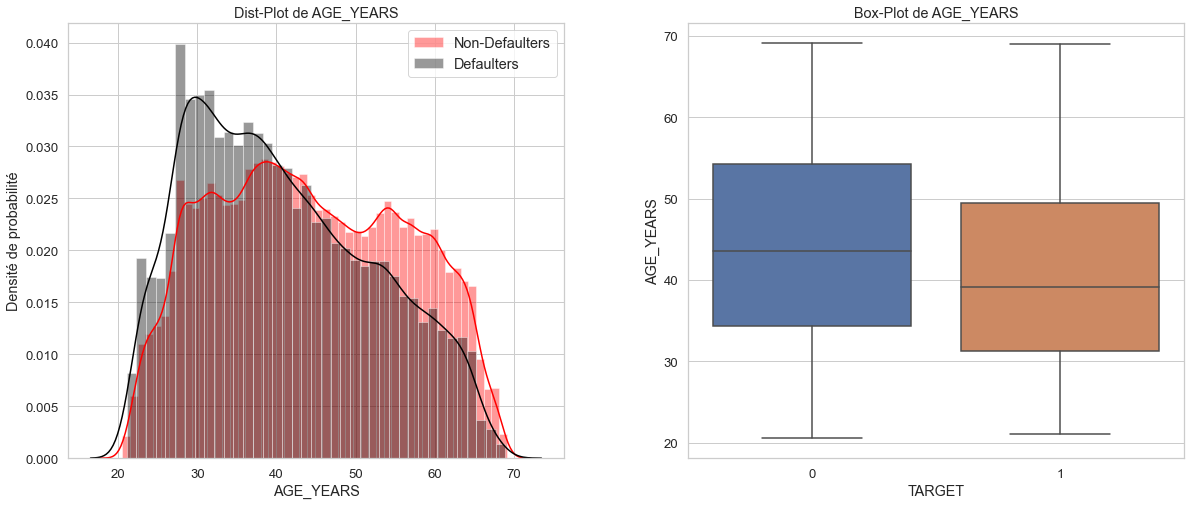

In [36]:
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] * -1 / 365
plot_continuous_variables(application_train, 'AGE_YEARS', plots = ['distplot','box'])
_ = application_train.pop('AGE_YEARS')

##### Observations et Conclusions:

D'après les deux graphiques ci-dessus, nous pouvons tirer quelques observations importantes :
<ol><li>À partir du distplot, nous pouvons observer que l'âge des personnes qui font défaut atteint son maximum vers 30 ans. De plus, à ce point, la distribution de densité de probabilité (PDF) des non-défauts est nettement plus petite. Une autre chose à noter est que la PDF de l'âge des défaillants commence légèrement à gauche de celle des non-défauts, et est également légèrement présente dans toute la plage. Cela signifie que les défaillants sont généralement plus jeunes que les non-défaillants.</li>
    <li>À partir du CDF également, nous observons que la probabilité que l'âge des défaillants soit inférieur à un certain seuil est plus élevée que celle des non-défaillants. Cela confirme l'observation précédente selon laquelle les défaillants sont généralement plus jeunes.</li>
    <li>À partir de la boîte à moustaches, nous pouvons également visualiser cette même tendance. L'âge des défaillants est généralement inférieur à celui des non-défaillants. Tous les quantiles d'âge des défaillants sont inférieurs à ceux des non-défaillants. La valeur du 75e centile des non-défaillants est d'environ 54 ans, tandis que pour les défaillants, elle est proche de 49 ans.</li></ol>
Ces observations indiquent que les défaillants sont généralement plus jeunes que les non-défaillants.

<b><u>Distribution des Variables avec DAYS features</u><b>



<b>DAYS_EMPLOYED</b><br>

Cette caractéristique indique le nombre de jours écoulés depuis le début de l'emploi du demandeur jusqu'au jour de la demande. Pour une interprétation plus facile, nous convertirons les jours en années.

----------------------------------------------------------------------------------------------------
La valeur du 0e percentile de DAYS_EMPLOYED est -17912.0
La valeur du 25e percentile de DAYS_EMPLOYED est -2760.0
La valeur du 50e percentile de DAYS_EMPLOYED est -1213.0
La valeur du 75e percentile de DAYS_EMPLOYED est -289.0
La valeur du 90e percentile de DAYS_EMPLOYED est 365243.0
La valeur du 92e percentile de DAYS_EMPLOYED est 365243.0
La valeur du 94e percentile de DAYS_EMPLOYED est 365243.0
La valeur du 96e percentile de DAYS_EMPLOYED est 365243.0
La valeur du 98e percentile de DAYS_EMPLOYED est 365243.0
La valeur du 100e percentile de DAYS_EMPLOYED est 365243.0
----------------------------------------------------------------------------------------------------


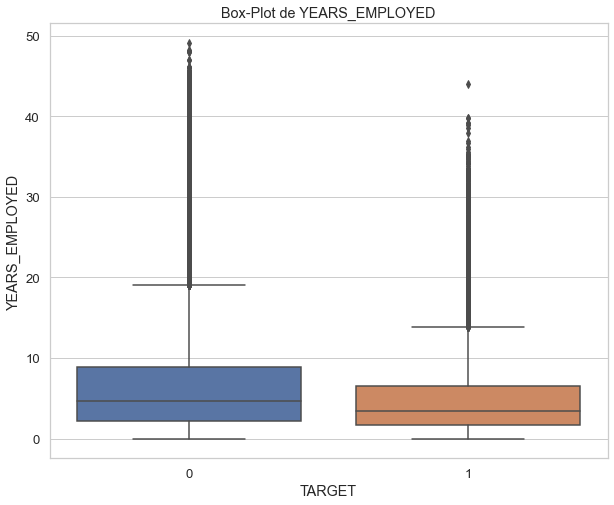

In [37]:
application_train['YEARS_EMPLOYED'] = application_train.DAYS_EMPLOYED * -1 / 365
print_percentiles(application_train, 'DAYS_EMPLOYED')
plot_continuous_variables(application_train, 'YEARS_EMPLOYED', plots = ['box'], scale_limits = [0,70], figsize = (10,8))
_ = application_train.pop('YEARS_EMPLOYED')

##### Observations et Conclusions:

<ol><li>Nous constatons que la colonne DAYS_EMPLOYED contient certaines valeurs erronées avec des valeurs de 365243. Il s'agit probablement de valeurs erronées ou non pertinentes.</li>
    <li>D'après le diagramme en boîte, nous observons que les personnes ayant des défauts semblent avoir moins d'années d'ancienneté professionnelle par rapport à celles sans défauts. Les quantiles de 25e, 50e et 75e percentile pour les personnes ayant des défauts sont inférieurs à ceux des personnes sans défauts.</li></ol>

<b>DAYS_ID_PUBLISH</b><br>

Cette colonne indique depuis combien de jours le client a changé son document d'identité avec lequel il a fait sa demande de prêt, par rapport à la date d'inscription.

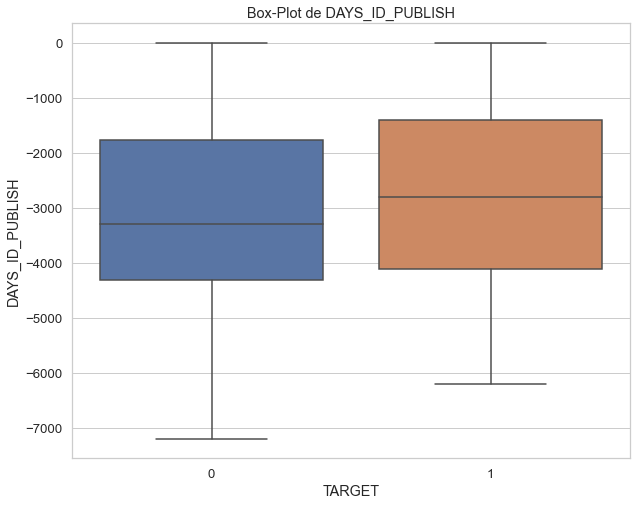

In [38]:
plot_continuous_variables(application_train, 'DAYS_ID_PUBLISH', plots = ['box'], figsize = (10,8))

##### Observations et Conclusions:

D'après le diagramme en boîte ci-dessus, nous observons une tendance similaire à celle observée avec les jours d'inscription (DAYS_REGISTRATION), selon laquelle les clients en défaut ont généralement un nombre de jours moins élevé depuis qu'ils ont changé leur document d'identité. Les clients non en défaut montrent avoir un nombre de jours plus élevé pour tous les quantiles depuis qu'ils ont changé leur document d'identité.

<b><u>Distribution de EXT_SOURCES</u></b>

Il y a trois colonnes EXT_SOURCES, qui contiennent des valeurs comprises entre 0 et 1. Ce sont des scores normalisés provenant de différentes sources.

----------------------------------------------------------------------------------------------------


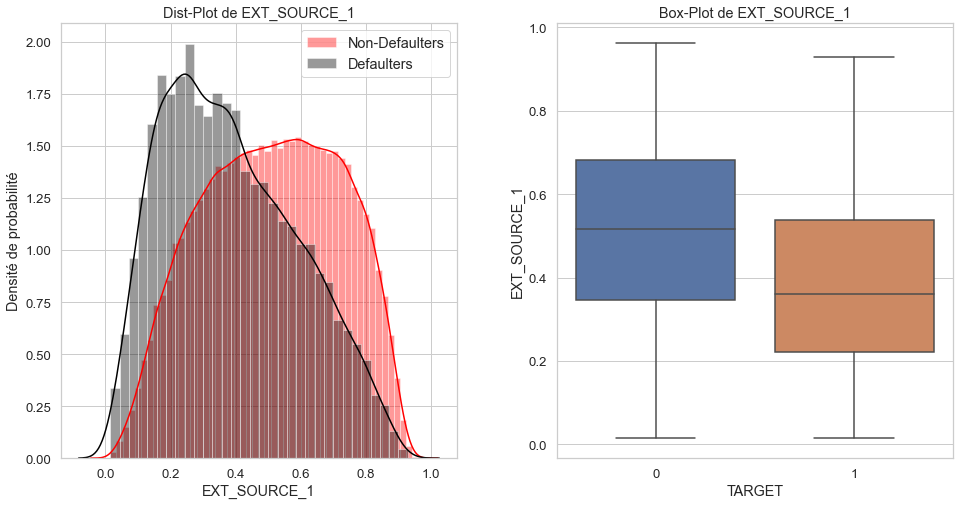

----------------------------------------------------------------------------------------------------


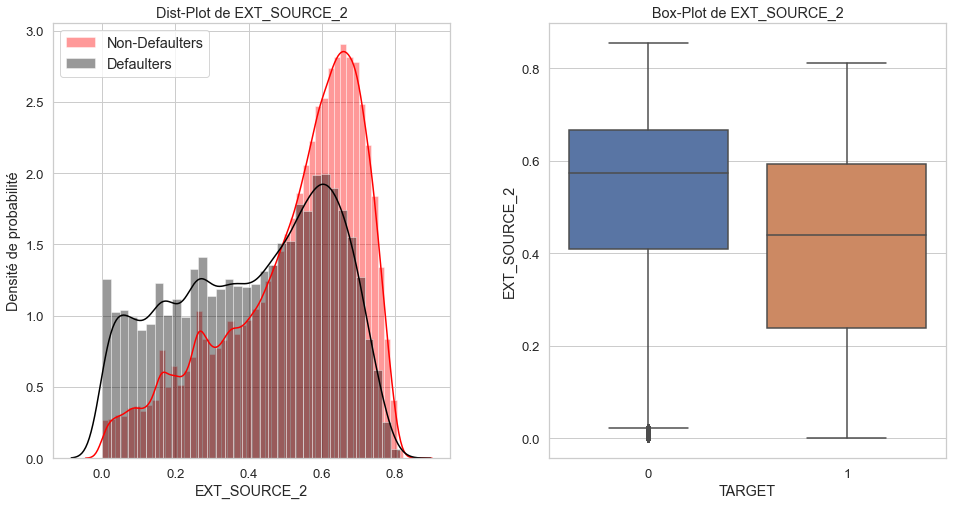

----------------------------------------------------------------------------------------------------


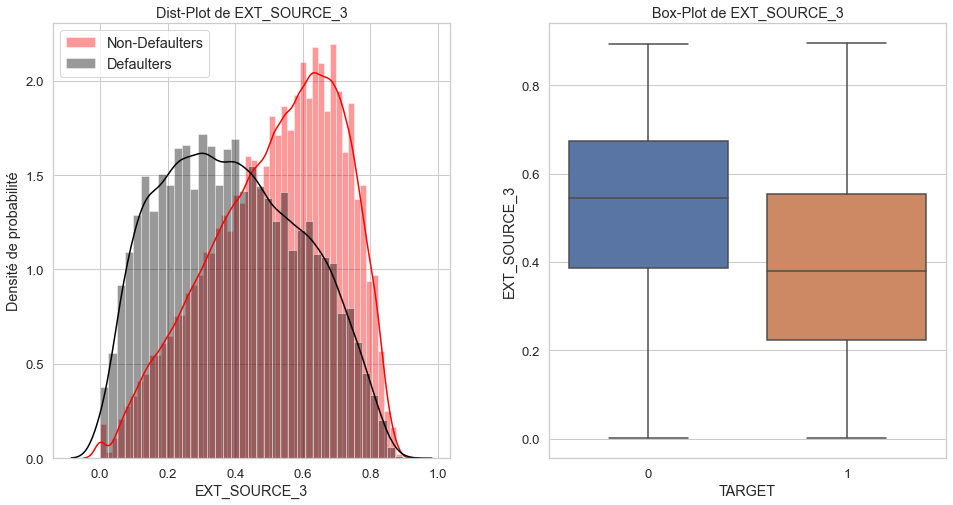

----------------------------------------------------------------------------------------------------


In [39]:
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_1', plots = ['distplot', 'box'], figsize = (16,8))
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_2', plots = ['distplot', 'box'], figsize = (16,8))
print('-'*100)
plot_continuous_variables(application_train, 'EXT_SOURCE_3', plots = ['distplot', 'box'], figsize = (16,8))
print('-'*100)

##### Observations et Conclusions:

Dans les trois graphiques ci-dessus, nous pouvons tirer les conclusions suivantes :
<ol>
    <li>Si nous examinons les diagrammes en boîte, nous pouvons clairement voir une tendance similaire pour les trois colonnes EXT_SOURCE, à savoir que les personnes en défaut ont généralement des valeurs considérablement plus faibles.
    <li>Cette tendance peut également être observée dans les fonctions de densité de probabilité (PDF). Les personnes non défaillantes présentent un pic plus élevé pour des valeurs élevées de EXT_SOURCE, et les densités de probabilité sont très faibles pour les faibles valeurs. Cela signifie que les personnes non défaillantes ont généralement des valeurs élevées de ces scores.
    <li>Il est intéressant de noter que la valeur médiane des valeurs par défaut est presque égale ou inférieure aux valeurs du 25e percentile des personnes non défaillantes.
    <li>Les colonnes EXT_SOURCE_1 et EXT_SOURCE_3 semblent mieux distinguer les défaillants des non-défaillants que la colonne EXT_SOURCE_2.
    <li>Ces trois caractéristiques semblent être les meilleures pour séparer linéairement les défaillants des non-défaillants parmi toutes les caractéristiques examinées jusqu'à présent.
</ol>

<b><u>Distribution de FLOORSMAX_AVG et FLOORSMIN_MODE</u></b>

Ces colonnes décrivent les scores normalisés de la moyenne du nombre maximum d'étages et du mode du nombre minimum d'étages dans le bâtiment du demandeur.

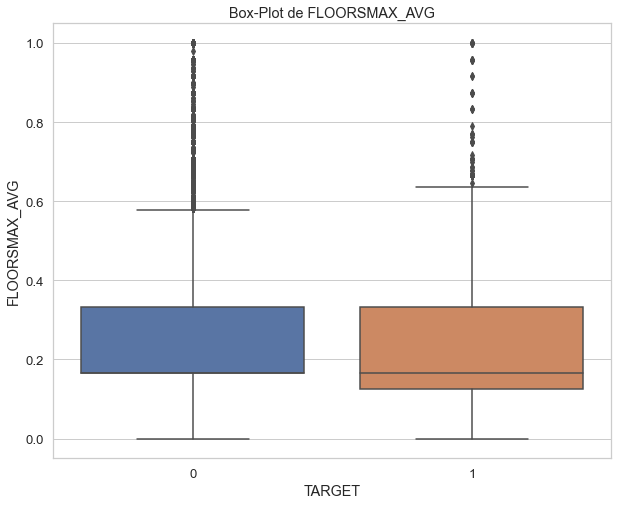

In [40]:
plot_continuous_variables(application_train, 'FLOORSMAX_AVG', plots = ['box'], figsize = (10,8))

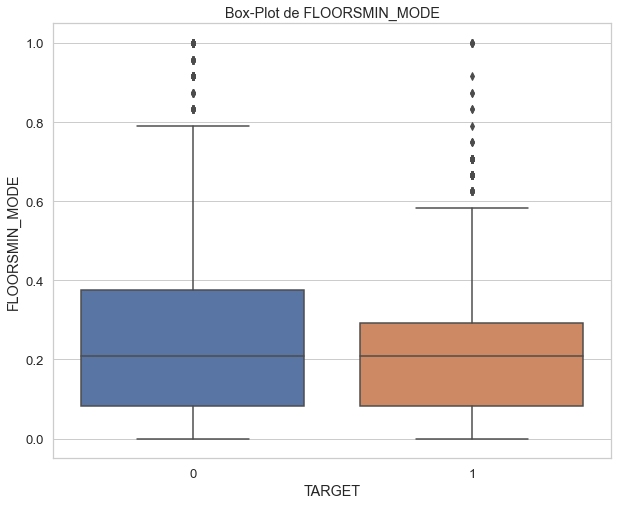

In [41]:
plot_continuous_variables(application_train, 'FLOORSMIN_MODE', plots = ['box'], figsize = (10,8))

##### Observations et Conclusions

From the above plot, we can draw the following insights:
<ol><li>Les défaillants ont une valeur médiane plus faible pour la caractéristique FLOORSMAX_AVG par rapport aux non-défaillants. Les valeurs du 75e percentile des défaillants et des non-défaillants sont plus ou moins les mêmes, mais la valeur du 25e percentile des non-défaillants est presque supérieure à la médiane des défaillants, ce qui pourrait être une caractéristique importante.</li>
    <li>Les non-défaillants ont également tendance à avoir une valeur plus élevée de la caractéristique FLOORSMIN_MODE par rapport aux défaillants. La valeur du 75e percentile des non-défaillants est significativement plus élevée que celle du 75e percentile des défaillants.</li></ol>

### bureau.csv

##### Description

Ce tableau contient tous les enregistrements de crédit précédents des clients avec des institutions financières autres que Home Credit Group, qui ont été rapportés par le Bureau de crédit.

#### Stats

In [42]:
print(f"La forme de bureau.csv est : {bureau.shape}")
print('-'*100)
print(f"Le nombre unique de SK_ID_BUREAU dans bureau.csv est : {len(bureau.SK_ID_BUREAU.unique())}")
print(f"Le nombre unique de SK_ID_CURR dans bureau.csv est : {len(bureau.SK_ID_CURR.unique())}")
print(f"Le nombre de SK_ID_CURR en commun entre application_train.csv et bureau.csv est : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(bureau.SK_ID_CURR.unique())))}")
print(f"Le nombre de SK_ID_CURR en commun entre application_test.csv et bureau.csv est : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(bureau.SK_ID_CURR.unique())))}")
print('-'*100)
print(f"Le nombre de valeurs en double dans bureau : {bureau.shape[0] - bureau.duplicated().shape[0]}")
print('-'*100)
display(bureau.head(5))

La forme de bureau.csv est : (1716428, 17)
----------------------------------------------------------------------------------------------------
Le nombre unique de SK_ID_BUREAU dans bureau.csv est : 1716428
Le nombre unique de SK_ID_CURR dans bureau.csv est : 305811
Le nombre de SK_ID_CURR en commun entre application_train.csv et bureau.csv est : 263491
Le nombre de SK_ID_CURR en commun entre application_test.csv et bureau.csv est : 42320
----------------------------------------------------------------------------------------------------
Le nombre de valeurs en double dans bureau : 0
----------------------------------------------------------------------------------------------------


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


<h5>Observations et Conclusions:</h5>

<ol>
    <li>Le fichier bureau.csv contient près de 1,7 million de points de données, avec 17 caractéristiques. Parmi ces 17 caractéristiques, deux d'entre elles sont SK_ID_CURR et SK_ID_BUREAU.
        <ul>
            <li>SK_ID_BUREAU est l'identifiant du prêt du client provenant d'un autre établissement financier. Il peut y avoir plusieurs prêts précédents correspondant à un seul SK_ID_CURR, en fonction des habitudes d'emprunt du client.</li>
            <li>SK_ID_CURR est l'identifiant du prêt actuel du client avec Home Credit.</li>
            <li>Le reste des caractéristiques contient d'autres statistiques telles que DAYS_CREDIT, AMT_CREDIT_SUM, CREDIT_TYPE, etc.</li>
        </ul>
    </li>
    <li>Il y a 305 000 SK_ID_CURR uniques dans bureau, dont :
        <ul>
            <li>Il y a 263 000 SK_ID_CURR dans bureau qui sont présents dans application_train sur un total de 307 000 SK_ID_CURR uniques dans application_train. Cela signifie que certains des demandeurs de prêt actuels auprès de Home Credit Group n'ont pas d'historique de crédit antérieur avec le service des bureaux de crédit.</li>
            <li>De même, il y a 42 300 SK_ID_CURR dans bureau qui sont présents dans application_test, sur un total de 48 000 SK_ID_CURR uniques dans application_test.</li>
        </ul>
    </li>
</ol>

#### Valeurs manquantes

----------------------------------------------------------------------------------------------------
Nombre de colonnes contenant des valeurs NaN : 7 colonnes


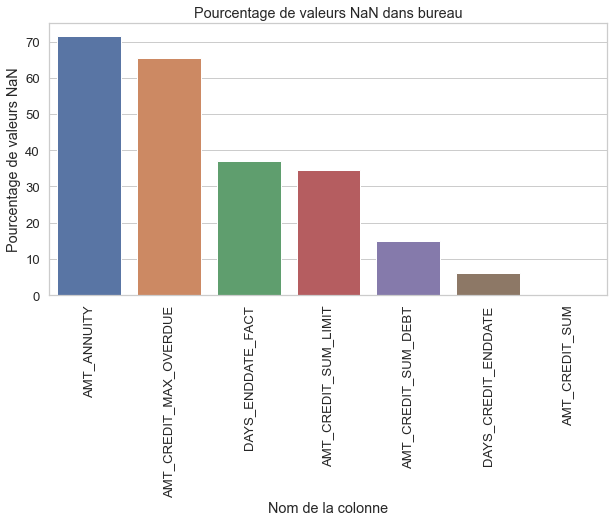

----------------------------------------------------------------------------------------------------


In [43]:
nan_df_bureau = nan_df_create(bureau)
print("-"*100)
plot_nan_percent(nan_df_bureau, 'bureau', tight_layout = False, figsize = (10,5))
print('-'*100)

##### Observations et Conclusions:

<ol>
    <li>Parmi les 17 caractéristiques, il y a 7 caractéristiques qui contiennent des valeurs NaN.
    <li>Le plus grand nombre de valeurs manquantes est observé dans la colonne AMT_ANNUITY, qui compte plus de 70% de valeurs manquantes.</li>
</ol>

Pour fusionner la variable cible (TARGET) du tableau application_train avec le tableau bureau, nous devons d'abord joindre les deux tables sur la colonne commune SK_ID_CURR. Cela permettra d'obtenir la variable cible correspondante pour chaque SK_ID_CURR dans le tableau bureau.

In [44]:
print("-"*100)
print("Fusion de la variable TARGET avec la table bureau")
bureau_merged = application_train.iloc[:,:2].merge(bureau, on='SK_ID_CURR', how='left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion de la variable TARGET avec la table bureau
----------------------------------------------------------------------------------------------------


#### Phi-K Matrix

----------------------------------------------------------------------------------------------------


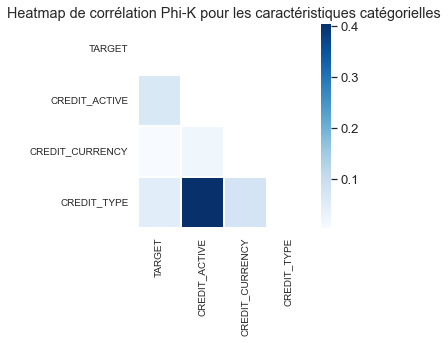

----------------------------------------------------------------------------------------------------
Catégories ayant les valeurs les plus élevées de corrélation Phi-K avec la variable cible :


,Nom de la colonne,Corrélation Phi-K
0,CREDIT_ACTIVE,0.064481
2,CREDIT_TYPE,0.049954
1,CREDIT_CURRENCY,0.004993


----------------------------------------------------------------------------------------------------


In [45]:
cols_for_phik = ['TARGET','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
plot_phik_matrix(bureau_merged, cols_for_phik,  figsize = (5,5))

##### Observations et Conclusions:

Le heatmap ci-dessus montre les valeurs de corrélation Phi-K entre les variables catégorielles.
<ol>
<li>D'après le coefficient de corrélation Phi-K, nous constatons que la variable CREDIT_TYPE présente une certaine association avec la variable CREDIT_ACTIVE.</li>
<li>Nous constatons que les variables catégorielles n'ont pas vraiment une forte association avec la variable TARGET, en particulier la variable CREDIT_CURRENCY.</li>
</ol>

#### Matrice de corrélation des features

----------------------------------------------------------------------------------------------------


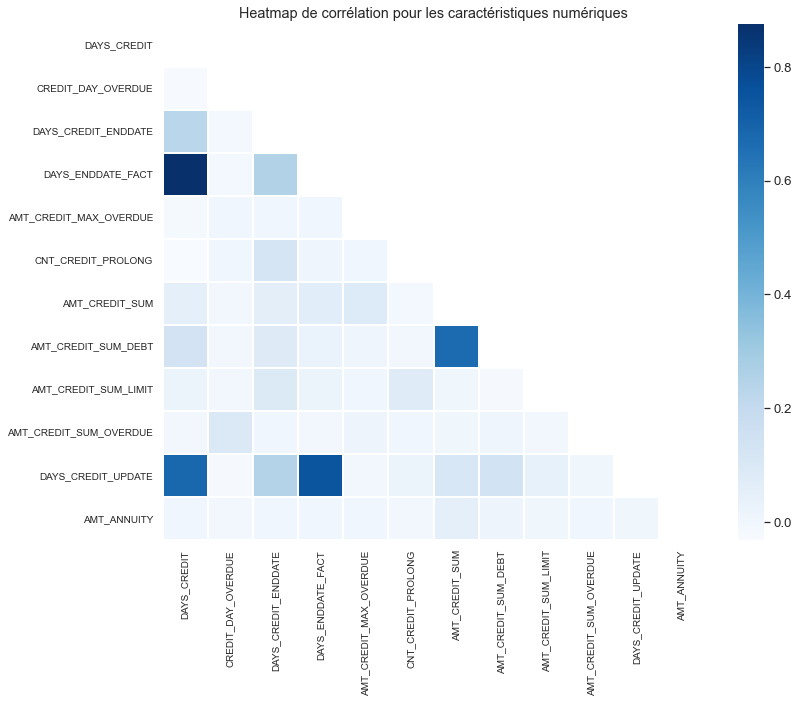

----------------------------------------------------------------------------------------------------


In [46]:
corr_mat = correlation_matrix(bureau_merged, ['SK_ID_CURR','SK_ID_BUREAU'], cmap = 'Blues', figsize = (12,10))
corr_mat.plot_correlation_matrix()

In [47]:
#Affichage des colonnes les plus corrélées avec la variable cible dans la table bureau
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec les valeurs les plus élevées de corrélation Phik avec la variable cible :")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT']
interval columns not set, guessing: ['TARGET', 'CREDIT_DAY_OVERDUE']
interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT_ENDDATE']
interval columns not set, guessing: ['TARGET', 'DAYS_ENDDATE_FACT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_MAX_OVERDUE']
interval columns not set, guessing: ['TARGET', 'CNT_CREDIT_PROLONG']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_DEBT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_LIMIT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_OVERDUE']
interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT_UPDATE']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
----------------------------------------------------------------------------------------------------
Colonnes avec les valeurs les plus élevées de corrélation Phik avec la variabl

,Nom de la colonne,Phik-Corrélation
0,DAYS_CREDIT,0.088651
2,DAYS_CREDIT_ENDDATE,0.018980
9,AMT_CREDIT_SUM_OVERDUE,0.005654
8,AMT_CREDIT_SUM_LIMIT,0.005192
4,AMT_CREDIT_MAX_OVERDUE,0.004280
5,CNT_CREDIT_PROLONG,0.003862
1,CREDIT_DAY_OVERDUE,0.002528
10,DAYS_CREDIT_UPDATE,0.002219
7,AMT_CREDIT_SUM_DEBT,0.001695
6,AMT_CREDIT_SUM,0.000670


----------------------------------------------------------------------------------------------------


##### Observations et Conclusions:

<ol>
    <li>Le heatmap ci-dessus montre la corrélation entre chaque variable de la table bureau et les autres variables.</li>
    <li>On peut observer que la plupart du heatmap présente des couleurs claires, ce qui indique une faible corrélation.</li>
    <li>Cependant, nous pouvons voir quelques nuances sombres qui représentent une corrélation élevée.</li>
    <li>La corrélation élevée est particulièrement observée pour les variables :
        <ol><li>DAYS_CREDIT et DAYS_CREDIT_UPDATE</li>
            <li>DAYS_ENDDATE_FACT et DAYS_CREDIT_UPDATE</li>
            <li>AMT_CREDIT_SUM et AMT_CREDIT_SUM_DEBT</li>
            <li>DAYS_ENDDATE_FACT et DAYS_CREDIT</li></ol></li>
    <li>On peut également constater que les variables ne présentent pas une corrélation significative avec la variable cible, à l'exception de la variable DAYS_CREDIT. Cela implique qu'il n'y a pas de relation linéaire directe entre la variable cible et les variables.</li></ol>

#### Graphique des variables catégorielles

Nous allons maintenant tracer quelques variables catégorielles de la table "bureau" et observer leur impact sur la variable cible.

<b><u>Distribution de la Variable CREDIT_ACTIVE</u></b>

Cette colonne décrit l'état du prêt précédent tel que rapporté par le Credit Bureau.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'CREDIT_ACTIVE' sont :
['Closed' 'Active' nan 'Sold' 'Bad debt']
----------------------------------------------------------------------------------------------------
Les comptes de chaque catégorie sont :
Closed      917733
Active      541919
Sold          5653
Bad debt        20
Name: CREDIT_ACTIVE, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de CREDIT_ACTIVE = 5


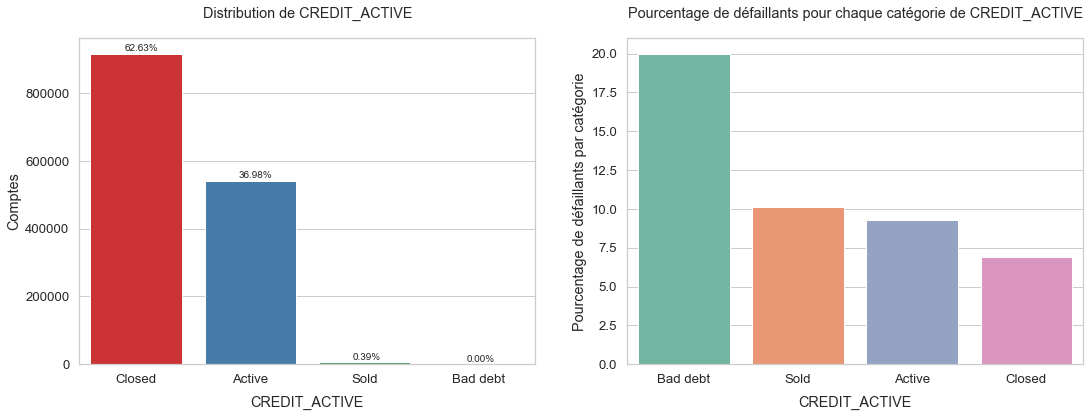

----------------------------------------------------------------------------------------------------


In [48]:
# Examinons d'abord les catégories uniques de 'CREDIT_ACTIVE'
print_unique_categories(bureau_merged, 'CREDIT_ACTIVE', show_counts = True)

# Tracé du diagramme en barres pour la colonne
plot_categorical_variables_bar(bureau_merged, column_name = 'CREDIT_ACTIVE', horizontal_adjust = 0.3, fontsize_percent = 'x-small')
print('-'*100)

##### Observations et Conclusions:

D'après le graphique ci-dessus, nous pouvons tirer les conclusions suivantes :
<ol>
<li>D'après le premier sous-graphique, nous constatons que la majorité des prêts précédents provenant d'autres institutions financières sont des prêts clôturés (62,63 %), suivis de 36,98 % de prêts actifs. Les prêts vendus et les prêts en souffrance sont très peu nombreux.</li>
<li>Si nous examinons le pourcentage de défaillance par catégorie, nous constatons qu'environ 20 % des personnes ayant des prêts en souffrance ont fait défaut, ce qui est le taux de défaillance le plus élevé. Cela est suivi des prêts vendus et des prêts actifs. Le taux de défaillance le plus bas concerne les prêts clôturés, ce qui indique une bonne historique client. Ainsi, le modèle observé ici est tout à fait logique et attendu.</li>
</ol>

#### Graphique variables continues

<u><b>Distribution de la Variable avec DAYS Features</b></u>

<b>DAYS_CREDIT</b>

Ce colonne décrit le nombre de jours écoulés avant la demande actuelle lorsque le client a fait une demande de crédit auprès du Credit Bureau. Pour faciliter l'interprétation, nous convertirons ces jours en années.

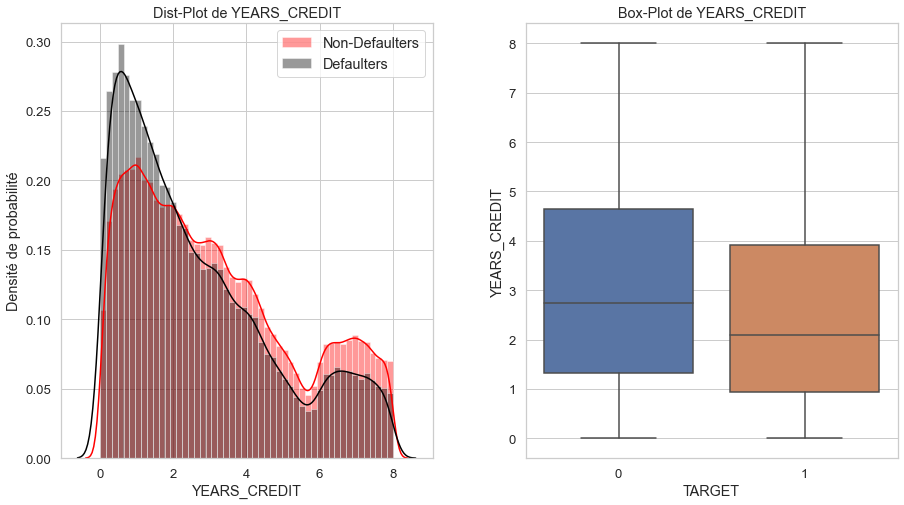

In [49]:
bureau_merged['YEARS_CREDIT'] = bureau_merged['DAYS_CREDIT'] / -365
plot_continuous_variables(bureau_merged, 'YEARS_CREDIT', plots = ['distplot', 'box'], figsize = (15,8))
_ = bureau_merged.pop('YEARS_CREDIT')

##### Observations et Conclusions:

D'après les graphiques ci-dessus, nous constatons que :
<ol><li>D'après la fonction de densité de probabilité (PDF), nous observons que les défaillants ont tendance à avoir des pics plus élevés que les non-défaillants lorsque le nombre d'années est plus faible. Cela implique que les demandeurs ayant récemment fait une demande de crédit auprès du Credit Bureau ont montré une tendance plus prononcée à la défaillance que ceux qui l'avaient fait il y a longtemps. La PDF des défaillants est également légèrement décalée vers la gauche par rapport aux non-défaillants.</li>
    <li>Le graphique en boîte (box-plot) confirme également que les défaillants ont généralement moins d'années de crédit que les non-défaillants.</li></ol>

<b>DAYS_CREDIT_ENDDATE</b>

Cette colonne indique la durée restante du crédit accordé par le Credit Bureau au moment de la demande de prêt chez Home Credit.

----------------------------------------------------------------------------------------------------
La valeur du 0e percentile de DAYS_CREDIT_ENDDATE est -42060.0
La valeur du 2e percentile de DAYS_CREDIT_ENDDATE est -2487.0
La valeur du 4e percentile de DAYS_CREDIT_ENDDATE est -2334.0
La valeur du 6e percentile de DAYS_CREDIT_ENDDATE est -2202.0
La valeur du 8e percentile de DAYS_CREDIT_ENDDATE est -2073.9199999999983
La valeur du 10e percentile de DAYS_CREDIT_ENDDATE est -1939.0
La valeur du 25e percentile de DAYS_CREDIT_ENDDATE est -1144.0
La valeur du 50e percentile de DAYS_CREDIT_ENDDATE est -334.0
La valeur du 75e percentile de DAYS_CREDIT_ENDDATE est 473.0
La valeur du 100e percentile de DAYS_CREDIT_ENDDATE est 31199.0
----------------------------------------------------------------------------------------------------


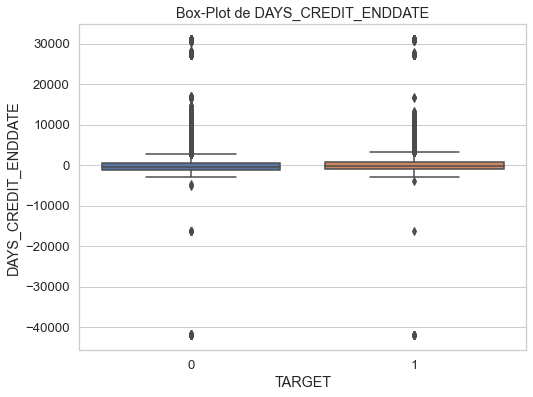

----------------------------------------------------------------------------------------------------


In [50]:
print_percentiles(bureau_merged, 'DAYS_CREDIT_ENDDATE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_ENDDATE', plots = ['box'], figsize = (8,6))
print('-'*100)

##### Observations et Conclusions:

À partir des valeurs percentiles ci-dessus et en examinant le graphique en boîte, nous constatons qu'il semble y avoir une valeur erronée pour DAYS_CREDIT_ENDDATE, où la valeur du 0e percentile remonte à aussi loin que 42 060 jours, soit 115 ans. Cela n'a pas beaucoup de sens car cela impliquerait que le prêt précédent du client remonte à 115 ans. Il pourrait s'agir d'un prêt hérité, mais nous ne pouvons pas en être sûrs. Nous essaierons de supprimer ces valeurs lors de l'étape de prétraitement des données.

<b>DAYS_ENDDATE_FACT</b>

Cette colonne indique le nombre de jours écoulés depuis la fin du crédit du Bureau de crédit au moment de la demande de prêt chez Home Credit. Ces valeurs ne concernent que les crédits clos.

----------------------------------------------------------------------------------------------------
La valeur du 0e percentile de DAYS_ENDDATE_FACT est -42023.0
La valeur du 2e percentile de DAYS_ENDDATE_FACT est -2561.0
La valeur du 4e percentile de DAYS_ENDDATE_FACT est -2450.0
La valeur du 6e percentile de DAYS_ENDDATE_FACT est -2351.0
La valeur du 8e percentile de DAYS_ENDDATE_FACT est -2265.0
La valeur du 10e percentile de DAYS_ENDDATE_FACT est -2173.0
La valeur du 25e percentile de DAYS_ENDDATE_FACT est -1503.0
La valeur du 50e percentile de DAYS_ENDDATE_FACT est -900.0
La valeur du 75e percentile de DAYS_ENDDATE_FACT est -427.0
La valeur du 100e percentile de DAYS_ENDDATE_FACT est 0.0
----------------------------------------------------------------------------------------------------


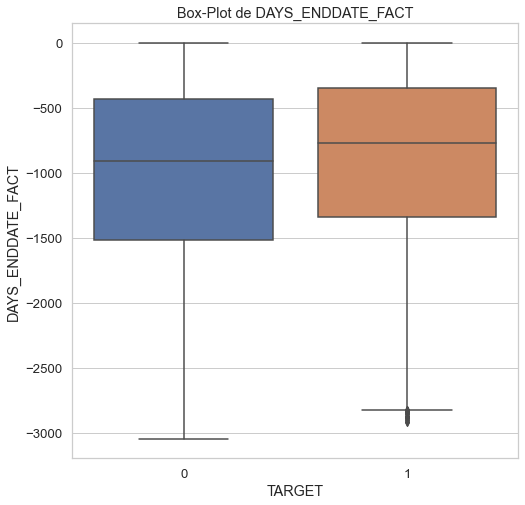

----------------------------------------------------------------------------------------------------


In [51]:
print_percentiles(bureau_merged, 'DAYS_ENDDATE_FACT', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merged, 'DAYS_ENDDATE_FACT', plots = ['box'], figsize = (8,8), scale_limits = [-40000, 0])
print('-'*100)

##### Observations et Conclusions:

<ol><li>Tout comme la colonne précédente, nous constatons que le 0e percentile de cette colonne semble également erroné, soit 42 023 jours, soit environ 115 ans. Nous devrons supprimer ces valeurs car elles n'ont pas beaucoup de sens.</li>
    <li>En regardant le graphique en boîte, nous constatons que les défaillants ont tendance à avoir moins de jours depuis la fin de leur crédit auprès du Bureau de crédit. Les non-défaillants ont généralement vu leurs crédits précédents se terminer plus longtemps avant les défaillants.

<b>DAYS_CREDIT_UPDATE</b>

Cette colonne indique le nombre de jours écoulés depuis la date à laquelle les informations provenant du crédit du Bureau de crédit sont parvenues au moment de la demande de prêt chez Home Credit.

----------------------------------------------------------------------------------------------------
La valeur du 0e percentile de DAYS_CREDIT_UPDATE est -41947.0
La valeur du 2e percentile de DAYS_CREDIT_UPDATE est -2415.0
La valeur du 4e percentile de DAYS_CREDIT_UPDATE est -2213.0
La valeur du 6e percentile de DAYS_CREDIT_UPDATE est -2002.0
La valeur du 8e percentile de DAYS_CREDIT_UPDATE est -1766.0
La valeur du 10e percentile de DAYS_CREDIT_UPDATE est -1582.0
La valeur du 25e percentile de DAYS_CREDIT_UPDATE est -904.0
La valeur du 50e percentile de DAYS_CREDIT_UPDATE est -406.0
La valeur du 75e percentile de DAYS_CREDIT_UPDATE est -33.0
La valeur du 100e percentile de DAYS_CREDIT_UPDATE est 372.0
----------------------------------------------------------------------------------------------------


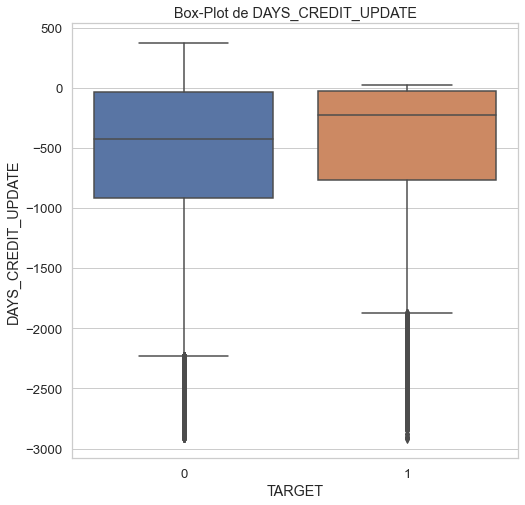

----------------------------------------------------------------------------------------------------


In [52]:
print_percentiles(bureau_merged, 'DAYS_CREDIT_UPDATE', percentiles = list(range(0,11,2)) + [25,50,75,100])
plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_UPDATE', plots = ['box'], figsize = (8,8), scale_limits = [-40000, 400])
print('-'*100)

##### Observations et Conclusions:

<ol>
<li>La tendance des valeurs erronées est similaire à celle des autres colonnes de jours, où cette valeur au 0e percentile semble être erronée. Comme seule cette valeur au 0e percentile est si étrange et que le reste semble être correct, nous allons certainement supprimer cette valeur.</li>
<li>D'après le box-plot, on peut dire que les personnes en défaut de paiement ont un nombre de jours écoulés depuis la réception des informations sur le crédit du Bureau de crédit inférieur à celui des personnes n'ayant pas défaut de paiement. Leur médiane, leurs valeurs du 75e percentile sont toutes inférieures à celles des personnes n'ayant pas défaut de paiement.</li>
</ol>

### bureau_balance.csv

##### Description

Cette table présente le solde mensuel de chaque crédit pour chacun des crédits précédents que le client avait avec des institutions financières autres que Home Credit.

<h4>Basic Stats</h4>

In [53]:
print(f'La forme de bureau_balance.csv est: {bureau_balance.shape}')
print('-'*100)
print(f'Nombre de valeurs dupliquées dans bureau_balance: {bureau_balance.shape[0] - bureau_balance.duplicated().shape[0]}')
print('-'*100)
display(bureau_balance.head(5))

La forme de bureau_balance.csv est: (27299925, 3)
----------------------------------------------------------------------------------------------------
Nombre de valeurs dupliquées dans bureau_balance: 0
----------------------------------------------------------------------------------------------------


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [55]:
print("-"*100)
print(f"Le nombre d'identifiants uniques SK_ID_BUREAU dans bureau_balance.csv est: {len(bureau_balance.SK_ID_BUREAU.unique())}")
print('-'*100)
print(f'Le nombre de valeurs uniques pour STATUS est: {len(bureau_balance.STATUS.unique())}')
print(f"Les valeurs uniques de STATUS sont:\n{bureau_balance.STATUS.unique()}")
print('-'*100)
print(f"Le nombre maximal de mois pour Months Balance: {np.abs(bureau_balance.MONTHS_BALANCE.min())}")
print('-'*100)

----------------------------------------------------------------------------------------------------
Le nombre d'identifiants uniques SK_ID_BUREAU dans bureau_balance.csv est: 817395
----------------------------------------------------------------------------------------------------
Le nombre de valeurs uniques pour STATUS est: 8
Les valeurs uniques de STATUS sont:
['C' '0' 'X' '1' '2' '3' '5' '4']
----------------------------------------------------------------------------------------------------
Le nombre maximal de mois pour Months Balance: 96
----------------------------------------------------------------------------------------------------


##### Observations et Conclusions

<ol>
    <li>La table bureau_balance.csv contient environ 27,29 millions de lignes et 3 colonnes.</li>
    <li>Cette table contient le statut mensuel de chaque prêt précédent pour un candidat spécifique rapporté par le département du Bureau de crédit.</li>
    <li>Il y a 8 valeurs uniques pour le statut qui sont encodées. Chacune d'entre elles a une signification particulière. <br>
        C signifie fermé, X signifie statut inconnu, 0 signifie aucun retard de paiement, 1 signifie retard maximal de paiement entre 1 et 30 jours, 2 signifie retard de paiement de 31 à 60 jours, ... 5 signifie retard de paiement de 120 jours ou plus, ou vendu, ou radié.</li>
    <li>Le solde du mois le plus ancien dont nous disposons est le statut remontant à 96 mois, c'est-à-dire que le statut a été fourni pour une historique de prêts sur une période de 8 ans pour ceux pour lesquels cela existe.</li>
</ol>

<h4>Valeurs manquantes</h4>

In [56]:
plot_nan_percent(nan_df_create(bureau_balance), 'bureau_balance')

Le DataFrame bureau_balance ne contient aucune valeur NaN.


### previous_application.csv

##### Description

Cette table contient les données statiques du prêt précédent que le client avait avec Home Credit.

#### Basic Stats

In [57]:
print(f'La forme de previous_application.csv est : {previous_application.shape}')
print('-'*100)
print(f"Le nombre d\'identifiants uniques SK_ID_PREV dans previous_application.csv est : {len(previous_application.SK_ID_PREV.unique())}")
print(f"Le nombre d\'identifiants uniques SK_ID_CURR dans previous_application.csv est : {len(previous_application.SK_ID_CURR.unique())}")
print('-'*100)
print(f"Le nombre d\'identifiants SK_ID_CURR qui se chevauchent entre application_train.csv et previous_application.csv est : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(previous_application.SK_ID_CURR.unique())))}")
print(f"Le nombre d\'identifiants SK_ID_CURR qui se chevauchent entre application_test.csv et previous_application.csv est : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(previous_application.SK_ID_CURR.unique())))}")
print('-'*100)
print(f'Le nombre de valeurs en double dans previous_application : {previous_application.shape[0] - previous_application.duplicated().shape[0]}')
print('-'*100)
display(previous_application.head(5))

La forme de previous_application.csv est : (1670214, 37)
----------------------------------------------------------------------------------------------------
Le nombre d'identifiants uniques SK_ID_PREV dans previous_application.csv est : 1670214
Le nombre d'identifiants uniques SK_ID_CURR dans previous_application.csv est : 338857
----------------------------------------------------------------------------------------------------
Le nombre d'identifiants SK_ID_CURR qui se chevauchent entre application_train.csv et previous_application.csv est : 291057
Le nombre d'identifiants SK_ID_CURR qui se chevauchent entre application_test.csv et previous_application.csv est : 47800
----------------------------------------------------------------------------------------------------
Le nombre de valeurs en double dans previous_application : 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Observations et Conclusions:

<ol>
    <li>La table previous_application.csv contient au total 1,67 million de lignes. Chaque ligne correspond à un prêt précédent que le client avait précédemment avec Home Credit Group. Il est possible qu'un seul client de la demande actuelle ait eu plusieurs prêts précédents avec Home Credit Group.</li>
    <li>Il y a 37 colonnes dans previous_application.csv, qui contiennent les détails sur le prêt précédent.</li>
    <li>Il y a 338 000 identifiants uniques SK_ID_CURR dans previous_application, dont 291 000 correspondent aux SK_ID_CURR de application_train et 47 800 correspondent aux SK_ID_CURR de application_test.</li>
</ol>

#### Valeurs manquantes

----------------------------------------------------------------------------------------------------
Nombre de colonnes contenant des valeurs NaN : 16 colonnes


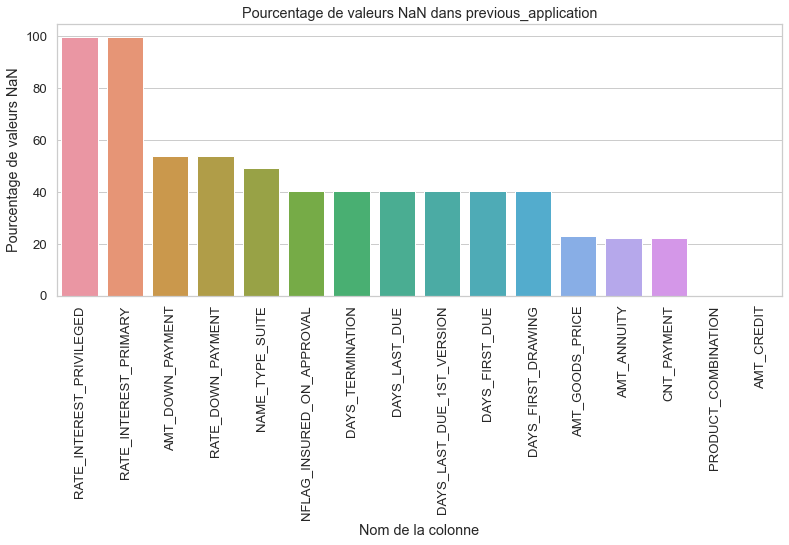

----------------------------------------------------------------------------------------------------


In [58]:
previous_application_nan = nan_df_create(previous_application)
print('-' * 100)
plot_nan_percent(previous_application_nan, 'previous_application', tight_layout = False, figsize = (13,5))
print('-' * 100)
del previous_application_nan

##### Observations et conclusions

<ol>
    <li>Il y a 16 colonnes sur les 37 colonnes qui contiennent des valeurs NaN.</li>
    <li>Deux de ces colonnes ont 99,64 % de valeurs manquantes, ce qui est très élevé, et nous devrons trouver une façon intelligente de gérer ces valeurs NaN élevées. Nous ne pouvons pas simplement supprimer directement une fonctionnalité à ce stade.</li>
    <li>Mis à part ces deux colonnes, toutes les autres colonnes contiennent également > 40 % de valeurs NaN, à l'exception de 5 colonnes.</li>
</ol>

<b>Concaténation de TARGETS avec application_train et previous_application table.</b>

In [59]:
print("-"*100)
print("Concaténation de TARGET avec la variable previous_application Table")
prev_merged = application_train.iloc[:,:2].merge(previous_application, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Concaténation de TARGET avec la variable previous_application Table
----------------------------------------------------------------------------------------------------


#### Phi-K Matrix

----------------------------------------------------------------------------------------------------


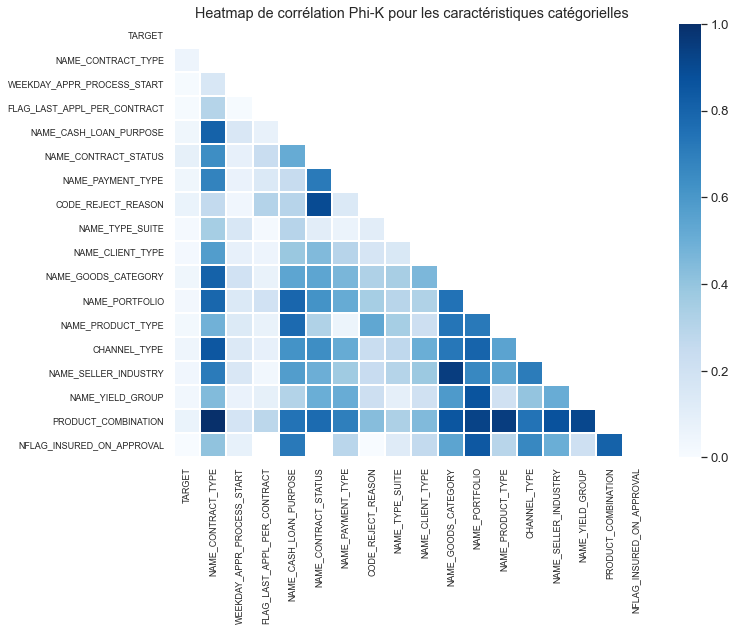

----------------------------------------------------------------------------------------------------
Catégories ayant les valeurs les plus élevées de corrélation Phi-K avec la variable cible :


,Nom de la colonne,Corrélation Phi-K
4,NAME_CONTRACT_STATUS,0.088266
15,PRODUCT_COMBINATION,0.063839
6,CODE_REJECT_REASON,0.062771
0,NAME_CONTRACT_TYPE,0.050859
12,CHANNEL_TYPE,0.050302
9,NAME_GOODS_CATEGORY,0.042951
3,NAME_CASH_LOAN_PURPOSE,0.040305
5,NAME_PAYMENT_TYPE,0.039752
13,NAME_SELLER_INDUSTRY,0.038077
14,NAME_YIELD_GROUP,0.034626


----------------------------------------------------------------------------------------------------


In [60]:
cols_for_phik = ['TARGET'] + prev_merged.dtypes[prev_merged.dtypes == 'object'].index.tolist() + ['NFLAG_INSURED_ON_APPROVAL']
plot_phik_matrix(prev_merged, cols_for_phik, cmap = 'Blues', figsize = (11,9), fontsize = 9)

##### Observations and Conclusions:

##### Observations et conclusions :

À partir de la heatmap ci-dessus des valeurs du coefficient Phi-K pour les caractéristiques catégorielles, nous observons que :

<ol>
    <li>La caractéristique PRODUCT_COMBINATION est associée à de nombreuses autres caractéristiques telles que NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO, etc.</li>
    <li>La caractéristique NAME_GOODS_CATEGORY est également fortement associée à NAME_SELLER_INDUSTRY.</li>
    <li>Si nous examinons l'association avec la variable cible (TARGET), nous constatons que les caractéristiques NAME_CONTRACT_STATUS, PRODUCT_COMBINATION, CODE_REJECT_REASON font partie des caractéristiques les plus associées et nécessiteraient des investigations supplémentaires.</li>
</ol>

#### Matrice de corrémation des features

----------------------------------------------------------------------------------------------------


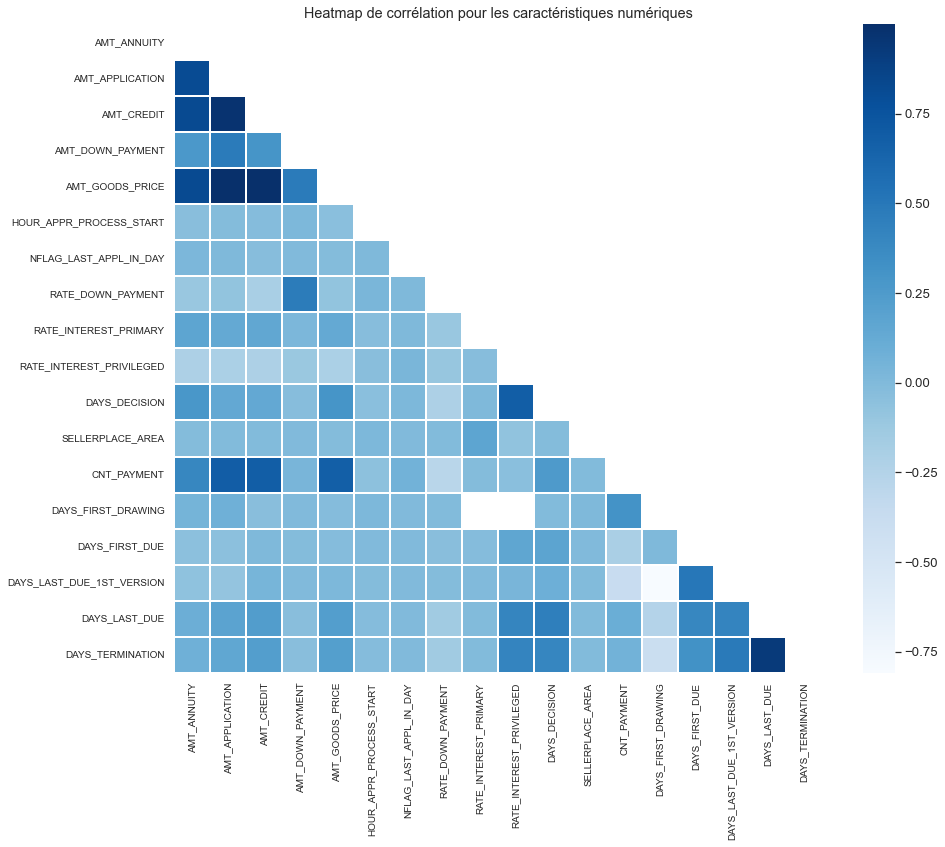

----------------------------------------------------------------------------------------------------


In [61]:
corr_mat = correlation_matrix(prev_merged, ['SK_ID_CURR','SK_ID_PREV','NFLAG_INSURED_ON_APPROVAL'], cmap = 'Blues', figsize = (14,12))
corr_mat.plot_correlation_matrix()

In [62]:
# Voir les principales colonnes ayant la plus forte corrélation Phik avec la variable cible dans la table previous_applications

top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec les valeurs les plus élevées de corrélation Phik avec la variable cible :")
display(top_corr_target_df)
print("-" * 100)

interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_APPLICATION']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_DOWN_PAYMENT']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'NFLAG_LAST_APPL_IN_DAY']
interval columns not set, guessing: ['TARGET', 'RATE_DOWN_PAYMENT']
interval columns not set, guessing: ['TARGET', 'RATE_INTEREST_PRIMARY']
interval columns not set, guessing: ['TARGET', 'RATE_INTEREST_PRIVILEGED']
interval columns not set, guessing: ['TARGET', 'DAYS_DECISION']
interval columns not set, guessing: ['TARGET', 'SELLERPLACE_AREA']
interval columns not set, guessing: ['TARGET', 'CNT_PAYMENT']
interval columns not set, guessing: ['TARGET', 'DAYS_FIRST_DRAWING']
interval columns not set, guessing: ['TARGET', 'DAYS_F

,Nom de la colonne,Phik-Corrélation
12,CNT_PAYMENT,0.056639
10,DAYS_DECISION,0.053694
13,DAYS_FIRST_DRAWING,0.048993
7,RATE_DOWN_PAYMENT,0.039592
5,HOUR_APPR_PROCESS_START,0.038121
9,RATE_INTEREST_PRIVILEGED,0.028204
15,DAYS_LAST_DUE_1ST_VERSION,0.027878
16,DAYS_LAST_DUE,0.027320
17,DAYS_TERMINATION,0.026479
0,AMT_ANNUITY,0.013808


----------------------------------------------------------------------------------------------------


##### Observations et conclusions :

<ol>
    <li>La heatmap ci-dessus montre la corrélation entre chaque caractéristique de la table previous_application avec les autres caractéristiques.</li>
    <li>À partir de la heatmap, nous pouvons voir certaines caractéristiques fortement corrélées qui ont une couleur plus sombre.</li>
    <li>La corrélation élevée est particulièrement observée pour les caractéristiques :
        <ol><li>DAYS_TERMINATION et DAYS_LAST_DUE</li>
            <li>AMT_CREDIT et AMT_APPLICATION</li>
            <li>AMT_APPLICATION et AMT_GOODS_PRICE</li>
            <li>AMT_CREDIT et AMT_ANNUITY</li>
            <li>AMT_ANNUITY et AMT_CREDIT</li>
            <li>AMT_CREDIT et AMT_GOODS_PRICE</li></ol></li>
    <li>Nous pouvons également constater que les caractéristiques ne montrent pas particulièrement une bonne/corrélation élevée avec la variable cible. Cela implique qu'il n'y a pas vraiment de relation linéaire directe entre la variable cible et les caractéristiques.</li>
</ol>

#### Tracé des variables catégorielles

Tracions maintenant certaines des variables catégorielles de la table previous_application et voyons comment elles impactent la variable cible.

<b><u>Distribution de la Variable NAME_CONTRACT_TYPE</u></b>

Cette colonne décrit le type de contrat du prêt précédent avec le groupe Home Credit.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'NAME_CONTRACT_TYPE' sont :
['Consumer loans' 'Cash loans' 'Revolving loans' nan 'XNA']
----------------------------------------------------------------------------------------------------
Les comptes de chaque catégorie sont :
Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de NAME_CONTRACT_TYPE = 5


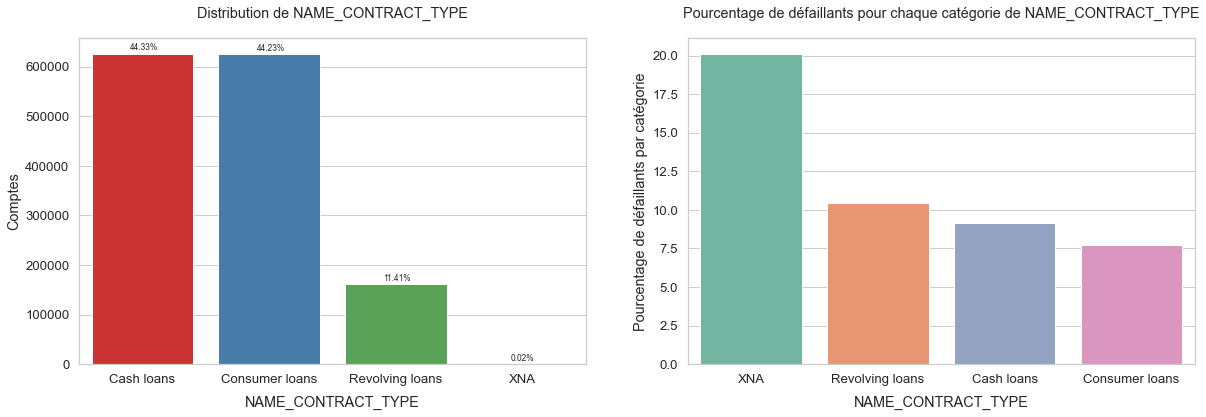

----------------------------------------------------------------------------------------------------


In [63]:
# Voyons d'abord les catégories uniques de 'NAME_CONTRACT_TYPE'
print_unique_categories(prev_merged, 'NAME_CONTRACT_TYPE', show_counts=True)

# Tracer le diagramme en barres pour la colonne
plot_categorical_variables_bar(prev_merged, 'NAME_CONTRACT_TYPE', horizontal_adjust=0.3, figsize=(20, 6))
print('-'*100)

##### Observations et conclusions :

À partir des graphiques ci-dessus, nous pouvons observer ce qui suit :
<ol>
    <li>D'après le premier sous-graphique, nous constatons que la plupart des prêts précédents ont été des prêts en espèces (Cash Loans) ou des prêts à la consommation (Consumer Loans), qui représentent environ 44 % des prêts chacun. Les 11,41 % restants correspondent à des prêts rotatifs (Revolving Loans), et il existe quelques prêts nommés XNA dont les types ne sont en réalité pas connus, mais ils sont très peu nombreux.</li>
    <li>En examinant le deuxième sous-graphique, nous constatons que le pourcentage de défauts pour le type de prêt XNA est le plus élevé, à un taux de défaut de 20 %. Le taux de défaut suivant le plus élevé concerne les prêts rotatifs, qui s'approche de 10,5 %.</li>
    <li>Les prêts en espèces ont des taux de défaut inférieurs, environ 9 %, tandis que les prêts à la consommation ont tendance à avoir le taux de défaut le plus bas, proche de 7,5 %.</li>
</ol>

<b><u>Distribution de la variable catégorielle NAME_CONTRACT_STATUS</u></b>

Cette colonne décrit l'état du contrat du prêt précédent avec Home Credit, c'est-à-dire s'il est actif, fermé, etc.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'NAME_CONTRACT_STATUS' sont :
['Approved' 'Canceled' 'Refused' nan 'Unused offer']
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de NAME_CONTRACT_STATUS = 5


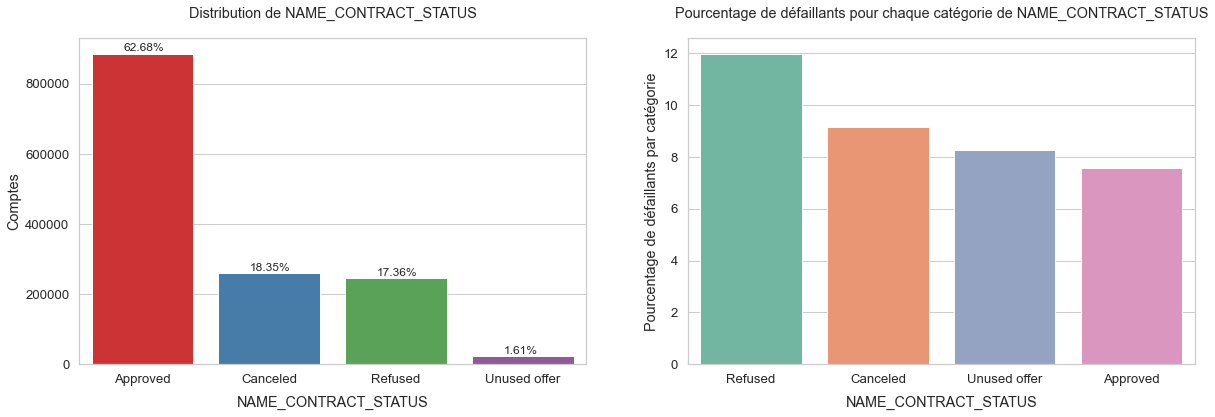

----------------------------------------------------------------------------------------------------


In [64]:
# Voyons d'abord les catégories uniques de 'NAME_CONTRACT_STATUS'
print_unique_categories(prev_merged, 'NAME_CONTRACT_STATUS')

# Tracer le diagramme en barres pour la colonne
plot_categorical_variables_bar(prev_merged, 'NAME_CONTRACT_STATUS', horizontal_adjust=0.25, figsize=(20, 6), fontsize_percent='small')
print('-'*100)

##### Observations et conclusions :

À partir des graphiques ci-dessus, nous constatons que :
<ol>
    <li>Le type d'état de contrat le plus courant est l'état Approuvé (Approved). Environ 63 % des prêts précédents ont un état Approuvé. Les deux états suivants les plus courants sont Annulé (Canceled) et Refusé (Refused), qui correspondent tous deux à environ 18 % des prêts. Cela implique que la plupart des prêts sont approuvés et qu'une seule fraction d'entre eux ne l'est pas. Le type d'état de contrat le moins fréquent est l'Offre inutilisée (Unused Offer), qui correspond à seulement 1,61 % de tous les prêts.</li>
    <li>En examinant le deuxième sous-graphique pour le pourcentage de défauts, nous constatons que les prêts qui ont précédemment été refusés ont tendance à avoir le plus grand nombre de défauts dans les prêts actuels. Ils représentent environ 12 % des défauts de cette catégorie. Ils sont suivis par les prêts annulés, qui correspondent à près de 9 % de taux de défaut. Ce comportement est assez logique, car ces personnes ont probablement été refusées en raison d'un profil inadéquat. Le taux de défaut le plus faible est observé pour les contrats approuvés (Approved).</li>
</ol>

<b><u>Distribution de la variable catégorielle CODE_REJECT_REASON</u></b>

Cette colonne décrit la raison du rejet du prêt précédemment demandé chez Home Credit Group.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'CODE_REJECT_REASON' sont :
['XAP' 'LIMIT' nan 'HC' 'SCO' 'SCOFR' 'VERIF' 'CLIENT' 'XNA' 'SYSTEM']
----------------------------------------------------------------------------------------------------
Les comptes de chaque catégorie sont :
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de CODE_REJECT_REASON = 10


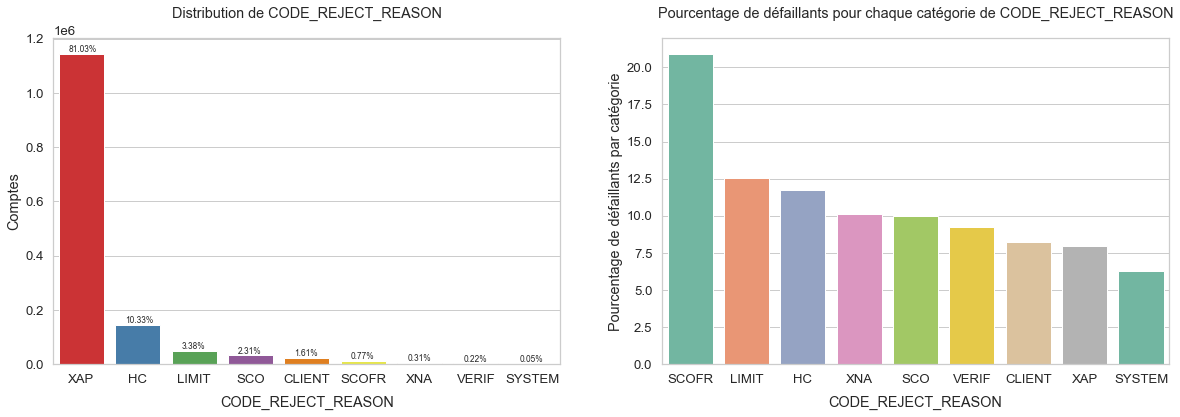

----------------------------------------------------------------------------------------------------


In [65]:
# Voyons d'abord les catégories uniques de 'CODE_REJECT_REASON'
print_unique_categories(prev_merged, 'CODE_REJECT_REASON', show_counts=True)

# Tracer le diagramme en barres pour la colonne
plot_categorical_variables_bar(prev_merged, 'CODE_REJECT_REASON', horizontal_adjust=0.18, figsize=(20, 6))
print('-'*100)

##### Observations et conclusions :

Le graphique ci-dessus montre la distribution de la variable catégorielle CODE_REJECT_REASON. Les observations suivantes peuvent être tirées du graphique :
<ol>
    <li>Le type le plus courant de motif de rejet est XAP, qui représente environ 81 % des cas. Les autres motifs ne représentent qu'une petite partie des motifs de rejet. HC est le deuxième motif de rejet le plus courant, avec seulement 10,33 % des occurrences.</li>
    <li>La distribution du pourcentage de défaillants pour chaque catégorie de CODE_REJECT_REASON est assez intéressante. Les demandeurs dont les demandes précédentes ont été rejetées pour le code SCOFT ont le pourcentage le plus élevé de défaillants parmi eux (environ 21 %). Ils sont suivis par LIMIT et HC, qui ont environ 12,5 % et 12 % de défaillants.</li>
    <li>Le motif de rejet le plus courant, XAP, ne représente que 7,5 % de tous les défaillants, et c'est le deuxième pourcentage le plus bas de défaillants après le code SYSTEM.</li>
</ol>

<b><u>Distribution de la variable catégorielle CHANNEL_TYPE</u></b>

Cette colonne décrit le canal par lequel le client a été acquis pour le prêt précédent chez Home Credit.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'CHANNEL_TYPE' sont :
['Stone' 'Credit and cash offices' 'Country-wide' 'Regional / Local'
 'AP+ (Cash loan)' 'Contact center' nan 'Channel of corporate sales'
 'Car dealer']
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de CHANNEL_TYPE = 9


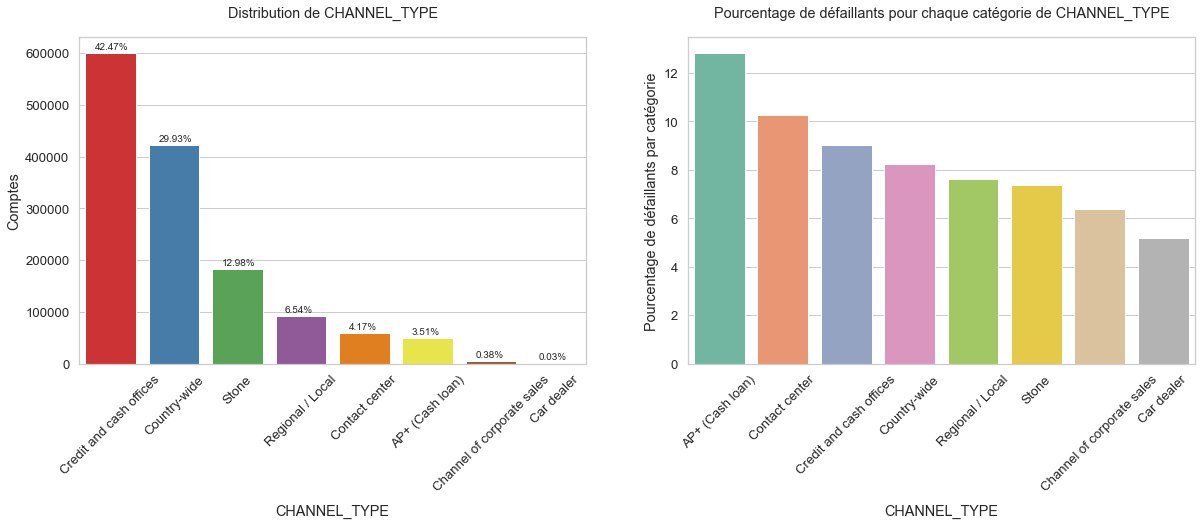

----------------------------------------------------------------------------------------------------


In [66]:
# Voyons d'abord les catégories uniques de 'CHANNEL_TYPE'
print_unique_categories(prev_merged, 'CHANNEL_TYPE')

# Tracer le diagramme en barres pour la colonne
plot_categorical_variables_bar(prev_merged, 'CHANNEL_TYPE', horizontal_adjust=0.15, rotation=45, figsize=(20, 6), fontsize_percent='x-small')
print('-'*100)

##### Observations et conclusions :

Les deux graphiques ci-dessus montrent la distribution de CHANNEL_TYPE pour les prêts précédents chez Home Credit.
<ol>
    <li>D'après le premier sous-graphique, nous constatons que la plupart des demandes ont été acquises par le biais des bureaux de crédit et de trésorerie, ce qui représente environ 42,47 % des demandes, suivies du canal national correspondant à 29,93 % des demandes. Les autres types de canaux correspondent à un nombre limité de demandes.</li>
    <li>Le pourcentage le plus élevé de défaillants a été observé parmi les demandes dont le type de canal était AP+ (prêt en espèces), ce qui correspondait à environ 13 % de défaillants dans cette catégorie. Les autres canaux avaient des pourcentages de défaillance inférieurs à celui-ci. Le canal Car Dealer a montré le plus faible pourcentage de défaillants dans cette catégorie (seulement 5 %).</li>
</ol>

<b><u>Distribution de la variable catégorielle PRODUCT_COMBINATION</u></b>

Cette colonne donne des détails sur la combinaison de produits des demandes précédentes.

----------------------------------------------------------------------------------------------------
Les catégories uniques de 'PRODUCT_COMBINATION' sont :
['POS other with interest' 'Cash X-Sell: low' 'POS industry with interest'
 'POS household with interest' 'POS mobile without interest' 'Card Street'
 'Card X-Sell' 'Cash X-Sell: high' 'Cash' 'Cash Street: high'
 'Cash X-Sell: middle' 'POS mobile with interest'
 'POS household without interest' 'POS industry without interest'
 'Cash Street: low' nan 'Cash Street: middle'
 'POS others without interest']
----------------------------------------------------------------------------------------------------
Nombre total de catégories uniques de PRODUCT_COMBINATION = 18


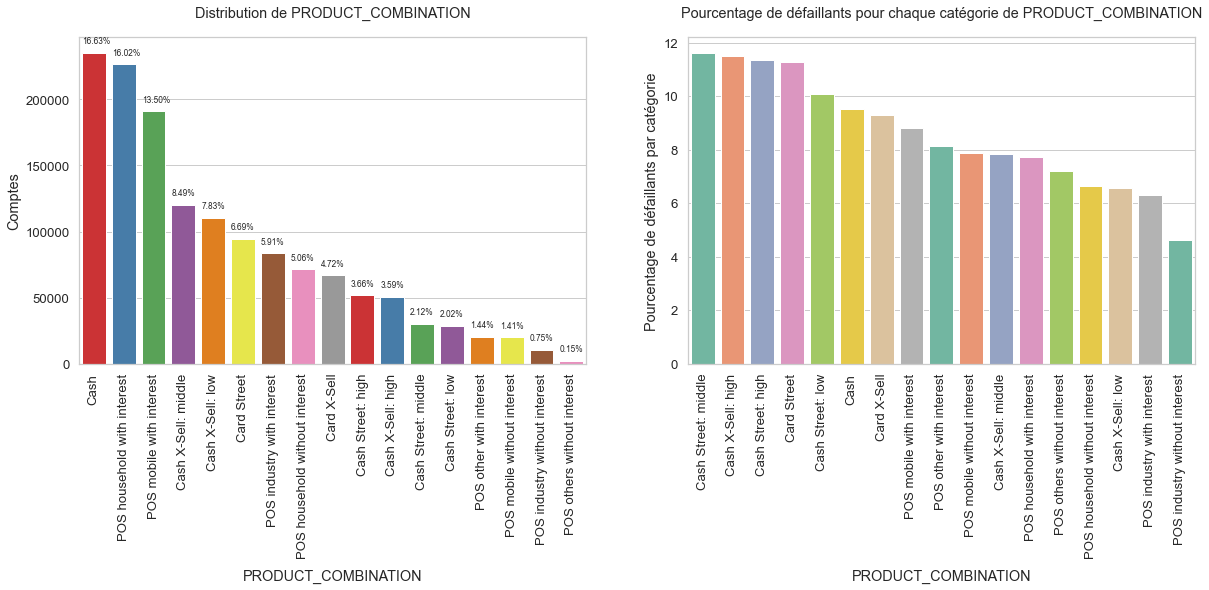

----------------------------------------------------------------------------------------------------


In [67]:
# Voyons d'abord les catégories uniques de 'PRODUCT_COMBINATION'
print_unique_categories(prev_merged, 'PRODUCT_COMBINATION')

# Tracer le diagramme en barres pour la colonne
plot_categorical_variables_bar(prev_merged, 'PRODUCT_COMBINATION', rotation=90, figsize=(20, 6))
print('-'*100)

##### Observations et conclusions

D'après la distribution de PRODUCT_COMBINATION, nous pouvons tirer les conclusions suivantes :
<ol>
<li>Les trois types les plus courants de combinaison de produits sont le paiement en espèces, les articles ménagers en point de vente avec intérêt et les téléphones portables en point de vente avec intérêt. Ils représentent environ 50% de toutes les demandes.</li>
<li>En examinant le graphique du pourcentage de défaillants par catégorie, nous constatons une tendance plus élevée à la défaillance parmi les catégories Cash Street: mobile, Cash X-sell: high, Cash Street: high et Card Street, qui ont toutes un taux de défaillance d'environ 11-11,5% par catégorie. Le taux de défaillance le plus bas se trouve dans la catégorie POS Industry sans intérêt, qui représente environ 4,5% de défaillants.</li>
</ol>

#### Plot des Variables continues

<u><b>Distribution de Variable avec DAYS Features</b></u>

<b>DAYS_DECISION</b>

Cette colonne indique le nombre de jours écoulés par rapport à la demande actuelle lorsque la décision a été prise concernant la demande précédente.

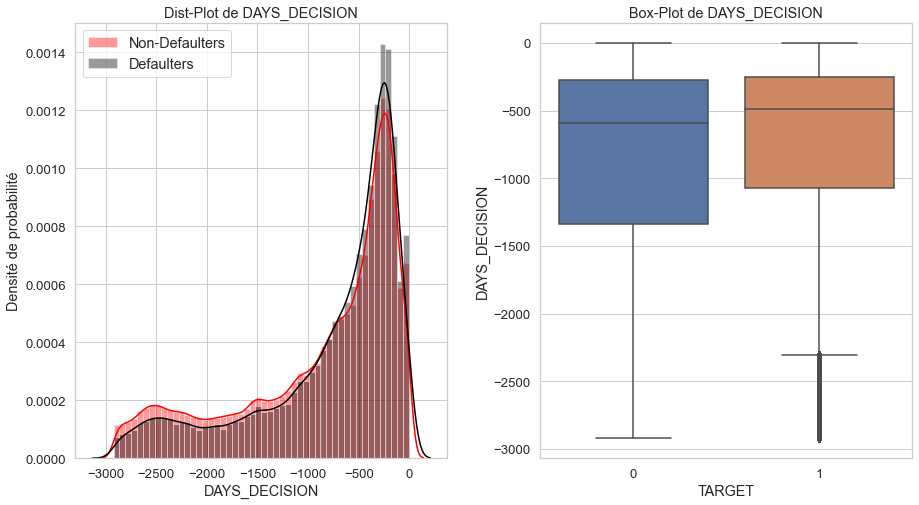

In [68]:
plot_continuous_variables(prev_merged, 'DAYS_DECISION', plots = ['distplot', 'box'], figsize = (15,8))

##### Observations and Conclusions

##### Observations et conclusions

À partir du graphique ci-dessus, nous constatons que pour les défaillants, le nombre de jours écoulés depuis la prise de décision est légèrement inférieur à celui des non-défaillants. Cela implique que les défaillants ont généralement eu la décision concernant leurs demandes précédentes plus récemment que les non-défaillants.

<b>DAYS_FIRST_DRAWING</b>

Cette colonne indique le nombre de jours écoulés depuis la demande actuelle jusqu'à la première mise à disposition de fonds de la demande précédente.

----------------------------------------------------------------------------------------------------
La valeur du 0e percentile de DAYS_FIRST_DRAWING est -2922.0
La valeur du 1e percentile de DAYS_FIRST_DRAWING est -2451.0
La valeur du 2e percentile de DAYS_FIRST_DRAWING est -1179.0
La valeur du 3e percentile de DAYS_FIRST_DRAWING est -674.0
La valeur du 4e percentile de DAYS_FIRST_DRAWING est -406.0
La valeur du 5e percentile de DAYS_FIRST_DRAWING est -262.0
La valeur du 6e percentile de DAYS_FIRST_DRAWING est -156.0
La valeur du 7e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 8e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 9e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 10e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 20e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 40e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 60e percentile de DAYS_FIRST_DRAWING est 365243.0
La valeur du 80e percentile de DAYS_FI

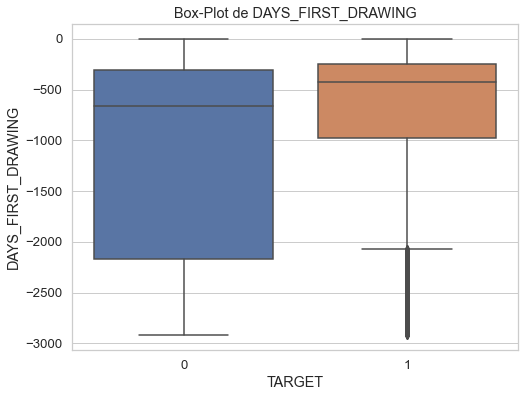

----------------------------------------------------------------------------------------------------


In [69]:
print_percentiles(prev_merged, 'DAYS_FIRST_DRAWING', percentiles = list(range(0,11)) + list(range(20,101,20)))
plot_continuous_variables(prev_merged, 'DAYS_FIRST_DRAWING', plots = ['box'], figsize = (8,6), scale_limits = [-3000,0])
print('-'*100)

##### Observations et conclusions :

<ol>
<li>En examinant les valeurs percentiles de DAYS_FIRST_DRAWING, il semble que la plupart des valeurs soient erronées, à partir du 7e percentile. Ces valeurs erronées devront être supprimées.</li>
<li>Si nous essayons d'analyser la distribution de cette colonne en supprimant les valeurs erronées, nous constatons que la plupart des défaillants ont effectué leur premier retrait sur un prêt antérieur plus récemment que les non-défaillants. La valeur du 75e percentile des défaillants est également significativement inférieure à celle des non-défaillants.</li>
</ol>

<b>DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, and DAYS_TERMINATION</b>

Ces colonnes décrivent également le nombre de jours écoulés depuis la dernière application lors desquels certaines activités se sont produites.

In [70]:
print('-'*100)
print("Valeurs percentiles pour DAYS_FIRST_DUE")
print_percentiles(prev_merged, 'DAYS_FIRST_DUE', percentiles = list(range(0,11,2)) + [20,40,60,80,100])
print("Valeurs percentiles pour DAYS_LAST_DUE_1ST_VERSION")
print_percentiles(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION', percentiles = list(range(0,11,2)) + [20,40,60,80,100])
print("Valeurs percentiles pour DAYS_LAST_DUE")
print_percentiles(prev_merged, 'DAYS_LAST_DUE', percentiles = list(range(0,11,2)) + [20,40,60,80,100])
print("Valeurs percentiles pour DAYS_TERMINATION")
print_percentiles(prev_merged, 'DAYS_TERMINATION', percentiles = list(range(0,11,2)) + [20,40,60,80,100])

----------------------------------------------------------------------------------------------------
Valeurs percentiles pour DAYS_FIRST_DUE
----------------------------------------------------------------------------------------------------
La valeur du 0e percentile de DAYS_FIRST_DUE est -2892.0
La valeur du 2e percentile de DAYS_FIRST_DUE est -2759.0
La valeur du 4e percentile de DAYS_FIRST_DUE est -2648.0
La valeur du 6e percentile de DAYS_FIRST_DUE est -2555.0
La valeur du 8e percentile de DAYS_FIRST_DUE est -2471.0
La valeur du 10e percentile de DAYS_FIRST_DUE est -2388.0
La valeur du 20e percentile de DAYS_FIRST_DUE est -1882.0
La valeur du 40e percentile de DAYS_FIRST_DUE est -1070.0
La valeur du 60e percentile de DAYS_FIRST_DUE est -647.0
La valeur du 80e percentile de DAYS_FIRST_DUE est -329.0
La valeur du 100e percentile de DAYS_FIRST_DUE est 365243.0
----------------------------------------------------------------------------------------------------
Valeurs percentiles pour

##### Observations et conclusions

À partir de toutes les valeurs percentiles mentionnées ci-dessus, nous réalisons que toutes les colonnes de jours contiennent ces valeurs erronées à un moment donné. Par conséquent, il est nécessaire de remplacer ces valeurs afin que notre modèle ne soit pas affecté par celles-ci.

### installments_payments.csv

##### Description

Ce tableau répertorie l'historique de remboursement de chaque prêt que le demandeur a contracté auprès du groupe Home Credit. Le tableau contient des caractéristiques telles que le montant de l'échéance, le montant que le client a payé pour chaque échéance, etc.

<h4>Stats</h4>

In [71]:
print(f'La forme de installments_payments.csv est : {installments_payments.shape}')
print('-'*100)
print(f'Le nombre unique de SK_ID_PREV dans installments_payments.csv est : {len(installments_payments.SK_ID_PREV.unique())}')
print(f'Le nombre unique de SK_ID_CURR dans installments_payments.csv est : {len(installments_payments.SK_ID_CURR.unique())}')
print('-'*100)
print(f'Le nombre de SK_ID_CURR en commun entre application_train.csv et installments_payments.csv est : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(installments_payments.SK_ID_CURR.unique())))}')
print(f'Le nombre de SK_ID_CURR en commun entre application_test.csv et installments_payments.csv est : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(installments_payments.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Le nombre de valeurs en double dans installments_payments : {installments_payments.shape[0] - installments_payments.duplicated().shape[0]}')
print('-'*100)
display(installments_payments.head(5))

La forme de installments_payments.csv est : (13605401, 8)
----------------------------------------------------------------------------------------------------
Le nombre unique de SK_ID_PREV dans installments_payments.csv est : 997752
Le nombre unique de SK_ID_CURR dans installments_payments.csv est : 339587
----------------------------------------------------------------------------------------------------
Le nombre de SK_ID_CURR en commun entre application_train.csv et installments_payments.csv est : 291643
Le nombre de SK_ID_CURR en commun entre application_test.csv et installments_payments.csv est : 47944
----------------------------------------------------------------------------------------------------
Le nombre de valeurs en double dans installments_payments : 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


##### Observations et conclusions

1. Il y a environ 13,6 millions de points de données dans le tableau installments_payments.csv. Chaque ligne représente l'historique des versements liés à un prêt spécifique que le client a précédemment contracté avec Home Credit Group.
2. Il y a 997 000 prêts précédents uniques dans les installments_payments. Ceux-ci appartiennent à 339 000 SK_ID_CURR uniques, qui sont les identifiants des demandeurs du prêt actuel.
3. Parmi ces 339 000 SK_ID_CURR, 291 000 appartiennent à l'ensemble de données d'entraînement et 47 900 appartiennent à l'ensemble de données de test. Cela implique que sur les 307 000 SK_ID_CURR uniques de l'ensemble de données d'entraînement, 291 000 avaient précédemment un prêt avec Home Credit. De même, sur les 48 700 demandeurs du prêt de l'ensemble de données de test, 47 900 avaient précédemment un prêt avec Home Credit.
4. Le tableau comporte 8 caractéristiques uniques, dont 6 décrivent les statistiques de chaque versement pour un prêt précédent.

#### Valeurs manquantes

In [72]:
print('-'*100)
print("Colonnes avec des valeurs NaN et leurs pourcentages :")
installments_payments_nan = nan_df_create(installments_payments)
display(installments_payments_nan[installments_payments_nan.percent != 0])
print('-'*100)
del installments_payments_nan

----------------------------------------------------------------------------------------------------
Colonnes avec des valeurs NaN et leurs pourcentages :


,column,percent
5,DAYS_ENTRY_PAYMENT,0.021352
7,AMT_PAYMENT,0.021352


----------------------------------------------------------------------------------------------------


##### Observations et conclusions

1. Il n'y a que 2 colonnes qui contiennent des valeurs NaN sur les 8 colonnes de installments_payments.
2. Ces colonnes contiennent également une proportion très faible de valeurs NaN, soit seulement 0,02 %, ce qui n'est pas très préoccupant.

<b>Fusion de la colonne TARGET  partir de application_train à installments_payments table.</b>

In [73]:
print("-"*100)
print("Fusion de la colonne TARGET avec la table installments_payments")
installments_merged = application_train.iloc[:,:2].merge(installments_payments, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion de la colonne TARGET avec la table installments_payments
----------------------------------------------------------------------------------------------------


#### Matrice de corrélation des features

----------------------------------------------------------------------------------------------------


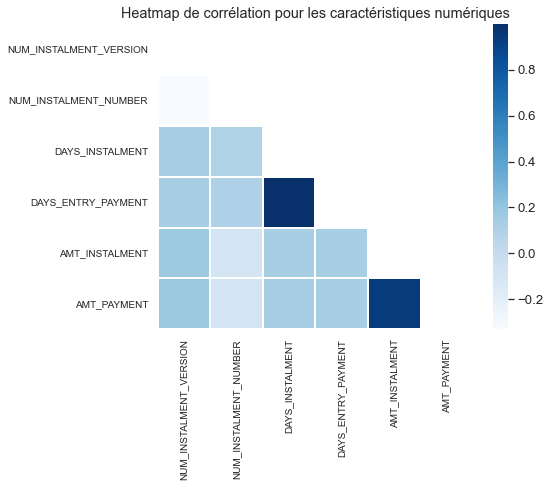

----------------------------------------------------------------------------------------------------


In [74]:
corr_mat = correlation_matrix(installments_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (8,7))
corr_mat.plot_correlation_matrix()

In [75]:
# Affichage des colonnes principales avec la corrélation phik la plus élevée avec la variable cible dans la table installments_payments
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec les valeurs les plus élevées de corrélation phik avec la variable cible :")
display(top_corr_target_df)
print("-" * 100)

interval columns not set, guessing: ['TARGET', 'NUM_INSTALMENT_VERSION']
interval columns not set, guessing: ['TARGET', 'NUM_INSTALMENT_NUMBER']
interval columns not set, guessing: ['TARGET', 'DAYS_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'DAYS_ENTRY_PAYMENT']
interval columns not set, guessing: ['TARGET', 'AMT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT']
----------------------------------------------------------------------------------------------------
Colonnes avec les valeurs les plus élevées de corrélation phik avec la variable cible :


,Nom de la colonne,Phik-Corrélation
2,DAYS_INSTALMENT,0.046824
3,DAYS_ENTRY_PAYMENT,0.033128
1,NUM_INSTALMENT_NUMBER,0.022993
4,AMT_INSTALMENT,0.004125
5,AMT_PAYMENT,0.003084
0,NUM_INSTALMENT_VERSION,0.002198


----------------------------------------------------------------------------------------------------


##### Observations et conclusions :

1. La heatmap ci-dessus montre la corrélation entre chaque caractéristique de la table installments_payments et les autres caractéristiques.
2. À partir de la heatmap de la matrice de corrélation, nous observons quelques caractéristiques fortement corrélées. Il s'agit de :
   - AMT_INSTALMENT et AMT_PAYMENT
   - DAYS_INSTALMENT et DAYS_ENTRY_PAYMENT
3. Ces deux ensembles de caractéristiques corrélées sont compréhensibles, car ils représentent respectivement la date d'échéance de l'installation par rapport à la date de paiement, ainsi que le montant dû par rapport au montant réellement payé.
4. Ces caractéristiques seront utiles pour créer de nouveaux ensembles de caractéristiques totalement non corrélées.
5. La corrélation des caractéristiques avec la variable cible n'est pas remarquable, ce qui indique l'absence de relation linéaire entre la caractéristique et la variable cible.

#### Tracé des variables continues
Tout d'abord, nous regrouperons les données en fonction du champ 'SK_ID_PREV' et les agrégerons par la moyenne, de sorte que nous obtenions une ligne moyenne pour chaque prêt précédent que le client a eu.

In [76]:
installments_merged = installments_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution de la variable continue DAYS_INSTALMENT</u></b>

Cette colonne répertorie les jours auxquels les échéances du crédit précédent devaient être payées.

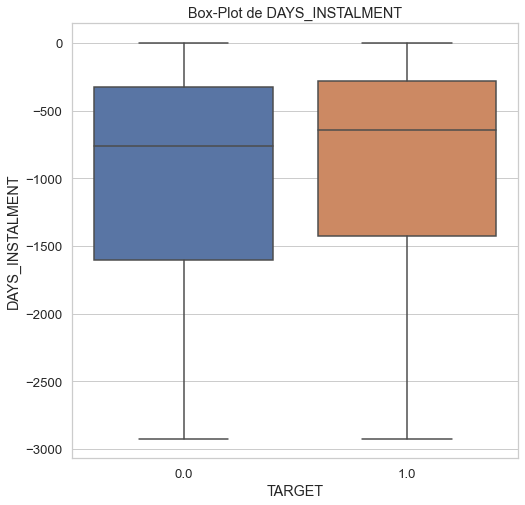

In [77]:
plot_continuous_variables(installments_merged, 'DAYS_INSTALMENT', plots = ['box'], figsize = (8,8))

<b><u>Distribution de la variable continue DAYS_ENTRY_PAYMENT</u></b>

Cette colonne répertorie les jours auxquels les échéances du crédit précédent ont effectivement été payées.

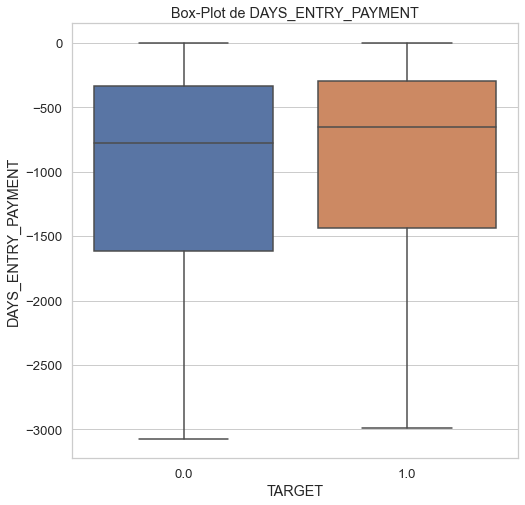

In [78]:
plot_continuous_variables(installments_merged, 'DAYS_ENTRY_PAYMENT', plots = ['box'], figsize = (8,8))
del installments_merged

##### Observations et conclusions

À partir des deux graphiques ci-dessus, nous pouvons observer un schéma similaire : les débiteurs ont tendance à avoir un nombre de jours écoulés depuis leur dernier paiement moins élevé, tandis que les non-débiteurs ont un nombre de jours écoulés depuis leur dernier paiement plus élevé. Tous les quantiles des débiteurs ont des jours plus récents que ceux des non-débiteurs. Ainsi, les non-débiteurs ont généralement un écart plus important entre leurs paiements depuis la date de la demande par rapport aux débiteurs.

### POS_CASH_balance.csv

##### Description

Cette table contient les instantanés mensuels des soldes des prêts antérieurs contractés par le demandeur auprès du groupe Home Credit, que ce soit pour des points de vente ou des prêts en espèces. La table comprend des colonnes telles que l'état du contrat, le nombre d'échéances restantes, etc.

#### Stats

In [79]:

# Affichage de la forme du fichier POS_CASH_balance.csv
print(f'La forme du fichier POS_CASH_balance.csv est : {POS_CASH_balance.shape}')
print('-'*100)

# Affichage du nombre d'identifiants SK_ID_PREV uniques dans POS_CASH_balance.csv
print(f'Le nombre d\'identifiants SK_ID_PREV uniques dans POS_CASH_balance.csv est : {len(POS_CASH_balance.SK_ID_PREV.unique())}')

# Affichage du nombre d'identifiants SK_ID_CURR uniques dans POS_CASH_balance.csv
print(f'Le nombre d\'identifiants SK_ID_CURR uniques dans POS_CASH_balance.csv est : {len(POS_CASH_balance.SK_ID_CURR.unique())}')

print('-'*100)

# Affichage du nombre d'identifiants SK_ID_CURR communs entre application_train.csv et POS_CASH_balance.csv
print(f'Le nombre d\'identifiants SK_ID_CURR communs entre application_train.csv et POS_CASH_balance.csv est : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(POS_CASH_balance.SK_ID_CURR.unique())))}')

# Affichage du nombre d'identifiants SK_ID_CURR communs entre application_test.csv et POS_CASH_balance.csv
print(f'Le nombre d\'identifiants SK_ID_CURR communs entre application_test.csv et POS_CASH_balance.csv est : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(POS_CASH_balance.SK_ID_CURR.unique())))}')

print('-'*100)

# Affichage du nombre de valeurs en double dans POS_CASH_balance
print(f'Le nombre de valeurs en double dans POS_CASH_balance est : {POS_CASH_balance.shape[0] - POS_CASH_balance.duplicated().shape[0]}')

print('-'*100)

# Affichage des premières lignes de POS_CASH_balance
display(POS_CASH_balance.head())

La forme du fichier POS_CASH_balance.csv est : (10001358, 8)
----------------------------------------------------------------------------------------------------
Le nombre d'identifiants SK_ID_PREV uniques dans POS_CASH_balance.csv est : 936325
Le nombre d'identifiants SK_ID_CURR uniques dans POS_CASH_balance.csv est : 337252
----------------------------------------------------------------------------------------------------
Le nombre d'identifiants SK_ID_CURR communs entre application_train.csv et POS_CASH_balance.csv est : 289444
Le nombre d'identifiants SK_ID_CURR communs entre application_test.csv et POS_CASH_balance.csv est : 47808
----------------------------------------------------------------------------------------------------
Le nombre de valeurs en double dans POS_CASH_balance est : 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


##### Observations et conclusions

1. Cette table contient environ 10 millions de points de données, où chaque ligne correspond à l'instantané mensuel de l'état du prêt précédent (POS et prêt en espèces) que le client avait avec Home Credit Group. Elle comprend 8 colonnes, dont deux sont SK_ID_CURR et SK_ID_PREV.

2. Il y a 936 000 identifiants uniques de prêts précédents dans la table, correspondant à 337 000 demandeurs actuels uniques (SK_ID_CURR).

3. Sur ces 337 000 SK_ID_CURR, 289 000 appartiennent à l'ensemble d'entraînement (training set) et 47 800 appartiennent à l'ensemble de test (test set).

#### Valeurs manquantes

In [80]:
print('-'*100)
print("Colonnes avec des valeurs NaN et leurs pourcentages :")
POS_CASH_nan = nan_df_create(POS_CASH_balance)
display(POS_CASH_nan[POS_CASH_nan.percent != 0])
print('-'*100)
del POS_CASH_nan

----------------------------------------------------------------------------------------------------
Colonnes avec des valeurs NaN et leurs pourcentages :


,column,percent
4,CNT_INSTALMENT_FUTURE,0.260835
3,CNT_INSTALMENT,0.260675


----------------------------------------------------------------------------------------------------


##### Observations et conclusions

1. Il n'y a que 2 colonnes qui contiennent des valeurs NaN parmi les 8 colonnes de POS_CASH_balance. Ces colonnes sont le nombre d'échéances restantes et la durée du prêt.

2. Ces colonnes contiennent également une proportion très minime de valeurs NaN, soit seulement 0,26 %, ce qui n'est donc pas une grande préoccupation.

<b>Fusion de la colonne TARGETS à POS_CASH_balance.</b>

In [81]:
print("-"*100)
print("Fusion de la variable TARGET avec la table POS_CASH_balance")
pos_cash_merged = application_train.iloc[:,:2].merge(POS_CASH_balance, on='SK_ID_CURR', how='left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion de la variable TARGET avec la table POS_CASH_balance
----------------------------------------------------------------------------------------------------


#### Matrice de corrélations

----------------------------------------------------------------------------------------------------


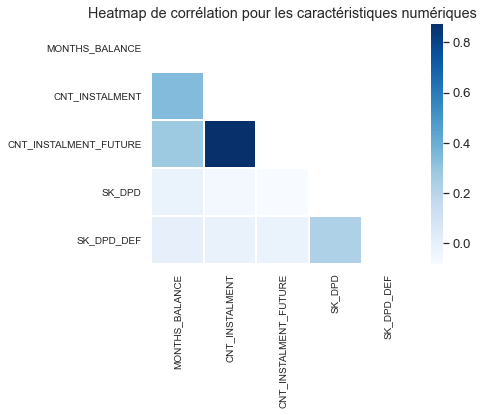

----------------------------------------------------------------------------------------------------


In [82]:
corr_mat = correlation_matrix(pos_cash_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (7,6))
corr_mat.plot_correlation_matrix()

In [83]:
# Affichage des colonnes les plus corrélées à la variable cible dans la table POS_CASH_balance
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec les valeurs les plus élevées de corrélation Phik avec la variable cible :")
display(top_corr_target_df)
print("-" * 100)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT_FUTURE']
interval columns not set, guessing: ['TARGET', 'SK_DPD']
interval columns not set, guessing: ['TARGET', 'SK_DPD_DEF']
----------------------------------------------------------------------------------------------------
Colonnes avec les valeurs les plus élevées de corrélation Phik avec la variable cible :


,Nom de la colonne,Phik-Corrélation
2,CNT_INSTALMENT_FUTURE,0.033194
1,CNT_INSTALMENT,0.030947
0,MONTHS_BALANCE,0.027391
3,SK_DPD,0.012773
4,SK_DPD_DEF,0.010539


----------------------------------------------------------------------------------------------------


##### Observations et conclusions :

1. La carte thermique ci-dessus montre la corrélation entre les caractéristiques.

2. À partir de la carte thermique de la matrice de corrélation, nous observons un ensemble de caractéristiques modérément corrélées, qui sont : CNT_INSTALMENT et CNT_INSTALMENT_FUTURE.

3. La corrélation des caractéristiques avec la variable cible est très faible, ce qui montre l'absence de relation linéaire entre la caractéristique et la variable cible.

#### Plot des variables continues

Tout d'abord, nous allons regrouper les données selon le champ 'SK_ID_PREV' et les agréger en utilisant la moyenne, de manière à obtenir une ligne moyenne pour chaque prêt précédent que le client a eu.

In [84]:
pos_cash_merged = pos_cash_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution de la variable continue CNT_INSTALMENT_FUTURE</u></b>

Cette colonne décrit le nombre d'échéances restantes à payer sur le crédit précédent.

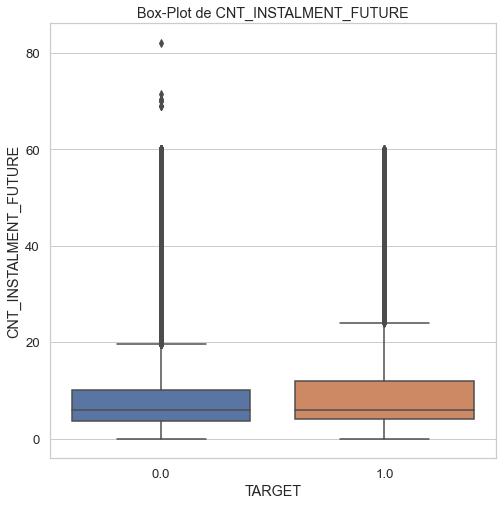

In [85]:
plot_continuous_variables(pos_cash_merged, 'CNT_INSTALMENT_FUTURE', plots = ['box'], figsize = (8,8))
del pos_cash_merged

##### Observations et conclusions

En examinant le diagramme en boîte ci-dessus pour CNT_INSTALMENT_FUTURE, nous constatons que les valeurs percentiles>50% pour les débiteurs sont généralement plus élevées que celles des non-débiteurs. Même la moustache supérieure pour les débiteurs est plus élevée que celle des non-débiteurs. Cela suggère que les débiteurs ont tendance à avoir un plus grand nombre d'échéances restantes sur leurs crédits précédents par rapport aux non-débiteurs.

### credit_card_balance.csv

##### Description

Cette table contient les données mensuelles relatives à une ou plusieurs cartes de crédit que le demandeur avait avec le groupe Home Credit. La table comprend des champs tels que le solde, la limite de crédit, le montant des retraits, etc. pour chaque mois de la carte de crédit.

<h4>Stats</h4>

In [86]:
print(f'La forme du fichier credit_card_balance.csv est : {cc_balance.shape}')
print('-'*100)
print(f'Le nombre d\'identifiants SK_ID_PREV uniques dans credit_card_balance.csv est : {len(cc_balance.SK_ID_PREV.unique())}')
print(f'Le nombre d\'identifiants SK_ID_CURR uniques dans credit_card_balance.csv est : {len(cc_balance.SK_ID_CURR.unique())}')
print('-'*100)
print(f'Le nombre d\'identifiants SK_ID_CURR communs entre application_train.csv et credit_card_balance.csv est : {len(set(application_train.SK_ID_CURR.unique()).intersection(set(cc_balance.SK_ID_CURR.unique())))}')
print(f'Le nombre d\'identifiants SK_ID_CURR communs entre application_test.csv et credit_card_balance.csv est : {len(set(application_test.SK_ID_CURR.unique()).intersection(set(cc_balance.SK_ID_CURR.unique())))}')
print('-'*100)

print(f'Le nombre de valeurs en double dans credit_card_balance est : {cc_balance.shape[0] - cc_balance.duplicated().shape[0]}')
print('-'*100)
display(cc_balance.head(5))

La forme du fichier credit_card_balance.csv est : (3840312, 23)
----------------------------------------------------------------------------------------------------
Le nombre d'identifiants SK_ID_PREV uniques dans credit_card_balance.csv est : 104307
Le nombre d'identifiants SK_ID_CURR uniques dans credit_card_balance.csv est : 103558
----------------------------------------------------------------------------------------------------
Le nombre d'identifiants SK_ID_CURR communs entre application_train.csv et credit_card_balance.csv est : 86905
Le nombre d'identifiants SK_ID_CURR communs entre application_test.csv et credit_card_balance.csv est : 16653
----------------------------------------------------------------------------------------------------
Le nombre de valeurs en double dans credit_card_balance est : 0
----------------------------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


##### Observations et conclusions

1. Il y a environ 3,84 millions de lignes dans la table credit_card_balance.csv, chacune correspondant à l'état mensuel de la carte de crédit que le demandeur avait avec le groupe Home Credit. Cette table contient 23 caractéristiques qui contiennent des statistiques sur l'état de la carte de crédit chaque mois, telles que le montant du solde, le montant des retraits, le nombre de retraits, l'état, etc.

2. Il y a 104 300 cartes de crédit uniques dont les détails se trouvent dans cette table.

3. Parmi ces 104 300 cartes de crédit, il y a 103 500 identifiants SK_ID_CURR uniques. Cela signifie que la plupart des demandeurs n'avaient qu'une seule carte de crédit, et seuls quelques-uns en avaient plus d'une. Ces identifiants SK_ID_CURR sont les identifiants des demandeurs ayant actuellement fait une demande de prêt.

4. Parmi les 103 000 identifiants SK_ID_CURR uniques, 86 900 de ces demandeurs appartiennent à l'ensemble d'entraînement (training set), et 16 600 appartiennent à l'ensemble des demandes de test (test application set).

5. Parmi les 307 000 demandeurs de la table application_train, seuls 86 900 d'entre eux avaient précédemment une carte de crédit avec Home Credit Group.

#### Valeurs manquantes

----------------------------------------------------------------------------------------------------
Nombre de colonnes contenant des valeurs NaN : 9 colonnes


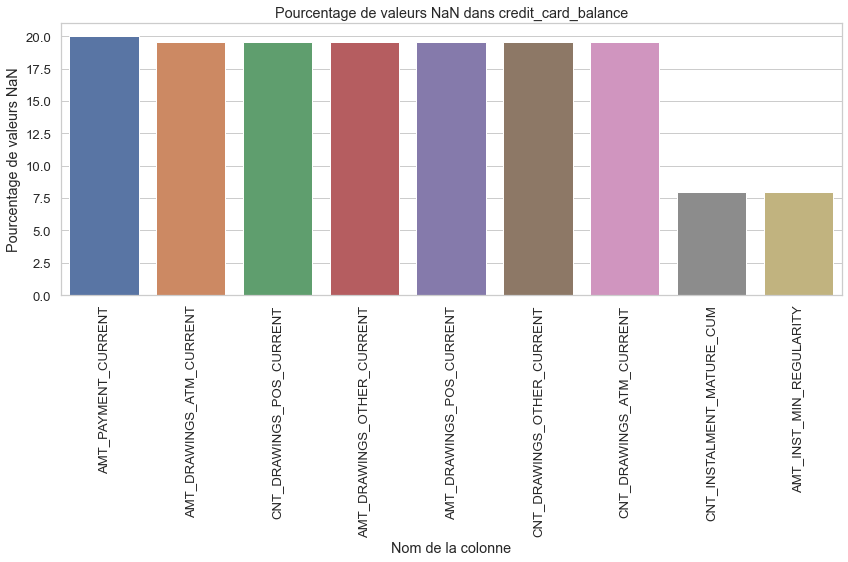

----------------------------------------------------------------------------------------------------


In [87]:
cc_balance_nan = nan_df_create(cc_balance)
print('-'*100)
plot_nan_percent(cc_balance_nan, 'credit_card_balance', tight_layout = False, rotation = 90, figsize = (14,5))
print('-'*100)
del cc_balance_nan

##### Observations et conclusions

1. Parmi les 23 caractéristiques, 9 d'entre elles contiennent certaines valeurs NaN.

2. Si nous examinons les pourcentages de valeurs NaN, ils sont considérablement plus bas que ceux des autres tables que nous avons vues jusqu'à présent.

3. 7 de ces caractéristiques ont environ 20% de valeurs NaN. Ces caractéristiques sont principalement liées aux montants des retraits et aux comptes des retraits. Les deux autres caractéristiques sont liées aux statistiques des échéances.

<b>Fusion de la colonne TARGETS à credit_card_balance table.</b>

In [88]:
print("-"*100)
print("Fusion de la variable cible avec la table credit_card_balance")
cc_balance_merged = application_train.iloc[:,:2].merge(cc_balance, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Fusion de la variable cible avec la table credit_card_balance
----------------------------------------------------------------------------------------------------


#### Matrice de corrélation des features

----------------------------------------------------------------------------------------------------


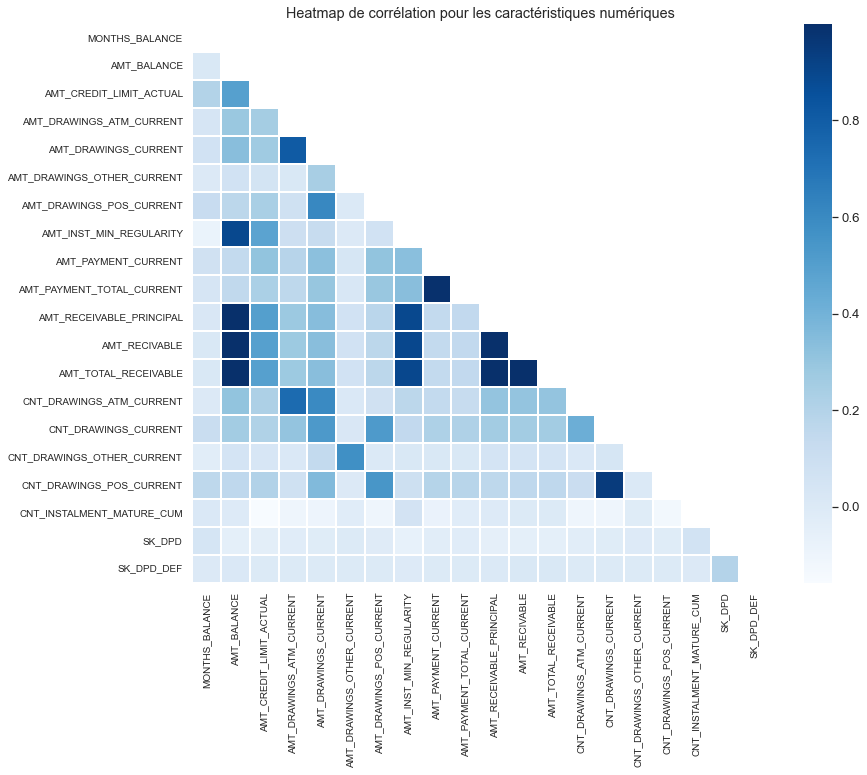

----------------------------------------------------------------------------------------------------


In [89]:
corr_mat = correlation_matrix(cc_balance_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (13,11))
corr_mat.plot_correlation_matrix()

In [90]:
# Voir les colonnes les plus corrélées à la variable cible dans la table credit_card_balance en utilisant la corrélation Phik
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Colonnes avec les valeurs les plus élevées de corrélation Phik avec la variable cible :")
display(top_corr_target_df)
print("-" * 100)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_LIMIT_ACTUAL']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_ATM_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_OTHER_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_POS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_INST_MIN_REGULARITY']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_TOTAL_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_RECEIVABLE_PRINCIPAL']
interval columns not set, guessing: ['TARGET', 'AMT_RECIVABLE']
interval columns not set, guessing: ['TARGET', 'AMT_TOTAL_RECEIVABLE']
interval columns not set, guessing: ['TARGET', 'CNT_DRAWINGS_ATM_CURREN

,Nom de la colonne,Phik-Corrélation
1,AMT_BALANCE,0.059838
11,AMT_RECIVABLE,0.059311
12,AMT_TOTAL_RECEIVABLE,0.059287
10,AMT_RECEIVABLE_PRINCIPAL,0.058895
0,MONTHS_BALANCE,0.050360
7,AMT_INST_MIN_REGULARITY,0.042174
17,CNT_INSTALMENT_MATURE_CUM,0.038261
13,CNT_DRAWINGS_ATM_CURRENT,0.030052
2,AMT_CREDIT_LIMIT_ACTUAL,0.028752
14,CNT_DRAWINGS_CURRENT,0.027868


----------------------------------------------------------------------------------------------------


##### Observations et conclusions :

1. La heatmap ci-dessus montre visuellement la corrélation entre les caractéristiques de la table credit_card_balance.

2. À partir de la heatmap de la matrice de corrélation, nous observons quelques paires de caractéristiques fortement corrélées. Ce sont :
   - AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE et AMT_BALANCE
   - Nous observons également une forte corrélation entre les 3 colonnes AMT_RECEIVABLE
   - AMT_PAYMENT_TOTAL_CURRENT et AMT_PAYMENT_CURRENT

3. Les ensembles de caractéristiques corrélées en deuxième et troisième position sont compréhensibles car elles représentent plus ou moins la même information.

4. La corrélation des caractéristiques avec la variable cible n'est pas remarquable, ce qui indique l'absence d'une relation linéaire entre la caractéristique et la variable cible.

#### Plot des Variables  Continues

Tout d'abord, nous regrouperons les données en utilisant le champ 'SK_ID_PREV' et nous agrégerons les valeurs avec la moyenne, de sorte que nous obtenions une ligne moyenne pour chaque prêt précédent que le client a eu.

In [91]:
cc_balance_merged = cc_balance_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution de la variable continue AMT_BALANCE</u></b>

Cette colonne fournit le montant moyen du solde que la personne avait généralement sur son compte de prêt par carte de crédit pour le prêt précédent.

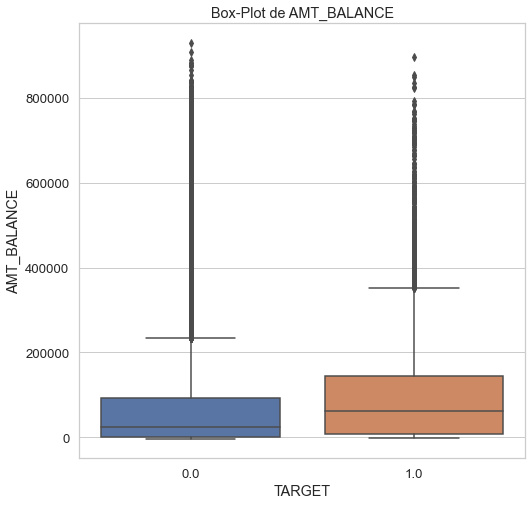

In [92]:
plot_continuous_variables(cc_balance_merged, 'AMT_BALANCE', plots = ['box'], figsize = (8,8))

##### Observations et conclusions

À partir du graphique ci-dessus, on peut observer que les personnes en défaut de paiement ont une valeur plus élevée de AMT_BALANCE par rapport à celles qui ne sont pas en défaut de paiement. Les valeurs des quantiles sont plus élevées pour les personnes en défaut de paiement, de même que les whiskers. Cela pourrait signifier que le montant de crédit pour les personnes en défaut de paiement est également relativement plus élevé par rapport à celles qui ne sont pas en défaut de paiement.

Nous constatons également que les personnes en défaut de paiement ont des mensualités minimales plus élevées chaque mois par rapport à celles qui ne sont pas en défaut de paiement. Cela indique généralement les habitudes de dépenses et d'emprunt des personnes. Les personnes en défaut de paiement ont tendance à avoir des habitudes de dépenses et d'emprunt plus élevées par rapport à celles qui ne sont pas en défaut de paiement.

<b><u>Distribution de la variable continue AMT_TOTAL_RECEIVABLE</u></b>

Cette colonne décrit la moyenne du montant total récupérable sur le crédit précédent.

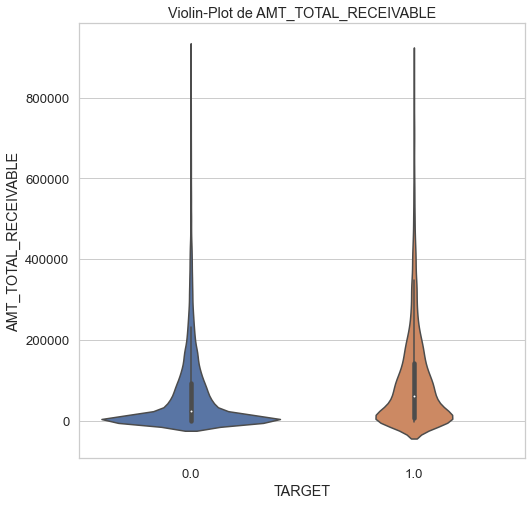

In [93]:
plot_continuous_variables(cc_balance_merged, 'AMT_TOTAL_RECEIVABLE', plots = ['violin'], figsize = (8,8))

##### Observations et conclusions

En examinant le diagramme en boîte (box plot) de AMT_TOTAL_RECEIVABLE, nous constatons un comportement similaire à celui des autres montants, à savoir que les personnes en défaut de paiement ont généralement un montant récupérable plus élevé sur leur crédit précédent, ce qui peut impliquer des montants de crédit plus élevés qu'elles ont pu obtenir. La fonction de densité de probabilité (PDF) montre également un pic très élevé pour les montants plus faibles chez les personnes qui ne sont pas en défaut de paiement, par rapport à celles qui le sont.

<b><u>Distribution de la variable continue CNT_INSTALMENT_MATURE_CUM</u></b>

Cette colonne décrit le nombre moyen de mensualités payées sur les crédits précédents.

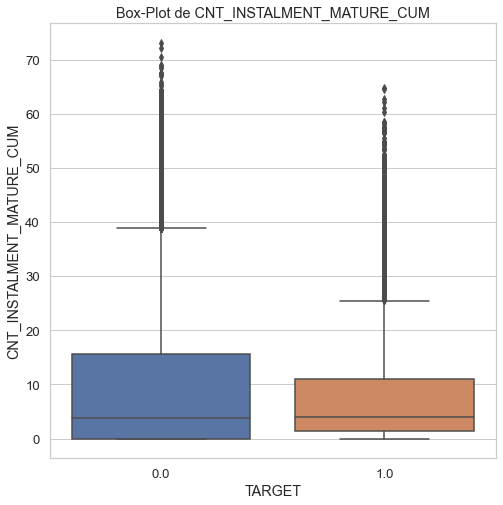

In [94]:
plot_continuous_variables(cc_balance_merged, 'CNT_INSTALMENT_MATURE_CUM', plots = ['box'], figsize = (8,8))

##### Observations et conclusions

À partir du graphique ci-dessus, nous observons un comportement très intéressant. Ce graphique montre que les personnes qui ne sont pas en défaut de paiement ont généralement une plus grande plage de valeurs pour le nombre de mensualités payées par rapport à celles en défaut de paiement. Cela pourrait indiquer un comportement de défaut de paiement, où les personnes en défaut de paiement paieraient généralement un nombre moins élevé de mensualités sur leur crédit précédent.

## Conclusions del' EDA

À partir de l'analyse exhaustive des données exploratoires que nous avons effectuée, nous pouvons tirer quelques conclusions générales à partir de notre ensemble de données donné :

1. Tout d'abord, il sera nécessaire de fusionner l'ensemble des données d'une manière ingénieuse afin que les données fusionnées aient du sens.

2. Certaines catégories permettent une discrimination très nette entre les défaillants et les non-défaillants, ce qui pourrait être important à des fins de classification.

3. Il existe quelques variables numériques continues contenant des points erronés, nous devrons traiter ces points.

4. Nous avons également remarqué certaines fonctionnalités corrélées, qui ne feraient qu'augmenter la dimensionnalité des données sans ajouter beaucoup de valeur. Nous souhaiterions supprimer de telles fonctionnalités.

5. Dans l'ensemble, l'ensemble de données est déséquilibré et nous devrons trouver des techniques pour gérer un tel déséquilibre.

6. Pour la prédiction des risques de défaut, les défaillants ont généralement un comportement anormal, nous ne pouvons donc pas supprimer les valeurs aberrantes ou les points très éloignés, car ils peuvent indiquer une tendance importante à la défaillance.

7. Avec toutes ces informations, nous passerons à la tâche de nettoyage des données (Data Clearning) et d'ingénierie des caractéristiques (Feature Engineering ).